In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../Data/train.csv")

In [3]:
df.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
df.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [6]:
# Replacing all the NaN values in keyword column with a digit, will remove during preprocessing
df['keyword'] = df['keyword'].replace(np.nan, "", regex=True)

#### Combining text and Keyword for now in a new column "combined text" 
#### Will also create a training pipeline without combination just on text column
#### Will compare the scores of both the training pipelines

In [7]:
df_p1 = df.copy() # for combined text and keyword
df_p2 = df.copy() # for text only

In [8]:
df_p1.head()

id keyword location                                               text  \
0   1              NaN  Our Deeds are the Reason of this #earthquake M...   
1   4              NaN             Forest fire near La Ronge Sask. Canada   
2   5              NaN  All residents asked to 'shelter in place' are ...   
3   6              NaN  13,000 people receive #wildfires evacuation or...   
4   7              NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [9]:
df_p1['combined_text'] = df['keyword'] + " "+ df['text']

In [10]:
df_p1.head()

id keyword location                                               text  \
0   1              NaN  Our Deeds are the Reason of this #earthquake M...   
1   4              NaN             Forest fire near La Ronge Sask. Canada   
2   5              NaN  All residents asked to 'shelter in place' are ...   
3   6              NaN  13,000 people receive #wildfires evacuation or...   
4   7              NaN  Just got sent this photo from Ruby #Alaska as ...   

   target                                      combined_text  
0       1   Our Deeds are the Reason of this #earthquake ...  
1       1             Forest fire near La Ronge Sask. Canada  
2       1   All residents asked to 'shelter in place' are...  
3       1   13,000 people receive #wildfires evacuation o...  
4       1   Just got sent this photo from Ruby #Alaska as...

In [11]:
df_p1['combined_text'].iloc[50]

'ablaze Deputies: Man shot before Brighton home set ablaze http://t.co/gWNRhMSO8k'

In [12]:
df_p2['text'].iloc[50]

'Deputies: Man shot before Brighton home set ablaze http://t.co/gWNRhMSO8k'

In [13]:
df_p2.head(2)

id keyword location                                               text  \
0   1              NaN  Our Deeds are the Reason of this #earthquake M...   
1   4              NaN             Forest fire near La Ronge Sask. Canada   

   target  
0       1  
1       1

<AxesSubplot:xlabel='count', ylabel='target'>

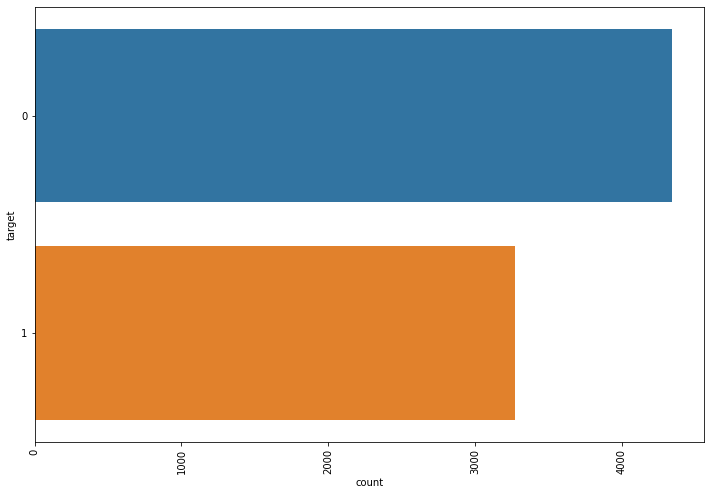

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
plt.xticks(rotation=90)
sns.countplot(y='target', data=df)

### Preprocessing

In [15]:
import re

In [16]:
text_data = df_p1['combined_text'].iloc[50]
text_data

'ablaze Deputies: Man shot before Brighton home set ablaze http://t.co/gWNRhMSO8k'

In [17]:
text_data = re.sub(r"http:\S+\s*", '', text_data)
text_data = text_data.strip()
text_data

'ablaze Deputies: Man shot before Brighton home set ablaze'

In [18]:
def text_cleaner(text_data):
    "Method for cleaning text as a part of data preprocessing"
    text_data = text_data.lower() # Lowering the string
    text_data = text_data.strip() # removing starting and trailing spaces
    text_data = re.sub("http:\S+\s*", '', text_data) # removing urls
    text_data = re.sub(r"[^\w\s]", '', text_data) # removing special characters
    text_data = re.sub(r"[\n\t\r]", '', text_data) # removing \n , \t and \r
    text_data = re.sub(r"[^a-zA-Z]", ' ', text_data) # removing numerical values
    text_data = re.sub(r'[^\x100-\x7f]', r' ', text_data)
    text_data = " ".join(text_data.split())
    text_data = text_data.strip()
    return text_data

In [19]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import string

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [20]:
def get_wordnet_pos(word):
    "Map pos to first character lemmatize accepts"
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        "J": wordnet.ADJ,
        "N": wordnet.NOUN,
        "V": wordnet.VERB,
        "R": wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

In [21]:
def preprocess_text(text_data):
    sw = set(stopwords.words('english'))
    # Initializing the Lemmatizer
    lemmatizer = WordNetLemmatizer()
    print(f"The actual tweet is: \n{text_data}")
    text_data = text_cleaner(text_data)
    print(f"The cleaned text is: \n {text_data}")
    text_data = " ".join([word for word in text_data.split() if word not in sw])
    # lemmatizing the text
    processed_text = " ".join(lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(text_data) if w not in
                             string.punctuation)
    print(f"The lemmatized tweet is: \n {processed_text}\n")
    return processed_text

In [22]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [23]:
df_p1['processed_text'] = df_p1.combined_text.apply(lambda x: preprocess_text(x))

The actual tweet is: 
 Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
The cleaned text is: 
 our deeds are the reason of this earthquake may allah forgive us all
The lemmatized tweet is: 
 deed reason earthquake may allah forgive u

The actual tweet is: 
 Forest fire near La Ronge Sask. Canada
The cleaned text is: 
 forest fire near la ronge sask canada
The lemmatized tweet is: 
 forest fire near la ronge sask canada

The actual tweet is: 
 All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
The cleaned text is: 
 all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected
The lemmatized tweet is: 
 resident ask shelter place notify officer evacuation shelter place order expect

The actual tweet is: 
 13,000 people receive #wildfires evacuation orders in California 
The cleaned text is: 
 people receive wildfires

The actual tweet is: 
ablaze @ablaze what time does your talk go until? I don't know if I can make it due to work.
The cleaned text is: 
 ablaze ablaze what time does your talk go until i dont know if i can make it due to work
The lemmatized tweet is: 
 ablaze ablaze time talk go dont know make due work

The actual tweet is: 
accident 'I can't have kids cuz I got in a bicycle accident &amp; split my testicles. it's impossible for me to have kids' MICHAEL YOU ARE THE FATHER
The cleaned text is: 
 accident i cant have kids cuz i got in a bicycle accident amp split my testicles its impossible for me to have kids michael you are the father
The lemmatized tweet is: 
 accident cant kid cuz get bicycle accident amp split testicle impossible kid michael father

The actual tweet is: 
accident Accident on I-24 W #NashvilleTraffic. Traffic moving 8m slower than usual. https://t.co/0GHk693EgJ
The cleaned text is: 
 accident accident on i w nashvilletraffic traffic moving m slower than usual httpst

The lemmatized tweet is: 
 aftershock aftershock httpstcoxmwodfmtui

The actual tweet is: 
aftershock 320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/M4JDZMGJoW | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÛ_ http://t.co/n0uhAsfkBv
The cleaned text is: 
 aftershock ir icemoon aftershock djicemoon dubstep trapmusic dnb edm dance ices
The lemmatized tweet is: 
 aftershock ir icemoon aftershock djicemoon dubstep trapmusic dnb edm dance ice

The actual tweet is: 
aftershock 320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vAM5POdGyw | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÛ_ http://t.co/zEVakJaPcz
The cleaned text is: 
 aftershock ir icemoon aftershock djicemoon dubstep trapmusic dnb edm dance ices
The lemmatized tweet is: 
 aftershock ir icemoon aftershock djicemoon dubstep trapmusic dnb edm dance ice

The actual tweet is: 
aftershock 320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/e14EPzhotH | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÛ_ http://t.co/22a9D5

The lemmatized tweet is: 
 airplane accident dtn brazil expert france begin examine airplane debris found reunion island french air accident exp

The actual tweet is: 
airplane%20accident Experts in France begin examining airplane debris found on Reunion Island: French air accident experts on Wedn... http://t.co/v4SMAESLK5
The cleaned text is: 
 airplane accident experts in france begin examining airplane debris found on reunion island french air accident experts on wedn
The lemmatized tweet is: 
 airplane accident expert france begin examine airplane debris found reunion island french air accident expert wedn

The actual tweet is: 
airplane%20accident Horrible Accident Man Died In Wings Of ÛÏAirplaneÛ 29-07-2015. WTF You CanÛªt Believe Your EYES ÛÒ... http://t.co/6fFyLAjWpS
The cleaned text is: 
 airplane accident horrible accident man died in wings of airplane wtf you can t believe your eyes
The lemmatized tweet is: 
 airplane accident horrible accident man die wing airplane wtf

The lemmatized tweet is: 
 annihilate uribe annihilate baseball mets

The actual tweet is: 
annihilated @marksmaponyane Hey!Sundowns were annihilated in their previous meeting with Celtic.Indeed its an improvement.
The cleaned text is: 
 annihilated marksmaponyane heysundowns were annihilated in their previous meeting with celticindeed its an improvement
The lemmatized tweet is: 
 annihilate marksmaponyane heysundowns annihilate previous meeting celticindeed improvement

The actual tweet is: 
annihilated @Volfan326 @TNeazzy Mizzou has annihilated florida the past 2 seasons even ended muschamp's career just can't compete with Bama
The cleaned text is: 
 annihilated volfan tneazzy mizzou has annihilated florida the past seasons even ended muschamps career just cant compete with bama
The lemmatized tweet is: 
 annihilate volfan tneazzy mizzou annihilate florida past season even end muschamps career cant compete bama

The actual tweet is: 
annihilated Annihilated Abs . ?? http://t.co/1xPw2

The lemmatized tweet is: 
 annihilation annihilation jeb christie amp kasich less hour awayplease god allow least one full day

The actual tweet is: 
annihilation @Barbi_Twins We need help-horses will die! Please RT &amp; sign petition! Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu
The cleaned text is: 
 annihilation barbi twins we need helphorses will die please rt amp sign petition take a stand amp be a voice for them gilbert httpstcoe dl lncvu
The lemmatized tweet is: 
 annihilation barbi twin need helphorses die please rt amp sign petition take stand amp voice gilbert httpstcoe dl lncvu

The actual tweet is: 
annihilation @Whippenz We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu
The cleaned text is: 
 annihilation whippenz we need help horses will dieplease rt amp sign petitiontake a stand amp be a voice for them gilbert httpstcoe dl lncvu
The lemmatized tweet is: 
 a

The lemmatized tweet is: 
 armageddon pbban temporary russaky armageddon kill flag fast xp reason

The actual tweet is: 
armageddon ((OFFICIAL VID)) #DoubleCups &gt;&gt; https://t.co/lfKMTZaEkk &gt;&gt; @TrubGME Prod @THISIZBWRIGHT &gt;&gt; #ARMAGEDDON
The cleaned text is: 
 armageddon official vid doublecups gtgt httpstcolfkmtzaekk gtgt trubgme prod thisizbwright gtgt armageddon
The lemmatized tweet is: 
 armageddon official vid doublecups gtgt httpstcolfkmtzaekk gtgt trubgme prod thisizbwright gtgt armageddon

The actual tweet is: 
armageddon ouvindo Peace Love &amp; Armageddon
The cleaned text is: 
 armageddon ouvindo peace love amp armageddon
The lemmatized tweet is: 
 armageddon ouvindo peace love amp armageddon

The actual tweet is: 
armageddon Best movie you've ever seen? - Armageddon  http://t.co/qoUXIgdtbZ
The cleaned text is: 
 armageddon best movie youve ever seen armageddon
The lemmatized tweet is: 
 armageddon best movie youve ever see armageddon

The actual tweet is: 
arm

The lemmatized tweet is: 
 army build kingdom lead army victory httpsyoutustart g friend code lzktjnox

The actual tweet is: 
army Salvation Army hosts rally to reconnect fathers with children: The Salvation Army is hosting a back to school rallyÛ_ http://t.co/rDjpor3AZg
The cleaned text is: 
 army salvation army hosts rally to reconnect fathers with children the salvation army is hosting a back to school rally
The lemmatized tweet is: 
 army salvation army host rally reconnect father child salvation army host back school rally

The actual tweet is: 
army Vote for #Directioners vs #Queens in the 5th round of the @Billboard #FanArmyFaceOff http://t.co/Kgtxnnbj7y
The cleaned text is: 
 army vote for directioners vs queens in the th round of the billboard fanarmyfaceoff
The lemmatized tweet is: 
 army vote directioners v queen th round billboard fanarmyfaceoff

The actual tweet is: 
army But if you build an army of 100 dogs and their leader is a lion all dogs will fight like a lion.
The 

The actual tweet is: 
arson Tennessee lesbian couple faked hate crime and destroyed own home with arsonÛ_ http://t.co/10mUEY8PXJ #Lesbian
The cleaned text is: 
 arson tennessee lesbian couple faked hate crime and destroyed own home with arson lesbian
The lemmatized tweet is: 
 arson tennessee lesbian couple fake hate crime destroyed home arson lesbian

The actual tweet is: 
arson Arson suspect linked to 30 fires caught in Northern California - Los Angeles Times http://t.co/PrRB4fhXtv
The cleaned text is: 
 arson arson suspect linked to fires caught in northern california los angeles times
The lemmatized tweet is: 
 arson arson suspect link fire caught northern california los angeles time

The actual tweet is: 
arson Arson suspect linked to 30 fires caught in Northern California http://t.co/u1fuWrGK5U
The cleaned text is: 
 arson arson suspect linked to fires caught in northern california
The lemmatized tweet is: 
 arson arson suspect link fire caught northern california

The actual tw

The lemmatized tweet is: 
 attack im gon na lie im kinda ready attack senior year

The actual tweet is: 
attack 'Left hand side of a diamond is a graveyard shift have to attack and defend'
The right handside no have to do that too you fucking idiot?
The cleaned text is: 
 attack left hand side of a diamond is a graveyard shift have to attack and defendthe right handside no have to do that too you fucking idiot
The lemmatized tweet is: 
 attack left hand side diamond graveyard shift attack defendthe right handside fuck idiot

The actual tweet is: 
attack #volleyball Attack II Volleyball Training Machine - Sets Simulation - http://t.co/dCDeCFv934 http://t.co/dWBC1dUvdk
The cleaned text is: 
 attack volleyball attack ii volleyball training machine sets simulation
The lemmatized tweet is: 
 attack volleyball attack ii volleyball training machine set simulation

The actual tweet is: 
attack Notley's tactful yet very direct response to Harper's attack on Alberta's gov't. Hell YEAH Premier! h

The lemmatized tweet is: 
 attack christian attack muslim temple mount wave israeli flag via pamela geller

The actual tweet is: 
attacked Christian Attacked by Muslims at the Temple Mount after Waving Israeli Flag via Pamela Geller - ... http://t.co/yUBKHf9iyh
The cleaned text is: 
 attacked christian attacked by muslims at the temple mount after waving israeli flag via pamela geller
The lemmatized tweet is: 
 attack christian attack muslim temple mount wave israeli flag via pamela geller

The actual tweet is: 
attacked TV program I saw said US air plane flew to uranium mine in Fukushima and attacked by machine gun when student army were digging it.
The cleaned text is: 
 attacked tv program i saw said us air plane flew to uranium mine in fukushima and attacked by machine gun when student army were digging it
The lemmatized tweet is: 
 attack tv program saw say u air plane flew uranium mine fukushima attack machine gun student army dig

The actual tweet is: 
attacked Christian Attacke

The lemmatized tweet is: 
 battle battle animation fuck much

The actual tweet is: 
battle See what happens with NO Battle of the Block @CBSBigBrother!?! ???? finally
The cleaned text is: 
 battle see what happens with no battle of the block cbsbigbrother finally
The lemmatized tweet is: 
 battle see happens battle block cbsbigbrother finally

The actual tweet is: 
battle #DU19 who gon get in this rap battle with me
The cleaned text is: 
 battle du who gon get in this rap battle with me
The lemmatized tweet is: 
 battle du gon get rap battle

The actual tweet is: 
battle Do Your Own Thing: The Battle of Internal vs External Motivation: http://t.co/w9P3hAuHEi
The cleaned text is: 
 battle do your own thing the battle of internal vs external motivation
The lemmatized tweet is: 
 battle thing battle internal v external motivation

The actual tweet is: 
battle Check out this item I just got! [Phantasmal Cummerbund] http://t.co/qrHJEI7gRq #Warcraft
The cleaned text is: 
 battle check out th

The lemmatized tweet is: 
 bioterror fedex longer transport bioterror germ wake anthrax lab mishap

The actual tweet is: 
bioterror FedEx no longer shipping bioterror germs - WXIA-TV | @scoopit http://t.co/ZQqJrQsbJm
The cleaned text is: 
 bioterror fedex no longer shipping bioterror germs wxiatv scoopit
The lemmatized tweet is: 
 bioterror fedex longer shipping bioterror germ wxiatv scoopit

The actual tweet is: 
bioterror FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/hrqCJdovJZ
The cleaned text is: 
 bioterror fedex no longer to transport bioterror germs in wake of anthrax lab mishaps
The lemmatized tweet is: 
 bioterror fedex longer transport bioterror germ wake anthrax lab mishap

The actual tweet is: 
bioterror USATODAY: On today's #frontpage: #Bioterror lab faced secret sanctions. #RickPerry doesn't make the cut for FoxNewÛ_ http://t.co/xFHh2XF9Ga
The cleaned text is: 
 bioterror usatoday on todays frontpage bioterror lab faced secret sa

The lemmatized tweet is: 
 blaze property loss california wildfire nearly double weekold blaze rage

The actual tweet is: 
blaze #breaking Firefighters battling blaze at east Cary condo building http://t.co/mIM8hH2ce6
The cleaned text is: 
 blaze breaking firefighters battling blaze at east cary condo building
The lemmatized tweet is: 
 blaze break firefighter battling blaze east cary condo building

The actual tweet is: 
blaze niggas love hating.
The cleaned text is: 
 blaze niggas love hating
The lemmatized tweet is: 
 blaze nigga love hat

The actual tweet is: 
blaze @audacityjamesta Don't be like that babes &lt;3 you'll have a ball of fun with me at LAN! :)
The cleaned text is: 
 blaze audacityjamesta dont be like that babes lt youll have a ball of fun with me at lan
The lemmatized tweet is: 
 blaze audacityjamesta dont like babe lt youll ball fun lan

The actual tweet is: 
blaze I liked a @YouTube video from @iamrrsb http://t.co/PdEHd1tCpk Minecraft Skywars - O BLAZE QUE USA HACK 

The lemmatized tweet is: 
 blazing blazing hot etisalat free mb complete month etisalat give mb tecno q ime

The actual tweet is: 
blazing @FunkyLilShack @mariaf30 I want a full on bitch slapping guns blazing cake throwing Charles showdown!! Now THAT will be worth the wait ????
The cleaned text is: 
 blazing funkylilshack mariaf i want a full on bitch slapping guns blazing cake throwing charles showdown now that will be worth the wait
The lemmatized tweet is: 
 blazing funkylilshack mariaf want full bitch slap gun blazing cake throw charles showdown worth wait

The actual tweet is: 
blazing Follow @EdWelchMusic and check out his Hit Single 'Unpacked' Man its BLAZING!!!
The cleaned text is: 
 blazing follow edwelchmusic and check out his hit single unpacked man its blazing
The lemmatized tweet is: 
 blazing follow edwelchmusic check hit single unpacked man blazing

The actual tweet is: 
blazing I still don't know how 8 hours of physical activity in the blazing sun isn't a sport.
The cle

The actual tweet is: 
blew%20up @CodyThompson25 ty just blew up the motor went up in flames he got out ok
The cleaned text is: 
 blew up codythompson ty just blew up the motor went up in flames he got out ok
The lemmatized tweet is: 
 blew codythompson ty blew motor go flame get ok

The actual tweet is: 
blew%20up Just realized my dude @_OnlyFTF was on that 'What Are Those' way before it blew up @ the tusky ?? game @robsimss @CantMissKid
The cleaned text is: 
 blew up just realized my dude onlyftf was on that what are those way before it blew up the tusky game robsimss cantmisskid
The lemmatized tweet is: 
 blew realize dude onlyftf way blew tusky game robsimss cantmisskid

The actual tweet is: 
blew%20up This night just blew up rq
The cleaned text is: 
 blew up this night just blew up rq
The lemmatized tweet is: 
 blew night blew rq

The actual tweet is: 
blew%20up I blew up snapchat for no reason ??
The cleaned text is: 
 blew up i blew up snapchat for no reason
The lemmatized tweet 

The lemmatized tweet is: 
 blight anellatulip theory make way much sense say dwarf may actual origin blight

The actual tweet is: 
blight The #Palestinian #refugee tragedy is a blight on humanity &amp; should shame every #Israeli for living with it. https://t.co/gAAE0nO5du
The cleaned text is: 
 blight the palestinian refugee tragedy is a blight on humanity amp should shame every israeli for living with it httpstcogaae no du
The lemmatized tweet is: 
 blight palestinian refugee tragedy blight humanity amp shame every israeli living httpstcogaae du

The actual tweet is: 
blight Article by Michael Jackman at Metro Times Detroit:
The group later downgraded the estimate to 37 square miles of... http://t.co/h31mmuduqt
The cleaned text is: 
 blight article by michael jackman at metro times detroitthe group later downgraded the estimate to square miles of
The lemmatized tweet is: 
 blight article michael jackman metro time detroitthe group later downgrade estimate square mile

The actual twee

The lemmatized tweet is: 
 blood another day another excellent dangerousbeans porridge seriously people blood orange porridge phenomenal

The actual tweet is: 
blood @scotto519 happy birthday young blood
The cleaned text is: 
 blood scotto happy birthday young blood
The lemmatized tweet is: 
 blood scotto happy birthday young blood

The actual tweet is: 
blood If it wasn't for the Blood! ????
The cleaned text is: 
 blood if it wasnt for the blood
The lemmatized tweet is: 
 blood wasnt blood

The actual tweet is: 
blood No kinda in it that shii nasty blood. No pun intended
The cleaned text is: 
 blood no kinda in it that shii nasty blood no pun intended
The lemmatized tweet is: 
 blood kinda shii nasty blood pun intend

The actual tweet is: 
blood Ain't no hoe in my blood
The cleaned text is: 
 blood aint no hoe in my blood
The lemmatized tweet is: 
 blood aint hoe blood

The actual tweet is: 
blood Today was such a hastle from getting drug tested  blood drown out  tb shot  to document 

The lemmatized tweet is: 
 blown damn greinke get blown first inning

The actual tweet is: 
blown%20up Woke up so blown lol
The cleaned text is: 
 blown up woke up so blown lol
The lemmatized tweet is: 
 blown woke blown lol

The actual tweet is: 
blown%20up aunt marge you're blown up eheks
The cleaned text is: 
 blown up aunt marge youre blown up eheks
The lemmatized tweet is: 
 blown aunt marge youre blown eheks

The actual tweet is: 
blown%20up @troylercraft YEAH ITS NOT WORTH IT BC HE ALREADY HAS SO MANY SPAMMERS &amp; HIS TWITTER IS PROBABLY BLOWN UP EVERY SECOND
The cleaned text is: 
 blown up troylercraft yeah its not worth it bc he already has so many spammers amp his twitter is probably blown up every second
The lemmatized tweet is: 
 blown troylercraft yeah worth bc already many spammer amp twitter probably blown every second

The actual tweet is: 
blown%20up White family (supposedly representing America's GREAT values ) gets blown up in a horrible CGI nuclear strike..... LMF

The lemmatized tweet is: 
 body bag new lady shoulder tote handbag faux leather hobo purse cross body bag woman rt en

The actual tweet is: 
body%20bag @TR_jdavis Bruh you wanna fight I'm down meet me in the cage bro better find out who you're dealing with before you end up in a body bag
The cleaned text is: 
 body bag tr jdavis bruh you wanna fight im down meet me in the cage bro better find out who youre dealing with before you end up in a body bag
The lemmatized tweet is: 
 body bag tr jdavis bruh wan na fight im meet cage bro well find youre deal end body bag

The actual tweet is: 
body%20bag New Ladies Shoulder Tote Handbag Faux Leather Hobo Purse Cross Body Bag Womens - Full readÛ_ http://t.co/4FXfllRIen http://t.co/i12NLSr8Fk
The cleaned text is: 
 body bag new ladies shoulder tote handbag faux leather hobo purse cross body bag womens full read
The lemmatized tweet is: 
 body bag new lady shoulder tote handbag faux leather hobo purse cross body bag woman full read

The actual t

The lemmatized tweet is: 
 body bagging another one another one still aint do shit one nigga body bagging meek

The actual tweet is: 
body%20bagging Drake Body Bagging Meek. He must of hit a sensitive spot talking about a 'ghostwriter.' He trying 2 end his career. http://t.co/2jHTlWueY0
The cleaned text is: 
 body bagging drake body bagging meek he must of hit a sensitive spot talking about a ghostwriter he trying end his career
The lemmatized tweet is: 
 body bagging drake body bagging meek must hit sensitive spot talk ghostwriter try end career

The actual tweet is: 
body%20bagging Good diss bad beat and flow. Mark my words Meek Mill is body bagging him once he responds. Patient patient. Meek is a battle rapper!
The cleaned text is: 
 body bagging good diss bad beat and flow mark my words meek mill is body bagging him once he responds patient patient meek is a battle rapper
The lemmatized tweet is: 
 body bagging good dis bad beat flow mark word meek mill body bagging responds patien

The lemmatized tweet is: 
 body bag shoot shit till see body bag

The actual tweet is: 
body%20bags 'Your body will heal the bags under your eyes will go away youÛªll be so happy youÛªll smile and really...' http://t.co/WuKcAlNQms
The cleaned text is: 
 body bags your body will heal the bags under your eyes will go away you ll be so happy you ll smile and really
The lemmatized tweet is: 
 body bag body heal bag eye go away happy smile really

The actual tweet is: 
body%20bags Womens Handbags Cross Body Geometric Pattern Satchel Totes Shoulder Bags White http://t.co/qvSp6b2qSU http://t.co/0s6ydFrWDQ RT gasparcÛ_
The cleaned text is: 
 body bags womens handbags cross body geometric pattern satchel totes shoulder bags white rt gasparc
The lemmatized tweet is: 
 body bag woman handbag cross body geometric pattern satchel tote shoulder bag white rt gasparc

The actual tweet is: 
body%20bags women messenger bags clutch bag handbag cross body shoulder bags bag ladies designer handbags high

The lemmatized tweet is: 
 bombed cyhitheprynce bombed kanye elephantintheroom

The actual tweet is: 
bombed The majority of those killed were civilians on the ground after the jet first bombed the city's main street then dramatically plummeted
The cleaned text is: 
 bombed the majority of those killed were civilians on the ground after the jet first bombed the citys main street then dramatically plummeted
The lemmatized tweet is: 
 bombed majority kill civilian ground jet first bombed city main street dramatically plummet

The actual tweet is: 
bombed 70 years ago at this hour the USA A-bombed Hiroshima therein killing 200000 civilians. Never forget the crime and never repeat. Peace ??
The cleaned text is: 
 bombed years ago at this hour the usa abombed hiroshima therein killing civilians never forget the crime and never repeat peace
The lemmatized tweet is: 
 bombed year ago hour usa abombed hiroshima therein kill civilian never forget crime never repeat peace

The actual tweet is: 


The lemmatized tweet is: 
 bombing japan mark th anniversary hiroshima atomic bombing ap

The actual tweet is: 
bombing Today is the day Hiroshima got Atomic bomb 70 years ago.  - The 'sanitised narrative' of Hiroshima's atomic bombing http://t.co/GKpANz7vg0
The cleaned text is: 
 bombing today is the day hiroshima got atomic bomb years ago the sanitised narrative of hiroshimas atomic bombing
The lemmatized tweet is: 
 bombing today day hiroshima get atomic bomb year ago sanitise narrative hiroshima atomic bombing

The actual tweet is: 
bombing What it was like to survive the atomic bombing of Hiroshima
http://t.co/LGrOcbXPqo
The cleaned text is: 
 bombing what it was like to survive the atomic bombing of hiroshima
The lemmatized tweet is: 
 bombing like survive atomic bombing hiroshima

The actual tweet is: 
bombing I think bombing Iran would be kinder... https://t.co/GVm70U2bPm
The cleaned text is: 
 bombing i think bombing iran would be kinder httpstcogvm u bpm
The lemmatized tweet 

The lemmatized tweet is: 
 building burning dougmartin fireman ed run burning building others run doug deserves respect

The actual tweet is: 
buildings%20burning @themagickidraps not upset with a rally upset with burning buildings businesses executing cops that have nothing to do with it etc
The cleaned text is: 
 buildings burning themagickidraps not upset with a rally upset with burning buildings businesses executing cops that have nothing to do with it etc
The lemmatized tweet is: 
 building burning themagickidraps upset rally upset burning building business execute cop nothing etc

The actual tweet is: 
buildings%20burning kou is like [CASH REGISTER] [BUILDINGS BURNING]
The cleaned text is: 
 buildings burning kou is like cash register buildings burning
The lemmatized tweet is: 
 building burning kou like cash register building burning

The actual tweet is: 
buildings%20burning @_minimehh @cjoyner I must be overlooking the burning buildings? #BlackLivesMatter
The cleaned text is: 

The lemmatized tweet is: 
 building fire beautiful architecture nyc love fire escape route building newyork httpstcofw ptaelgv

The actual tweet is: 
buildings%20on%20fire #TweetLikeItsSeptember11th2001 Those two buildings are on fire
The cleaned text is: 
 buildings on fire tweetlikeitsseptember th those two buildings are on fire
The lemmatized tweet is: 
 building fire tweetlikeitsseptember th two building fire

The actual tweet is: 
buildings%20on%20fire just in: #kenya: several buildings are reported to be on fire close to dam estate #langata at 2:22pm.
The cleaned text is: 
 buildings on fire just in kenya several buildings are reported to be on fire close to dam estate langata at pm
The lemmatized tweet is: 
 building fire kenya several building report fire close dam estate langata pm

The actual tweet is: 
buildings%20on%20fire They are evacuating buildings in that area of State Road 20. We still don't have confirmation of what is on fire.
The cleaned text is: 
 buildings on fir

The actual tweet is: 
burned Mad River Complex fires have burned 14028 acres 8% contained: The Mad River Complex fires in Trinity County ... http://t.co/LfNIPpNOtO
The cleaned text is: 
 burned mad river complex fires have burned acres contained the mad river complex fires in trinity county
The lemmatized tweet is: 
 burn mad river complex fire burn acre contain mad river complex fire trinity county

The actual tweet is: 
burned @thomasvissman22 @KeithyyL Keithyy gettin burned outta the blocks and on social media.... http://t.co/dlkuFtLQnF
The cleaned text is: 
 burned thomasvissman keithyyl keithyy gettin burned outta the blocks and on social media
The lemmatized tweet is: 
 burn thomasvissman keithyyl keithyy gettin burn outta block social medium

The actual tweet is: 
burned I burned myself today on the oven ?? it was at 500 degrees ??
The cleaned text is: 
 burned i burned myself today on the oven it was at degrees
The lemmatized tweet is: 
 burn burn today oven degree

The actual 

The actual tweet is: 
burning%20buildings forestservice : RT dhsscitech: #Firefighters run into burning buildingsÛÓwe work on #tech tÛ_ http://t.co/KybQcSvrZa) http://t.co/Ih49kyMsMp
The cleaned text is: 
 burning buildings forestservice rt dhsscitech firefighters run into burning buildings we work on tech t
The lemmatized tweet is: 
 burning building forestservice rt dhsscitech firefighter run burning building work tech

The actual tweet is: 
burning%20buildings #KCA #VoteJKT48ID DUCKVILLELOL: Burning flips the table and says 'screw this lets hit some buildings!' Grabs a DR Û_ http://t.co/03L7NwQDje
The cleaned text is: 
 burning buildings kca votejkt id duckvillelol burning flips the table and says screw this lets hit some buildings grabs a dr
The lemmatized tweet is: 
 burning building kca votejkt id duckvillelol burning flip table say screw let hit building grab dr

The actual tweet is: 
burning%20buildings Hero's fight wars and save ppl from burning buildings etc I'm sorry but 

The lemmatized tweet is: 
 bush fire holiday relax sunbathe drink put bush fire much spain httpstcodrno okm

The actual tweet is: 
bush%20fires Californian Bush Fires 2015 http://t.co/rjdX29wosp
The cleaned text is: 
 bush fires californian bush fires
The lemmatized tweet is: 
 bush fire californian bush fire

The actual tweet is: 
bush%20fires 28 Oct 1895: 'Bush Fires.' http://t.co/zCKXtFc9PT
The cleaned text is: 
 bush fires oct bush fires
The lemmatized tweet is: 
 bush fire oct bush fire

The actual tweet is: 
bush%20fires @dacherryontop13 ohh there are bush fires in Spain like every year one time when we went swimming there were planes getting water to fight
The cleaned text is: 
 bush fires dacherryontop ohh there are bush fires in spain like every year one time when we went swimming there were planes getting water to fight
The lemmatized tweet is: 
 bush fire dacherryontop ohh bush fire spain like every year one time go swim plane get water fight

The actual tweet is: 
bush%20fi

The actual tweet is: 
casualty Was '80s New #Wave a #Casualty of #AIDS?: Tweet And Since theyÛªd grown up watching DavidÛ_ http://t.co/qBecjli7cx
The cleaned text is: 
 casualty was s new wave a casualty of aids tweet and since they d grown up watching david
The lemmatized tweet is: 
 casualty new wave casualty aid tweet since grown watch david

The actual tweet is: 
casualty Cos sanity brings no reward for one more hit and one last score... Don't be a casualty cut the cord...
The cleaned text is: 
 casualty cos sanity brings no reward for one more hit and one last score dont be a casualty cut the cord
The lemmatized tweet is: 
 casualty co sanity brings reward one hit one last score dont casualty cut cord

The actual tweet is: 
casualty Another sad ocean casualty-Gray whale population in the Pacific listed as critically #endangered (#drone video) https://t.co/vwz3vZpmfb .
The cleaned text is: 
 casualty another sad ocean casualtygray whale population in the pacific listed as critica

The lemmatized tweet is: 
 catastrophe denver co insurance job claim property field adjuster catastrophe safeco usa liberty mutual insurance

The actual tweet is: 
catastrophe #spark #song Ultimate #preparedness library: http://t.co/VsGqoLr32g Prepare Yourself For Any Catastrophe. Over http://t.co/p7UhcB13Qx
The cleaned text is: 
 catastrophe spark song ultimate preparedness library prepare yourself for any catastrophe over
The lemmatized tweet is: 
 catastrophe spark song ultimate preparedness library prepare catastrophe

The actual tweet is: 
catastrophe 12 Month Payday Short Catastrophe Loans - Promote Finance Your Desire lIQd
The cleaned text is: 
 catastrophe month payday short catastrophe loans promote finance your desire liqd
The lemmatized tweet is: 
 catastrophe month payday short catastrophe loan promote finance desire liqd

The actual tweet is: 
catastrophe I rated Catastrophe (2015) 8/10  #IMDb - hilarious! http://t.co/cjrSSRY1RT
The cleaned text is: 
 catastrophe i rated c

The lemmatized tweet is: 
 chemical emergency emergency response hazardous chemical management principle practice

The actual tweet is: 
chemical%20emergency THE CHEMICAL BROTHERS to play The Armory in SF tomorrow night!: EMERGENCY BAY AREA EDM ANNOUNCEMENT ÛÒ THE CHEM... http://t.co/3LN8TrHw6X
The cleaned text is: 
 chemical emergency the chemical brothers to play the armory in sf tomorrow night emergency bay area edm announcement the chem
The lemmatized tweet is: 
 chemical emergency chemical brother play armory sf tomorrow night emergency bay area edm announcement chem

The actual tweet is: 
chemical%20emergency #Illinois: Emergency units simulate a chemical explosion at NU https://t.co/rd10EX6HvT via @sharethis #hazmat
The cleaned text is: 
 chemical emergency illinois emergency units simulate a chemical explosion at nu httpstcord ex hvt via sharethis hazmat
The lemmatized tweet is: 
 chemical emergency illinois emergency unit simulate chemical explosion nu httpstcord ex hvt via s

The actual tweet is: 
cliff%20fall alex is making me watch 107 facts about minions i want to fall off a cliff help
The cleaned text is: 
 cliff fall alex is making me watch facts about minions i want to fall off a cliff help
The lemmatized tweet is: 
 cliff fall alex make watch fact minion want fall cliff help

The actual tweet is: 
cliff%20fall Do me a favor and fall off a cliff
The cleaned text is: 
 cliff fall do me a favor and fall off a cliff
The lemmatized tweet is: 
 cliff fall favor fall cliff

The actual tweet is: 
cliff%20fall @AlexJacobsonPFS All Andre and Gore have to do is not fall off the cliff and we're elite on that side of the ball.
The cleaned text is: 
 cliff fall alexjacobsonpfs all andre and gore have to do is not fall off the cliff and were elite on that side of the ball
The lemmatized tweet is: 
 cliff fall alexjacobsonpfs andre gore fall cliff elite side ball

The actual tweet is: 
cliff%20fall Fall off a cliff please  https://t.co/4vWSL2Gfp0
The cleaned text is

The lemmatized tweet is: 
 collapse greece tax revenue collapse debt crisis continue via guardian bailout mp

The actual tweet is: 
collapse '60 all out? What!' - World reacts to Aussie collapse http://t.co/I6zQlk2Puz
The cleaned text is: 
 collapse all out what world reacts to aussie collapse
The lemmatized tweet is: 
 collapse world reacts aussie collapse

The actual tweet is: 
collapse Warne shocked over Australia's epic collapse at Trent Bridge: Johannesburg Aug 06 (ANI): Legendary Australian... http://t.co/LwwoJXtTIV
The cleaned text is: 
 collapse warne shocked over australias epic collapse at trent bridge johannesburg aug ani legendary australian
The lemmatized tweet is: 
 collapse warne shock australia epic collapse trent bridge johannesburg aug ani legendary australian

The actual tweet is: 
collapse Now that's what you call a batting collapse #theashes
The cleaned text is: 
 collapse now thats what you call a batting collapse theashes
The lemmatized tweet is: 
 collapse thats

The lemmatized tweet is: 
 collide high fashion food collide gucci chosen one shanghai popular commercial avenue fashion

The actual tweet is: 
collide That sounds about right. Our building will have a thunderstorm inside one day when the air masses collide. https://t.co/2rTQ9QmGPB
The cleaned text is: 
 collide that sounds about right our building will have a thunderstorm inside one day when the air masses collide httpstco rtq qmgpb
The lemmatized tweet is: 
 collide sound right building thunderstorm inside one day air mass collide httpstco rtq qmgpb

The actual tweet is: 
collide i just remember us driving and singing collide together
The cleaned text is: 
 collide i just remember us driving and singing collide together
The lemmatized tweet is: 
 collide remember u drive sing collide together

The actual tweet is: 
collide Lets collide untill we fill the space.. ??
The cleaned text is: 
 collide lets collide untill we fill the space
The lemmatized tweet is: 
 collide let collide unti

The lemmatized tweet is: 
 collide stupid woman nearly collide today come junction look still kept come towards till beep horn

The actual tweet is: 
collided SSP East says a car AEG 061 driven by a young man collided with Akram's carhot words were exchanged n he did firing in air1bullet hit tyre
The cleaned text is: 
 collided ssp east says a car aeg driven by a young man collided with akrams carhot words were exchanged n he did firing in air bullet hit tyre
The lemmatized tweet is: 
 collide ssp east say car aeg driven young man collide akrams carhot word exchange n fire air bullet hit tyre

The actual tweet is: 
collided She looked back &amp; her daughter &amp; said 'everyone loved the picture I posted of you' &amp; like collided into another car like what the
The cleaned text is: 
 collided she looked back amp her daughter amp said everyone loved the picture i posted of you amp like collided into another car like what the
The lemmatized tweet is: 
 collide look back amp daughter am

The lemmatized tweet is: 
 collision colorado news motorcyclist bicyclist injured denver collision broadway least two people tak

The actual tweet is: 
collision Traffic Collision - Ambulance Enroute: Elkhorn Blvd at Walerga Rd Sacramento http://t.co/5qHQo6eJtu
The cleaned text is: 
 collision traffic collision ambulance enroute elkhorn blvd at walerga rd sacramento
The lemmatized tweet is: 
 collision traffic collision ambulance enroute elkhorn blvd walerga rd sacramento

The actual tweet is: 
collision 7:13pm #MAPLERIDGE Lougheed Hwy EB is closed between 203rd and Dewdney Trunk Rd because of Collision. ETO is between 8:00 PM and 9:00 PM.
The cleaned text is: 
 collision pm mapleridge lougheed hwy eb is closed between rd and dewdney trunk rd because of collision eto is between pm and pm
The lemmatized tweet is: 
 collision pm mapleridge lougheed hwy eb close rd dewdney trunk rd collision eto pm pm

The actual tweet is: 
collision Head on head collision Ima problem and nobody can solve

The lemmatized tweet is: 
 crashed brianroemmele ux fail emv people want insert remove quickly like gas pump stripe reader person told crashed po

The actual tweet is: 
crashed Major Hamayun Shaheed pilot of MI-7 heli that crashed in Mansehra http://t.co/2z8UbsY5M8
The cleaned text is: 
 crashed major hamayun shaheed pilot of mi heli that crashed in mansehra
The lemmatized tweet is: 
 crashed major hamayun shaheed pilot mi heli crashed mansehra

The actual tweet is: 
crashed #UK Bin Laden family plane crashed after 'avoiding microlight and landing too far down runway': Three members ... http://t.co/fQj0SqU3lG
The cleaned text is: 
 crashed uk bin laden family plane crashed after avoiding microlight and landing too far down runway three members
The lemmatized tweet is: 
 crashed uk bin laden family plane crashed avoid microlight land far runway three member

The actual tweet is: 
crashed @_rosewell it has crashed so many times the past couple hours
The cleaned text is: 
 crashed rosewel

The lemmatized tweet is: 
 crush try look cute wen crush passing

The actual tweet is: 
crush Crush Content MarketingåÊMediocrity http://t.co/IlQ0wQj0Xs http://t.co/aW1NYTpWJr
The cleaned text is: 
 crush crush content marketing mediocrity
The lemmatized tweet is: 
 crush crush content marketing mediocrity

The actual tweet is: 
crush Only had a crush on one girl in high school and she don't even realize it lol
The cleaned text is: 
 crush only had a crush on one girl in high school and she dont even realize it lol
The lemmatized tweet is: 
 crush crush one girl high school dont even realize lol

The actual tweet is: 
crush sevenfigz has a crush: http://t.co/20B3PnQxMD
The cleaned text is: 
 crush sevenfigz has a crush
The lemmatized tweet is: 
 crush sevenfigz crush

The actual tweet is: 
crush MEN CRUSH EVERY FUCKING DAY???????????????????????????? http://t.co/Fs4y1c9mNf
The cleaned text is: 
 crush men crush every fucking day
The lemmatized tweet is: 
 crush men crush every fuck day

The lemmatized tweet is: 
 curfew next may ill freefrom school obligation like family best damn curfew

The actual tweet is: 
curfew @DavisKawalya I know @Mauryn143 will be saying her final goodbyes to grandpa as seen on news RiP Me? always open to ideas but may ve curfew
The cleaned text is: 
 curfew daviskawalya i know mauryn will be saying her final goodbyes to grandpa as seen on news rip me always open to ideas but may ve curfew
The lemmatized tweet is: 
 curfew daviskawalya know mauryn say final goodbye grandpa see news rip always open idea may curfew

The actual tweet is: 
curfew People really still be having curfew even when they're 18 &amp; graduated high school ??
The cleaned text is: 
 curfew people really still be having curfew even when theyre amp graduated high school
The lemmatized tweet is: 
 curfew people really still curfew even theyre amp graduate high school

The actual tweet is: 
curfew @stupid_niggr I'm telling your mom your up past curfew oth
The cleaned text is: 

The lemmatized tweet is: 
 cyclone mercury cyclone gt quarter panel d rear trim mould cobra jet cj

The actual tweet is: 
cyclone [Tropical Cyclone Info] SOUDELOR 945hPa maximum wind speed: 45m/s maximum wind gust speed: 60m/s  http://t.co/nBD5oT9iEW
The cleaned text is: 
 cyclone tropical cyclone info soudelor hpa maximum wind speed ms maximum wind gust speed ms
The lemmatized tweet is: 
 cyclone tropical cyclone info soudelor hpa maximum wind speed m maximum wind gust speed m

The actual tweet is: 
cyclone @cyclone_reizei If I may ask Cyclone-sama have you read Jailed Fate by Rindou?
The cleaned text is: 
 cyclone cyclone reizei if i may ask cyclonesama have you read jailed fate by rindou
The lemmatized tweet is: 
 cyclone cyclone reizei may ask cyclonesama read jail fate rindou

The actual tweet is: 
cyclone Some drugs and alcohol in Jackson Vroman house.

http://t.co/5OQhQ8QUQV
The cleaned text is: 
 cyclone some drugs and alcohol in jackson vroman house
The lemmatized tweet is: 
 

The lemmatized tweet is: 
 danger blizzheroes dustinbrowder dad wont chase constantly amp time frequently great deal danger distraction lt

The actual tweet is: 
danger I believe there is a shirt company now for every animal that has ever been in danger. I better start seeing some changes in wildlife.
The cleaned text is: 
 danger i believe there is a shirt company now for every animal that has ever been in danger i better start seeing some changes in wildlife
The lemmatized tweet is: 
 danger believe shirt company every animal ever danger well start see change wildlife

The actual tweet is: 
danger Danger of union bears http://t.co/lhdcpNZx6A
The cleaned text is: 
 danger danger of union bears
The lemmatized tweet is: 
 danger danger union bear

The actual tweet is: 
danger The sign-up is open for the FALLING FOR DANGER release day blast and review tour. Sign-up here:... http://t.co/hbdo22nqPZ
The cleaned text is: 
 danger the signup is open for the falling for danger release day blas

The lemmatized tweet is: 
 dead soapscoop need confirm ross dead cause dont trust anyone else yh

The actual tweet is: 
dead @GailSimone #IWasDisappointedBy TellTale's The Walking Dead. Good characters &amp;story but no real gameplay and too many performance issues.
The cleaned text is: 
 dead gailsimone iwasdisappointedby telltales the walking dead good characters ampstory but no real gameplay and too many performance issues
The lemmatized tweet is: 
 dead gailsimone iwasdisappointedby telltale walk dead good character ampstory real gameplay many performance issue

The actual tweet is: 
dead beforeitsnews : Hundreds feared dead after Libyan migrant boat capsizes during rescue Û_ http://t.co/MjoeeBDLXn) http://t.co/fvEn1ex0PS
The cleaned text is: 
 dead beforeitsnews hundreds feared dead after libyan migrant boat capsizes during rescue
The lemmatized tweet is: 
 dead beforeitsnews hundred fear dead libyan migrant boat capsizes rescue

The actual tweet is: 
dead If itÛªs a war you cam

The lemmatized tweet is: 
 death lolgop case voter fraud year need new law gun death day actually follow law amiritevra

The actual tweet is: 
deaths Silence. #Palermo #Shipwreck #Children #Deaths http://t.co/Tm9ZBHJcyf
The cleaned text is: 
 deaths silence palermo shipwreck children deaths
The lemmatized tweet is: 
 death silence palermo shipwreck child death

The actual tweet is: 
deaths This why BSF Jawans died Fidayeen has AKs and they bloody #INSAS! INSAS rifles not to blame for soldiers' deaths MoD http://t.co/1Lk1EQwyUW
The cleaned text is: 
 deaths this why bsf jawans died fidayeen has aks and they bloody insas insas rifles not to blame for soldiers deaths mod
The lemmatized tweet is: 
 death bsf jawan die fidayeen ak bloody insas insas rifle blame soldier death mod

The actual tweet is: 
deaths Breast milk is the original #superfood but rates worldwide have stalled below 40% contributing to more than 800000 child deaths last year.
The cleaned text is: 
 deaths breast milk is t

The lemmatized tweet is: 
 debris nbcnightlynews malaysian official say debris found reunion island mh billneelynbc report

The actual tweet is: 
debris MH370: debris found on reunion island. ?? #sad #tragedy #innocent #crash #mh370
The cleaned text is: 
 debris mh debris found on reunion island sad tragedy innocent crash mh
The lemmatized tweet is: 
 debris mh debris found reunion island sad tragedy innocent crash mh

The actual tweet is: 
debris #love #food #fun Malaysian Prime Minister Najib Razak confirmed that the aircraft debris found on RÌ©union Isla...  http://t.co/FK1L4noziG
The cleaned text is: 
 debris love food fun malaysian prime minister najib razak confirmed that the aircraft debris found on r union isla
The lemmatized tweet is: 
 debris love food fun malaysian prime minister najib razak confirm aircraft debris found r union isla

The actual tweet is: 
debris Malaysia seem more certain than France.

Plane debris is from missing MH370 http://t.co/eXZnmxbINJ
The cleaned te

The lemmatized tweet is: 
 deluge famping thing gishwhes get soak deluge go pad tampon thx mishacollins

The actual tweet is: 
deluge @FiendNikki 'Deluge' is such an awesome word. No idea why I like it so much
The cleaned text is: 
 deluge fiendnikki deluge is such an awesome word no idea why i like it so much
The lemmatized tweet is: 
 deluge fiendnikki deluge awesome word idea like much

The actual tweet is: 
deluge Wrinkled the face of deluge as decayed;
The cleaned text is: 
 deluge wrinkled the face of deluge as decayed
The lemmatized tweet is: 
 deluge wrinkle face deluge decayed

The actual tweet is: 
deluge @schelbertgeorg Thanks. I'm teaching an online class &amp; asking my students lots of questions like this. Sorry for the deluge of Ren. art!
The cleaned text is: 
 deluge schelbertgeorg thanks im teaching an online class amp asking my students lots of questions like this sorry for the deluge of ren art
The lemmatized tweet is: 
 deluge schelbertgeorg thanks im teach online c

The lemmatized tweet is: 
 demolish u four demolish createdunique keren serpa arianareed httpstcopcinc ytfh

The actual tweet is: 
demolish Enugu State government appears set to recover some portion of the Enugu International Conference Ce... http://t.co/w56CF75mXE #badotweet
The cleaned text is: 
 demolish enugu state government appears set to recover some portion of the enugu international conference ce badotweet
The lemmatized tweet is: 
 demolish enugu state government appear set recover portion enugu international conference ce badotweet

The actual tweet is: 
demolish @kirkmin after listening to you demolish @BartHubbuch on @weei I can't wait to bait my patriot hater co-workers into a Brady discussion
The cleaned text is: 
 demolish kirkmin after listening to you demolish barthubbuch on weei i cant wait to bait my patriot hater coworkers into a brady discussion
The lemmatized tweet is: 
 demolish kirkmin listen demolish barthubbuch weei cant wait bait patriot hater coworkers brad

The lemmatized tweet is: 
 demolish stallion kbeastx totally demolish genisys beautiful film almost people agree

The actual tweet is: 
demolished 'Dangerous' property in downtown Phoenix demolished  http://t.co/hiBDw7d7ja
The cleaned text is: 
 demolished dangerous property in downtown phoenix demolished
The lemmatized tweet is: 
 demolish dangerous property downtown phoenix demolish

The actual tweet is: 
demolished Demolished My Personal Best  http://t.co/ImULLBvUEd
The cleaned text is: 
 demolished demolished my personal best
The lemmatized tweet is: 
 demolish demolish personal best

The actual tweet is: 
demolished 5000 year old ring fort to be demolished http://t.co/1PxpoqKTjo
The cleaned text is: 
 demolished year old ring fort to be demolished
The lemmatized tweet is: 
 demolish year old ring fort demolish

The actual tweet is: 
demolished @JackMulholland1 I think also became THE MARQUIS! Then Carlos &amp; Charlie's and finally Dublin's. Sadly demolished.
The cleaned text is: 

The lemmatized tweet is: 
 derail temecafreeman gm pray attack enemy derail ur destiny block lord amp flood ur life wheavenly blessing

The actual tweet is: 
derail 24 killed in two simultaneous rail crash as acute floods derail the two trains #India #mumbai... http://t.co/4KBWPCmMbM
The cleaned text is: 
 derail killed in two simultaneous rail crash as acute floods derail the two trains india mumbai
The lemmatized tweet is: 
 derail kill two simultaneous rail crash acute flood derail two train india mumbai

The actual tweet is: 
derail BBC News - India rail crash: Trains derail in Madhya Pradesh flash flood http://t.co/fU1Btuq1Et
The cleaned text is: 
 derail bbc news india rail crash trains derail in madhya pradesh flash flood
The lemmatized tweet is: 
 derail bbc news india rail crash train derail madhya pradesh flash flood

The actual tweet is: 
derail This is how we know #AllLivesMatter people are incredibly racist and only care to derail necessary conversations
The cleaned text i

The lemmatized tweet is: 
 derail oh wait expect go totally different route l derail another barely passing grade require course super

The actual tweet is: 
derailed @AdamTuss and is the car that derailed a 5000 series by chance. They used to have issues w/ wheel climbing RE: 1/2007 Mt. Vern Sq derailment
The cleaned text is: 
 derailed adamtuss and is the car that derailed a series by chance they used to have issues w wheel climbing re mt vern sq derailment
The lemmatized tweet is: 
 derail adamtuss car derail series chance use issue w wheel climb mt vern sq derailment

The actual tweet is: 
derailed three episodes left the end is nigh
The cleaned text is: 
 derailed three episodes left the end is nigh
The lemmatized tweet is: 
 derail three episode left end nigh

The actual tweet is: 
derailed So a train derailed and instead of me getting to work early like I would've I'm now late as fuck
The cleaned text is: 
 derailed so a train derailed and instead of me getting to work early lik

The actual tweet is: 
derailment Latest : Trains derailment: 'It's the freakiest of freak accidents' - The Indian Express: The Indi... http://t.co/sjXLlzOSW7 #IndianNews
The cleaned text is: 
 derailment latest trains derailment its the freakiest of freak accidents the indian express the indi indiannews
The lemmatized tweet is: 
 derailment late train derailment freakiest freak accident indian express indi indiannews

The actual tweet is: 
derailment http://t.co/BAGEF9lFGT 25 killed 50 injured in Madhya Pradesh twin train derailment http://t.co/bVxqA3Kfrx
The cleaned text is: 
 derailment killed injured in madhya pradesh twin train derailment
The lemmatized tweet is: 
 derailment kill injured madhya pradesh twin train derailment

The actual tweet is: 
derailment Trains derailment: 'It's the freakiest of freak accidents' - The Indian Express http://t.co/CUVKf5YKAX
The cleaned text is: 
 derailment trains derailment its the freakiest of freak accidents the indian express
The lemmatized t

The lemmatized tweet is: 
 desolation isai psm every conspiracy lift scatter unto desolation name f jesus

The actual tweet is: 
desolation RT @FreeDiscountBks: **Desolation Run** #FREE till 8/7! http://t.co/AxVqldTeHC #Military #Thriller #Suspense #Kindle #amreading http://tÛ_
The cleaned text is: 
 desolation rt freediscountbks desolation run free till military thriller suspense kindle amreading
The lemmatized tweet is: 
 desolation rt freediscountbks desolation run free till military thriller suspense kindle amreading

The actual tweet is: 
desolation RT kurtkamka: Beautiful desolation. Just me a couple of coyotes some lizards and the morning sun. #Phoenix #ArizÛ_ http://t.co/0z1PvJVdpf
The cleaned text is: 
 desolation rt kurtkamka beautiful desolation just me a couple of coyotes some lizards and the morning sun phoenix ariz
The lemmatized tweet is: 
 desolation rt kurtkamka beautiful desolation couple coyote lizard morning sun phoenix ariz

The actual tweet is: 
desolation Wow! 

The lemmatized tweet is: 
 destroy destroy reg c competitiveness entire region b oversaturated yes brockton get regc commonwealth ppc

The actual tweet is: 
destroy Don't let others bring you down no matter how hard they try. #beconfident Don't let others destroy you with your weaknesses!
The cleaned text is: 
 destroy dont let others bring you down no matter how hard they try beconfident dont let others destroy you with your weaknesses
The lemmatized tweet is: 
 destroy dont let others bring matter hard try beconfident dont let others destroy weakness

The actual tweet is: 
destroy Let's destroy Twitter with @fouseyTUBE @zaynmalik come on BrBrS lets do it in morning with fousey
The cleaned text is: 
 destroy lets destroy twitter with fouseytube zaynmalik come on brbrs lets do it in morning with fousey
The lemmatized tweet is: 
 destroy let destroy twitter fouseytube zaynmalik come brbrs let morning fousey

The actual tweet is: 
destroy Me and all my friends could destroy this in 2hour

The lemmatized tweet is: 
 destruction crackdown destruction restrict multiplayer crackdown impressed earlier week demonstratio

The actual tweet is: 
destruction @DanHRothschild Greed is the fuel of self-destruction. #Takecare
The cleaned text is: 
 destruction danhrothschild greed is the fuel of selfdestruction takecare
The lemmatized tweet is: 
 destruction danhrothschild greed fuel selfdestruction takecare

The actual tweet is: 
destruction @cinla1964 @windowgatribble The Contrasts of Foreboding destruction enhanced by Expansive divisions of color saturation contrast and hue!
The cleaned text is: 
 destruction cinla windowgatribble the contrasts of foreboding destruction enhanced by expansive divisions of color saturation contrast and hue
The lemmatized tweet is: 
 destruction cinla windowgatribble contrast forebode destruction enhance expansive division color saturation contrast hue

The actual tweet is: 
destruction Russian authorities to take account of petition against destruct

The lemmatized tweet is: 
 detonate sign detonate nottingham autumn launch party register

The actual tweet is: 
detonate @AutoAmes everyone hoped we would join ISIS and get ventilated by marines while trying to detonate a bandolier of hot dogs at Fort Dix
The cleaned text is: 
 detonate autoames everyone hoped we would join isis and get ventilated by marines while trying to detonate a bandolier of hot dogs at fort dix
The lemmatized tweet is: 
 detonate autoames everyone hop would join isi get ventilate marine try detonate bandolier hot dog fort dix

The actual tweet is: 
detonate @spinningbot Are you another Stand-user? If you are I will have to detonate you with my Killer Queen.
The cleaned text is: 
 detonate spinningbot are you another standuser if you are i will have to detonate you with my killer queen
The lemmatized tweet is: 
 detonate spinningbot another standuser detonate killer queen

The actual tweet is: 
detonate Apollo Brown - Detonate (Ft. M.O.P.) https://t.co/NlJVP3Vfy

The lemmatized tweet is: 
 devastate obama declares disaster typhoondevastated saipan obama sign disaster declaration northern marians

The actual tweet is: 
devastated Good for her lol
http://t.co/K9cD0EFVuT
The cleaned text is: 
 devastated good for her lol
The lemmatized tweet is: 
 devastate good lol

The actual tweet is: 
devastated Obama Declares Disaster for Typhoon-Devastated Saipan: Obama signs disaster declaration for Northern Marians a... http://t.co/a1MoeJxqyA
The cleaned text is: 
 devastated obama declares disaster for typhoondevastated saipan obama signs disaster declaration for northern marians a
The lemmatized tweet is: 
 devastate obama declares disaster typhoondevastated saipan obama sign disaster declaration northern marians

The actual tweet is: 
devastated Foto: ÛÏLove isnÛªt everything to me anymore. The last album I made [Red] was a devastated record because... http://t.co/T5agPS7T2B
The cleaned text is: 
 devastated foto love isn t everything to me anymore th

The lemmatized tweet is: 
 devastation devastation come target find starbucks close momneedscoffee asap iwontmakeit

The actual tweet is: 
devastation Water now tops the charts for highest global risk in terms of devastationÛ_ ahead of nuclear war or a global pandemic http://t.co/nbcvbSO9nm
The cleaned text is: 
 devastation water now tops the charts for highest global risk in terms of devastation ahead of nuclear war or a global pandemic
The lemmatized tweet is: 
 devastation water top chart high global risk term devastation ahead nuclear war global pandemic

The actual tweet is: 
devastation Currently Blasting #Benediction - #SanelessTheory -on Metal Devastation Radio-  http://t.co/siGeeQ42cZ
The cleaned text is: 
 devastation currently blasting benediction sanelesstheory on metal devastation radio
The lemmatized tweet is: 
 devastation currently blasting benediction sanelesstheory metal devastation radio

The actual tweet is: 
disaster I forgot to bring chocolate with me. Major dis

The lemmatized tweet is: 
 displace potus strategicpatience strategy genocide refugee idp internally displace people horror etc httpstcorqwuoy fm

The actual tweet is: 
displaced .POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4
The cleaned text is: 
 displaced potus strategicpatience is a strategy for genocide refugees idp internally displaced people horror etc httpstcorqwuoy fm
The lemmatized tweet is: 
 displace potus strategicpatience strategy genocide refugee idp internally displace people horror etc httpstcorqwuoy fm

The actual tweet is: 
displaced .POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4
The cleaned text is: 
 displaced potus strategicpatience is a strategy for genocide refugees idp internally displaced people horror etc httpstcorqwuoy fm
The lemmatized tweet is: 
 displace potus strategicpatience stra

The lemmatized tweet is: 
 drought california burning gov drought wildfire

The actual tweet is: 
drought LLF TALK  WORLD NEWS U.S. in record hurricane drought - The United States hasn't been hit by a major hurricane in ... http://t.co/ML8IrhWg7O
The cleaned text is: 
 drought llf talk world news us in record hurricane drought the united states hasnt been hit by a major hurricane in
The lemmatized tweet is: 
 drought llf talk world news u record hurricane drought united state hasnt hit major hurricane

The actual tweet is: 
drought 'It's an eerie way of revealing both our history and our possible fate.' #CADrought #LakeIsabella by @jpanzar http://t.co/pvExbIiqSK
The cleaned text is: 
 drought its an eerie way of revealing both our history and our possible fate cadrought lakeisabella by jpanzar
The lemmatized tweet is: 
 drought eerie way reveal history possible fate cadrought lakeisabella jpanzar

The actual tweet is: 
drought Mane im not a Raiders Fan but they been in a drought. They 

The lemmatized tweet is: 
 drown pussy deep couldve drown twice

The actual tweet is: 
drowned Visting Georgina at The Drowned Rat Cafe.....awful view!! http://t.co/pYLFb3tI9U
The cleaned text is: 
 drowned visting georgina at the drowned rat cafeawful view
The lemmatized tweet is: 
 drown visting georgina drown rat cafeawful view

The actual tweet is: 
drowned Sometimes logic gets drowned out in emotion but it's gotta surface at some point.
The cleaned text is: 
 drowned sometimes logic gets drowned out in emotion but its gotta surface at some point
The lemmatized tweet is: 
 drown sometimes logic get drown emotion get ta surface point

The actual tweet is: 
drowned @_itsdanie_ noooo?? I almost drowned you once tho :))))
The cleaned text is: 
 drowned itsdanie noooo i almost drowned you once tho
The lemmatized tweet is: 
 drown itsdanie noooo almost drown tho

The actual tweet is: 
drowned Toddler drowned in bath after mum left room to fetch his pyjamas http://t.co/k9aSKtwXfL
The clea

The actual tweet is: 
drowning My mom is watching a show about bridges breaking/falling and the people on them drowning in their cars aka one of my biggest fears ????
The cleaned text is: 
 drowning my mom is watching a show about bridges breakingfalling and the people on them drowning in their cars aka one of my biggest fears
The lemmatized tweet is: 
 drown mom watch show bridge breakingfalling people drown car aka one big fear

The actual tweet is: 
drowning Drowning in Actavis suicide
The cleaned text is: 
 drowning drowning in actavis suicide
The lemmatized tweet is: 
 drown drown actavis suicide

The actual tweet is: 
drowning What This Man Did To Save A Drowning Squirrel Is Absolutely Incredible
http://t.co/YzZXxkNiSm http://t.co/zzsEe5Hipm
The cleaned text is: 
 drowning what this man did to save a drowning squirrel is absolutely incredible
The lemmatized tweet is: 
 drown man save drown squirrel absolutely incredible

The actual tweet is: 
drowning @Homukami Only URs and SRs m

The lemmatized tweet is: 
 dust storm severe storm weaken move se towards lubbock area outflow boundary may create dust mph gust

The actual tweet is: 
dust%20storm New Mad Max Screenshots Show Off a Lovely Dust Storm Combat Magnum Opus http://t.co/MUdgU1pUNS http://t.co/AQxwOLbCfq
The cleaned text is: 
 dust storm new mad max screenshots show off a lovely dust storm combat magnum opus
The lemmatized tweet is: 
 dust storm new mad max screenshots show lovely dust storm combat magnum opus

The actual tweet is: 
earthquake #Earthquake #Sismo M 1.4 - 4km E of Interlaken California: Time2015-08-06 00:52:25 UTC2015-08-05 17:52:25 -07... http://t.co/wA5C77F8vQ
The cleaned text is: 
 earthquake earthquake sismo m km e of interlaken california time utc
The lemmatized tweet is: 
 earthquake earthquake sismo km e interlaken california time utc

The actual tweet is: 
earthquake 1.43 earthquake occurred near Mount St. Helens area Washington at 09:36 UTC! #earthquake http://t.co/2xMdiDGpnr
The clea

The lemmatized tweet is: 
 electrocute freeze room amp erally want unplug ac dont want electrocute myelf die

The actual tweet is: 
electrocute i need u to delete this before i start crying into my computer and electrocute myself https://t.co/9ZMWT9XYdz
The cleaned text is: 
 electrocute i need u to delete this before i start crying into my computer and electrocute myself httpstco zmwt xydz
The lemmatized tweet is: 
 electrocute need u delete start cry computer electrocute httpstco zmwt xydz

The actual tweet is: 
electrocute @lightseraphs pissed at you and could have their pikachu electrocute you and :\\\
The cleaned text is: 
 electrocute lightseraphs pissed at you and could have their pikachu electrocute you and
The lemmatized tweet is: 
 electrocute lightseraphs piss could pikachu electrocute

The actual tweet is: 
electrocute Let her go - Passenger
The cleaned text is: 
 electrocute let her go passenger
The lemmatized tweet is: 
 electrocute let go passenger

The actual tweet is: 

The actual tweet is: 
emergency Emergency surgery
The cleaned text is: 
 emergency emergency surgery
The lemmatized tweet is: 
 emergency emergency surgery

The actual tweet is: 
emergency Deals : http://t.co/ddhWoRI5w1 #37592 Temporary Fake Tooth Teeth Replacement Kit Emergency Dental Oral Care CosmeÛ_ http://t.co/ZCvfC500yY
The cleaned text is: 
 emergency deals temporary fake tooth teeth replacement kit emergency dental oral care cosme
The lemmatized tweet is: 
 emergency deal temporary fake tooth teeth replacement kit emergency dental oral care cosme

The actual tweet is: 
emergency God forbid anyone in my family knows how to answer a phone. I need new emergency contacts.
The cleaned text is: 
 emergency god forbid anyone in my family knows how to answer a phone i need new emergency contacts
The lemmatized tweet is: 
 emergency god forbid anyone family know answer phone need new emergency contact

The actual tweet is: 
emergency AlaskaÛªs Prince of Wales #ArchipelagoWolves are ne

The lemmatized tweet is: 
 emergency plan nh england announces new plan meet emergency care target

The actual tweet is: 
emergency%20plan The City has activated the Municipal Emergency Plan. Primarily stay indoors avoid flooded areas Call 311 for... http://t.co/Ch6E7vTATR
The cleaned text is: 
 emergency plan the city has activated the municipal emergency plan primarily stay indoors avoid flooded areas call for
The lemmatized tweet is: 
 emergency plan city activate municipal emergency plan primarily stay indoors avoid flood area call

The actual tweet is: 
emergency%20plan City of Calgary activates Municipal Emergency Plan - 660 NEWS http://t.co/KFBjVJiVQB http://t.co/BN7Xpzqdm0
The cleaned text is: 
 emergency plan city of calgary activates municipal emergency plan news
The lemmatized tweet is: 
 emergency plan city calgary activates municipal emergency plan news

The actual tweet is: 
emergency%20plan Hello Calgary!! Important news!! Please be advised!!! http://t.co/ARKTJ9Qn4S
The 

The lemmatized tweet is: 
 emergency service recommend anyone job rn emergency service full time p rise de lima campus hire

The actual tweet is: 
emergency%20services Emergency Shutdown Systems - Edmonton http://t.co/F8GvWkFqox
The cleaned text is: 
 emergency services emergency shutdown systems edmonton
The lemmatized tweet is: 
 emergency service emergency shutdown system edmonton

The actual tweet is: 
emergency%20services #Healthcare #Job in #Kodiak AK: Emergency Services Supervisor - Emergency... at Providence Health &amp; Services http://t.co/8KJ1wDAiGj #Jobs
The cleaned text is: 
 emergency services healthcare job in kodiak ak emergency services supervisor emergency at providence health amp services jobs
The lemmatized tweet is: 
 emergency service healthcare job kodiak ak emergency service supervisor emergency providence health amp service job

The actual tweet is: 
emergency%20services Air Group is here to the rescue! We have 24/7 Emergency Service! Learn more about it here -

The lemmatized tweet is: 
 epicentre tomorrow kick weekend drink amp entertainment aliveafter

The actual tweet is: 
epicentre @elisagxrcia I think of that every time I go to the epicentre haha
The cleaned text is: 
 epicentre elisagxrcia i think of that every time i go to the epicentre haha
The lemmatized tweet is: 
 epicentre elisagxrcia think every time go epicentre haha

The actual tweet is: 
epicentre This Friday!!! Club Vault 3rd Floor EpiCentre http://t.co/7nU7pRxeul
The cleaned text is: 
 epicentre this friday club vault rd floor epicentre
The lemmatized tweet is: 
 epicentre friday club vault rd floor epicentre

The actual tweet is: 
epicentre #Tanzania elephant population declined by 60% in five years census reveals http://t.co/YxtZbTVMhm http://t.co/7jGgqwbv6S
The cleaned text is: 
 epicentre tanzania elephant population declined by in five years census reveals
The lemmatized tweet is: 
 epicentre tanzania elephant population decline five year census reveals

The actual twee

The lemmatized tweet is: 
 evacuate red cross reopens shelter bickleton school home evacuate amp around roosevelt wa due wildfire liveonk

The actual tweet is: 
evacuated New evacuation ordered for 25 homes in danger of Hwy. 8 fire near Roosevelt Wash. http://t.co/SQsyUeh4yI #KOIN6News http://t.co/199t7ND0pm
The cleaned text is: 
 evacuated new evacuation ordered for homes in danger of hwy fire near roosevelt wash koin news
The lemmatized tweet is: 
 evacuate new evacuation order home danger hwy fire near roosevelt wash koin news

The actual tweet is: 
evacuated They evacuated the mall. Again. ??
The cleaned text is: 
 evacuated they evacuated the mall again
The lemmatized tweet is: 
 evacuate evacuate mall

The actual tweet is: 
evacuated More than 300 campers evacuated as California wildfire blazes on officials say http://t.co/wwgAdpFFkW
The cleaned text is: 
 evacuated more than campers evacuated as california wildfire blazes on officials say
The lemmatized tweet is: 
 evacuate camp

The lemmatized tweet is: 
 evacuation eric bulak jaclynsonne oliviaann look guy live stream im guess evacuation cost front

The actual tweet is: 
evacuation FAAN gives owners of abandoned aircraft evacuation ultimatum http://t.co/zZpojgngAJ via @dailytimesngr. They should probe them too!
The cleaned text is: 
 evacuation faan gives owners of abandoned aircraft evacuation ultimatum via dailytimesngr they should probe them too
The lemmatized tweet is: 
 evacuation faan give owner abandon aircraft evacuation ultimatum via dailytimesngr probe

The actual tweet is: 
evacuation Updated #RockyFire map with Mandatory Evacuation areas (red) Advisory Evacuation (yellow) 2 Evac Centers (green) https://t.co/gZEgjoAKKw
The cleaned text is: 
 evacuation updated rockyfire map with mandatory evacuation areas red advisory evacuation yellow evac centers green httpstcogzegjoakkw
The lemmatized tweet is: 
 evacuation update rockyfire map mandatory evacuation area red advisory evacuation yellow evac center

The lemmatized tweet is: 
 explode vine year oh god explode httpstcocnxxmffrae

The actual tweet is: 
explode tagged by @attackonstiles 

millions
a-punk
hang em high
alpha dog
yeah boy and doll face
little white lies
explode http://t.co/lAtsSUo4wS
The cleaned text is: 
 explode tagged by attackonstiles millionsapunkhang em highalpha dogyeah boy and doll facelittle white liesexplode
The lemmatized tweet is: 
 explode tag attackonstiles millionsapunkhang em highalpha dogyeah boy doll facelittle white liesexplode

The actual tweet is: 
explode Learn How I Gained Access To The Secrets Of The Top Earners &amp; Used Them To Explode My Home Business Here: http://t.co/e84IFMCczN Please #RT
The cleaned text is: 
 explode learn how i gained access to the secrets of the top earners amp used them to explode my home business here please rt
The lemmatized tweet is: 
 explode learn gain access secret top earner amp use explode home business please rt

The actual tweet is: 
explode what if i want to 

The lemmatized tweet is: 
 explosion like youtube video huge building explosion fps slow mo guy

The actual tweet is: 
explosion Large explosion rocks aluminum plant in southeast Missouri Re:Naomi-No Logo http://t.co/0WdsEIHYQu
The cleaned text is: 
 explosion large explosion rocks aluminum plant in southeast missouri renaomino logo
The lemmatized tweet is: 
 explosion large explosion rock aluminum plant southeast missouri renaomino logo

The actual tweet is: 
explosion ...don't think I've ever been this close to a mental explosion in so long
The cleaned text is: 
 explosion dont think ive ever been this close to a mental explosion in so long
The lemmatized tweet is: 
 explosion dont think ive ever close mental explosion long

The actual tweet is: 
explosion GAElite 0    Explosion Greg 2 [Top 3rd] [0 Out] [0 balls] [0 strikes] ... No one on [P: #16 Morgan Orchard] [B: ]
The cleaned text is: 
 explosion gaelite explosion greg top rd out balls strikes no one on p morgan orchard b
The lem

The lemmatized tweet is: 
 eyewitness aug radio show article eyewitness account abortion organ harvest plan parenthood

The actual tweet is: 
eyewitness DK Eyewitness Travel Guide: Denmark: travel guide eBay auctions you should keep an eye on: http://t.co/qPUr3Vd7Hl
The cleaned text is: 
 eyewitness dk eyewitness travel guide denmark travel guide ebay auctions you should keep an eye on
The lemmatized tweet is: 
 eyewitness dk eyewitness travel guide denmark travel guide ebay auction keep eye

The actual tweet is: 
eyewitness DK Eyewitness Travel Guide: Denmark: travel guide eBay auctions you should keep an eye on: http://t.co/l9EKHNkBar
The cleaned text is: 
 eyewitness dk eyewitness travel guide denmark travel guide ebay auctions you should keep an eye on
The lemmatized tweet is: 
 eyewitness dk eyewitness travel guide denmark travel guide ebay auction keep eye

The actual tweet is: 
eyewitness RT patrickjbutler: Excellent damiengayle eyewitness account of Kids Company closure: 'You d

The lemmatized tweet is: 
 famine maratha raider scorch land amp punjab refuse food aid famine wonder bengali harbor hard feeling

The actual tweet is: 
famine Images of Famine ÛÒ Hope In Christ - A blog on what happens when we forget God http://t.co/9BLiDdNGtF #HopeinChrist @lifelettercafe
The cleaned text is: 
 famine images of famine hope in christ a blog on what happens when we forget god hopeinchrist lifelettercafe
The lemmatized tweet is: 
 famine image famine hope christ blog happens forget god hopeinchrist lifelettercafe

The actual tweet is: 
famine @Surf_Photo I squeezed a tear. Famine plague tsunami no chance. Lego - blubber!
The cleaned text is: 
 famine surf photo i squeezed a tear famine plague tsunami no chance lego blubber
The lemmatized tweet is: 
 famine surf photo squeeze tear famine plague tsunami chance lego blubber

The actual tweet is: 
famine Russian 'food crematoria' provoke outrage amid crisis famine memories - Yahoo News http://t.co/6siiRlnV6z
The cleaned te

The lemmatized tweet is: 
 fatality hse release annual workplace facility data look

The actual tweet is: 
fatalities #Seattle's deadliest red light runner intersections revealed
 http://t.co/gHk9Xup6E0
The cleaned text is: 
 fatalities seattles deadliest red light runner intersections revealed
The lemmatized tweet is: 
 fatality seattle deadliest red light runner intersection reveal

The actual tweet is: 
fatalities 5 Rejected Mortal Kombat Fatalities: Mortal Kombat has stretched the boundaries of itsÛ_ http://t.co/igZ7v24GE9 http://t.co/M75DNf2xyg
The cleaned text is: 
 fatalities rejected mortal kombat fatalities mortal kombat has stretched the boundaries of its
The lemmatized tweet is: 
 fatality reject mortal kombat fatality mortal kombat stretch boundary

The actual tweet is: 
fatalities @unsuckdcmetro minor train leaves rails. Major = 1/13/82 Smithsonian Interlocking derails &amp; crashes into barrier wall w/ fatalities.
The cleaned text is: 
 fatalities unsuckdcmetro minor tra

The lemmatized tweet is: 
 fatality make bad boy must see

The actual tweet is: 
fatality @FaTality_US need a team? We need one.
The cleaned text is: 
 fatality fatality us need a team we need one
The lemmatized tweet is: 
 fatality fatality u need team need one

The actual tweet is: 
fatality Afghan Soldier Kills US General America's Highest-Ranking Fatality Since Vietnam http://t.co/SiHQPlUIDW
The cleaned text is: 
 fatality afghan soldier kills us general americas highestranking fatality since vietnam
The lemmatized tweet is: 
 fatality afghan soldier kill u general america highestranking fatality since vietnam

The actual tweet is: 
fatality That usually NEVER happens
The cleaned text is: 
 fatality that usually never happens
The lemmatized tweet is: 
 fatality usually never happens

The actual tweet is: 
fatality @Babybackreeve FATALITY!!!!!!!!!!
The cleaned text is: 
 fatality babybackreeve fatality
The lemmatized tweet is: 
 fatality babybackreeve fatality

The actual tweet is: 

The lemmatized tweet is: 
 fear number people deny climate change polar bear article make fear future u also humanity general

The actual tweet is: 
fear @SenSanders Gd ideas. I'm 77 wrked hard now have almost nothing fear lives with poor
Fran Reed 8437150124
The cleaned text is: 
 fear sensanders gd ideas im wrked hard now have almost nothing fear lives with poorfran reed
The lemmatized tweet is: 
 fear sensanders gd idea im wrked hard almost nothing fear life poorfran reed

The actual tweet is: 
fear Never let fear get in the way of achieving your dreams! #deltachildren #instaquote #quoteoftheday #Disney #WaltDisney http://t.co/bLZt5zwosE
The cleaned text is: 
 fear never let fear get in the way of achieving your dreams deltachildren instaquote quoteoftheday disney waltdisney
The lemmatized tweet is: 
 fear never let fear get way achieve dream deltachildren instaquote quoteoftheday disney waltdisney

The actual tweet is: 
fear Fear is my motivator
The cleaned text is: 
 fear fear is 

The lemmatized tweet is: 
 fire truck former township fire truck use philippine township langley assistant fire chief pat walker spen

The actual tweet is: 
fire%20truck Our garbage truck really caught on fire lmfao.
The cleaned text is: 
 fire truck our garbage truck really caught on fire lmfao
The lemmatized tweet is: 
 fire truck garbage truck really caught fire lmfao

The actual tweet is: 
fire%20truck @KapoKekito on northgate by the taco truck that's fire.
The cleaned text is: 
 fire truck kapokekito on northgate by the taco truck thats fire
The lemmatized tweet is: 
 fire truck kapokekito northgate taco truck thats fire

The actual tweet is: 
fire%20truck It's never a good sign when you pull up to work &amp; there's five ambulances &amp; a fire truck in the bay. Wompppp at least it's Friday
The cleaned text is: 
 fire truck its never a good sign when you pull up to work amp theres five ambulances amp a fire truck in the bay wompppp at least its friday
The lemmatized tweet is: 
 f

The lemmatized tweet is: 
 first responder iafflocal life lose except first responder public theyre charge protect

The actual tweet is: 
first%20responders First Responders get int @bridgeportspeed free on Saturday! Details @ http://t.co/dIh1TgQhej
The cleaned text is: 
 first responders first responders get int bridgeportspeed free on saturday details
The lemmatized tweet is: 
 first responder first responder get int bridgeportspeed free saturday detail

The actual tweet is: 
first%20responders At the #999day Emergency Services display! Meeting the brave police firefighters and first responders that help keep us safe! ????????
The cleaned text is: 
 first responders at the day emergency services display meeting the brave police firefighters and first responders that help keep us safe
The lemmatized tweet is: 
 first responder day emergency service display meeting brave police firefighter first responder help keep u safe

The actual tweet is: 
first%20responders This week first respon

The lemmatized tweet is: 
 flatten feel like ive flatten sumo wrestler pain gain muaytai wantmyabsback strong

The actual tweet is: 
flattened IDEAS IN FOOD: Flattened http://t.co/QfrAWLn4BA
The cleaned text is: 
 flattened ideas in food flattened
The lemmatized tweet is: 
 flatten idea food flatten

The actual tweet is: 
flattened Zouma has just flattened him there ?? #CFC
The cleaned text is: 
 flattened zouma has just flattened him there cfc
The lemmatized tweet is: 
 flatten zouma flatten cfc

The actual tweet is: 
flattened Zouma has just absolutely flattened that guy ??
The cleaned text is: 
 flattened zouma has just absolutely flattened that guy
The lemmatized tweet is: 
 flatten zouma absolutely flatten guy

The actual tweet is: 
flattened Flattened https://t.co/9jCIBenckz
The cleaned text is: 
 flattened flattened httpstco jcibenckz
The lemmatized tweet is: 
 flatten flatten httpstco jcibenckz

The actual tweet is: 
flattened 70 years ago the first atomic attack flattened #Hir

The lemmatized tweet is: 
 flood motor hot deal gtgt x w v v lead work light flood lamp tractor truck suv utv

The actual tweet is: 
flood 85V-265V 10W LED Warm White Light Motion Sensor Outdoor Flood Light PIR Lamp AUC http://t.co/NJVPXzMj5V http://t.co/Ijd7WzV5t9
The cleaned text is: 
 flood v v w led warm white light motion sensor outdoor flood light pir lamp auc
The lemmatized tweet is: 
 flood v v w lead warm white light motion sensor outdoor flood light pir lamp auc

The actual tweet is: 
flood iembot_hfo : At 10:00 AM 2 NNW Hana [Maui Co HI] COUNTY OFFICIAL reports COASTAL FLOOD #Û_ http://t.co/Gg0dZSvBZ7) http://t.co/kBe91aRCdw
The cleaned text is: 
 flood iembot hfo at am nnw hana maui co hi county official reports coastal flood
The lemmatized tweet is: 
 flood iembot hfo nnw hana maui co hi county official report coastal flood

The actual tweet is: 
flood 1 pair new 27w 4''  ROUND LED Work Driving FLOOD Light Off-road ATV UTV - Full read by eBay http://t.co/d3P88xdLEc http:/

The lemmatized tweet is: 
 flood last year lot drum flood janice im fall

The actual tweet is: 
flooding ÛÏ@BBCEngland: A burst water main causes major flooding at a Birmingham hospital http://t.co/q4kGftC2AM http://t.co/6w6A2L4qAeÛ OMG.
The cleaned text is: 
 flooding bbcengland a burst water main causes major flooding at a birmingham hospital omg
The lemmatized tweet is: 
 flood bbcengland burst water main cause major flood birmingham hospital omg

The actual tweet is: 
flooding Heavy Rainfall and Flooding in Northern #VietNam | Situation Report No.2 http://t.co/hVxu1Zcvau http://t.co/iJmCCMHh5G
The cleaned text is: 
 flooding heavy rainfall and flooding in northern vietnam situation report no
The lemmatized tweet is: 
 flood heavy rainfall flood northern vietnam situation report

The actual tweet is: 
flooding @crabbycale OH MY GOD THE MEMORIES ARE FLOODING BACK
The cleaned text is: 
 flooding crabbycale oh my god the memories are flooding back
The lemmatized tweet is: 
 flood cr

The lemmatized tweet is: 
 flood gtas soon maintenance end everyone flood serversgtservers destroyed extreme loadgtmaintenance start anew

The actual tweet is: 
floods Who is bringing the tornadoes and floods. Who is bringing the climate change. God is after America He is plaguing her
 
#FARRAKHAN #QUOTE
The cleaned text is: 
 floods who is bringing the tornadoes and floods who is bringing the climate change god is after america he is plaguing her farrakhan quote
The lemmatized tweet is: 
 flood bring tornado flood bring climate change god america plague farrakhan quote

The actual tweet is: 
forest%20fire E1.1.2 Particulate=Break up of Solid Combust Fossil Fuel Voltaic Active Forest Fire Biological VOC=Petroleum CH4 Bacteria Decomposition
The cleaned text is: 
 forest fire e particulatebreak up of solid combust fossil fuel voltaic active forest fire biological vocpetroleum ch bacteria decomposition
The lemmatized tweet is: 
 forest fire e particulatebreak solid combust fossil fuel vol

The lemmatized tweet is: 
 forest fire u forest service say spending half budget fire

The actual tweet is: 
forest%20fires Property losses from northern California wildfire nearly double http://t.co/oTfW5SEkD7 via @YahooNews
The cleaned text is: 
 forest fires property losses from northern california wildfire nearly double via yahoonews
The lemmatized tweet is: 
 forest fire property loss northern california wildfire nearly double via yahoonews

The actual tweet is: 
forest%20fires Inciweb OR Update:  Rogue River-Siskiyou National Forest Fires  8/5/15 12:00 PM (Rogue River-Siskiyou NF AreaÛ_ http://t.co/LkwxU8QV7n
The cleaned text is: 
 forest fires inciweb or update rogue riversiskiyou national forest fires pm rogue riversiskiyou nf area
The lemmatized tweet is: 
 forest fire inciweb update rogue riversiskiyou national forest fire pm rogue riversiskiyou nf area

The actual tweet is: 
forest%20fires Forest fires could delay @AbbyAirshow but officials say it could be a good thing http

The lemmatized tweet is: 
 hailstorm nice job calgary transit

The actual tweet is: 
hailstorm Freak #Boston #hailstorm produces a hailstorm of business ... for auto-body repair specialists. @PeterHoweNECN 6:30/8:30 TONIGHT @necn
The cleaned text is: 
 hailstorm freak boston hailstorm produces a hailstorm of business for autobody repair specialists peterhowenecn tonight necn
The lemmatized tweet is: 
 hailstorm freak boston hailstorm produce hailstorm business autobody repair specialist peterhowenecn tonight necn

The actual tweet is: 
hailstorm OMG NIXON LIVES! That is Richard M. Nixon Tricky Dicky right there in the picture isn't it. Hiding in Calgary he... http://t.co/MIUsvPxQTE
The cleaned text is: 
 hailstorm omg nixon lives that is richard m nixon tricky dicky right there in the picture isnt it hiding in calgary he
The lemmatized tweet is: 
 hailstorm omg nixon life richard nixon tricky dicky right picture isnt hiding calgary

The actual tweet is: 
hailstorm Hail:The user summons

The lemmatized tweet is: 
 harm anyone harm boy would get take immediately security fan real quick

The actual tweet is: 
harm SO MANY SECURITY GARDS THIS IS GOOD. 
I DARE THEM TO LET SOMEONE HARM HARRY #OTRAMETLIFE
The cleaned text is: 
 harm so many security gards this is good i dare them to let someone harm harry otrametlife
The lemmatized tweet is: 
 harm many security gards good dare let someone harm harry otrametlife

The actual tweet is: 
harm someone just reblogged a picture of self harm scars oh please its 2015 can we stop
The cleaned text is: 
 harm someone just reblogged a picture of self harm scars oh please its can we stop
The lemmatized tweet is: 
 harm someone reblogged picture self harm scar oh please stop

The actual tweet is: 
harm @wowsavannah what's the harm?? they're collectibles
The cleaned text is: 
 harm wowsavannah whats the harm theyre collectibles
The lemmatized tweet is: 
 harm wowsavannah whats harm theyre collectible

The actual tweet is: 
harm Interview w

The lemmatized tweet is: 
 hazard arianagrande girl still lickin public donut health hazardu jail

The actual tweet is: 
hazard Fair enough we have two of the best attacking wingers in the Prem in Hazard and Willian who will basically start every game 100%
The cleaned text is: 
 hazard fair enough we have two of the best attacking wingers in the prem in hazard and willian who will basically start every game
The lemmatized tweet is: 
 hazard fair enough two best attack winger prem hazard willian basically start every game

The actual tweet is: 
hazard 8/6/2015@1:08 PM: HAZARD IN HIGH TRAFFIC AREA at 1500 WRIGHTSBORO RD http://t.co/DdUxtHvVnr
The cleaned text is: 
 hazard pm hazard in high traffic area at wrightsboro rd
The lemmatized tweet is: 
 hazard pm hazard high traffic area wrightsboro rd

The actual tweet is: 
hazardous Wholesale #WE Gon Rep That $hit At All Costs- Hazardous #WholeTeam3 #WholesaleEnt https://t.co/JWnXH9Q5ov
The cleaned text is: 
 hazardous wholesale we gon rep th

The lemmatized tweet is: 
 heat wave heat wave squad revitup pizzarev

The actual tweet is: 
heat%20wave #Jackson #ms Longest Streak of Triple-Digit Heat Since 2013 Forecast in Dallas http://t.co/Ih0Awv3L1O
The cleaned text is: 
 heat wave jackson ms longest streak of tripledigit heat since forecast in dallas
The lemmatized tweet is: 
 heat wave jackson m long streak tripledigit heat since forecast dallas

The actual tweet is: 
heat%20wave Must Read Forecast! Longest Streak of Triple-Digit Heat Since 2013 What happens next? http://t.co/xXOuPfy8nQ http://t.co/A3BJabHQhe
The cleaned text is: 
 heat wave must read forecast longest streak of tripledigit heat since what happens next
The lemmatized tweet is: 
 heat wave must read forecast long streak tripledigit heat since happens next

The actual tweet is: 
heat%20wave @wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.
The cleaned text is: 
 heat wave wfaaweather 

The lemmatized tweet is: 
 hellfire hellfire surround desire careful let desire control afterlife islam

The actual tweet is: 
hellfire The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'
The cleaned text is: 
 hellfire the prophet peace be upon him said save yourself from hellfire even if it is by giving half a date in charity
The lemmatized tweet is: 
 hellfire prophet peace upon say save hellfire even give half date charity

The actual tweet is: 
hellfire Hellfire! We donÛªt even want to think about it or mention it so letÛªs not do anything that leads to it!
The cleaned text is: 
 hellfire hellfire we don t even want to think about it or mention it so let s not do anything that leads to it
The lemmatized tweet is: 
 hellfire hellfire even want think mention let anything lead

The actual tweet is: 
hellfire @gg_keeponrockin @StrawberrySoryu Oh okay I just got the message twice and got suspicious. Sorry.  I'll check it 

The lemmatized tweet is: 
 hijack bayelsa poll tension bayelsa patience jonathan plan hijack apc pdp plan former first lady

The actual tweet is: 
hijack @jasoncundy05 Chelsea need to hijack Man Utd deal for Pedro..20 mill bargain Adam driving home in Oregon USA cmon blues!!!
The cleaned text is: 
 hijack jasoncundy chelsea need to hijack man utd deal for pedro mill bargain adam driving home in oregon usa cmon blues
The lemmatized tweet is: 
 hijack jasoncundy chelsea need hijack man utd deal pedro mill bargain adam drive home oregon usa cmon blue

The actual tweet is: 
hijacker Governor Allows Parole for School Bus Hijacker http://t.co/JwfiiLJ8Wr liveleakfun ? http://t.co/IONWArVRFy
The cleaned text is: 
 hijacker governor allows parole for school bus hijacker liveleakfun
The lemmatized tweet is: 
 hijacker governor allows parole school bus hijacker liveleakfun

The actual tweet is: 
hijacker Governor allows parole for California school bus hijacker who kidnapped 26 children in 1976. 

The actual tweet is: 
hijacking #hot  Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] http://t.co/8JcYXhq1AZ #prebreak #best
The cleaned text is: 
 hijacking hot funtenna hijacking computers to send data as sound waves black hat prebreak best
The lemmatized tweet is: 
 hijack hot funtenna hijack computer send data sound wave black hat prebreak best

The actual tweet is: 
hijacking The ship has arrived safely. So it was quite unnecessary to sign the waiver that we won't sue Microsoft if any hijacking occurred.
The cleaned text is: 
 hijacking the ship has arrived safely so it was quite unnecessary to sign the waiver that we wont sue microsoft if any hijacking occurred
The lemmatized tweet is: 
 hijack ship arrive safely quite unnecessary sign waiver wont sue microsoft hijack occur

The actual tweet is: 
hijacking #hot  Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] http://t.co/gexHzU1VK8 #prebreak #best
The cleaned text is: 
 hijack

The lemmatized tweet is: 
 hostage hot c specially modify land stadium rescue hostage iran prebreak best

The actual tweet is: 
hostages @hannahkauthor Read: American lives first | The Chronicle #FreeAmirNow #FreeALLFour #Hostages held by #Iran #IranDeal http://t.co/gWnLHNeKu9
The cleaned text is: 
 hostages hannahkauthor read american lives first the chronicle freeamirnow freeallfour hostages held by iran irandeal
The lemmatized tweet is: 
 hostage hannahkauthor read american life first chronicle freeamirnow freeallfour hostage held iran irandeal

The actual tweet is: 
hostages C-130 specially modified to land in a stadium and rescue hostages in Iran in 1980 http://t.co/jkD7CTi2iW http://t.co/LAjN2n5e2d
The cleaned text is: 
 hostages c specially modified to land in a stadium and rescue hostages in iran in
The lemmatized tweet is: 
 hostage c specially modify land stadium rescue hostage iran

The actual tweet is: 
hostages Russia stood down cold war nuke ban or face ocean superiority 

The actual tweet is: 
hurricane Hurricane 30STM quem lembra
The cleaned text is: 
 hurricane hurricane stm quem lembra
The lemmatized tweet is: 
 hurricane hurricane stm quem lembra

The actual tweet is: 
hurricane hurricane?? sick!
The cleaned text is: 
 hurricane hurricane sick
The lemmatized tweet is: 
 hurricane hurricane sick

The actual tweet is: 
hurricane AD Miles 'Hurricane of Fun : The Making of Wet Hot' https://t.co/SBZwRuwuFh
The cleaned text is: 
 hurricane ad miles hurricane of fun the making of wet hot httpstcosbzwruwufh
The lemmatized tweet is: 
 hurricane ad mile hurricane fun make wet hot httpstcosbzwruwufh

The actual tweet is: 
hurricane Hurricane Dancers: The First Caribbean Pirate Shipwreck
Margarita Engle - Henry Holt and Co. (BYR). http://t.co/i7EskymOec
The cleaned text is: 
 hurricane hurricane dancers the first caribbean pirate shipwreckmargarita engle henry holt and co byr
The lemmatized tweet is: 
 hurricane hurricane dancer first caribbean pirate shipwreck

The lemmatized tweet is: 
 injured dead dozen injured gaza blast near house level summer war via

The actual tweet is: 
injured @TheHammers_ @tonycottee1986 alsowhat if some of the 1st team players got injured?Then Bilic would get slated for playing themhe can't win
The cleaned text is: 
 injured thehammers tonycottee alsowhat if some of the st team players got injuredthen bilic would get slated for playing themhe cant win
The lemmatized tweet is: 
 injured thehammers tonycottee alsowhat st team player get injuredthen bilic would get slat play themhe cant win

The actual tweet is: 
injured Udhampur terror attack: Militants attack police post 2 SPOs injured: Suspected militants tonight attacked a p... http://t.co/cEKbxJmPBj
The cleaned text is: 
 injured udhampur terror attack militants attack police post spos injured suspected militants tonight attacked a p
The lemmatized tweet is: 
 injured udhampur terror attack militant attack police post spos injured suspect militant tonight attack

The lemmatized tweet is: 
 injury jack wilshere poor injury recordand field behavior doesnt helparsenal

The actual tweet is: 
injury @NEPD_Loyko Texans hope you are wrong. Radio in Houston have him as starter after Foster injury
The cleaned text is: 
 injury nepd loyko texans hope you are wrong radio in houston have him as starter after foster injury
The lemmatized tweet is: 
 injury nepd loyko texan hope wrong radio houston starter foster injury

The actual tweet is: 
injury Traffic Collision - No Injury: I5 S at I5 S 43rd Ave offramp South Sac http://t.co/cT9ejXoLpu
The cleaned text is: 
 injury traffic collision no injury i s at i s rd ave offramp south sac
The lemmatized tweet is: 
 injury traffic collision injury rd ave offramp south sac

The actual tweet is: 
injury @SergioPiaggio 'IÛªd worked so hard to get to that level that I wasnÛªt going to let the injury define me. I was going to define it.Û Cool
The cleaned text is: 
 injury sergiopiaggio i d worked so hard to get to 

The lemmatized tweet is: 
 inundate bentossell producthunt thanks know get inundate good one

The actual tweet is: 
inundated @yahoocare perhaps you should change you name to yahoo doesn't care.  Are you so inundated with complaints that you cannot respond to me??
The cleaned text is: 
 inundated yahoocare perhaps you should change you name to yahoo doesnt care are you so inundated with complaints that you cannot respond to me
The lemmatized tweet is: 
 inundate yahoocare perhaps change name yahoo doesnt care inundate complaint can not respond

The actual tweet is: 
inundated Let people surf!  HI is no Waimea bay. It's not like the beach is or ever will be inundated with surfers  https://t.co/czDW8ooWa2
The cleaned text is: 
 inundated let people surf hi is no waimea bay its not like the beach is or ever will be inundated with surfers httpstcoczdw oowa
The lemmatized tweet is: 
 inundate let people surf hi waimea bay like beach ever inundate surfer httpstcoczdw oowa

The actual tweet i

The lemmatized tweet is: 
 landslide bst traffic gtparis geneva mon hamburg gthanover karlsruhe gotthard nb

The actual tweet is: 
landslide My lifelong all-time favorite song is 'Landslide'.  This song has gotten me through a lot of though times &amp;... http://t.co/RfB3JXbiEJ
The cleaned text is: 
 landslide my lifelong alltime favorite song is landslide this song has gotten me through a lot of though times amp
The lemmatized tweet is: 
 landslide lifelong alltime favorite song landslide song gotten lot though time amp

The actual tweet is: 
landslide Speaking of memorable debates: 60-Second Know-It-All: Ronald Reagan's landslide romp on Election Day in 1980 m... http://t.co/2XOhtjQJWh
The cleaned text is: 
 landslide speaking of memorable debates second knowitall ronald reagans landslide romp on election day in m
The lemmatized tweet is: 
 landslide speak memorable debate second knowitall ronald reagan landslide romp election day

The actual tweet is: 
landslide @awadgolf @GOP a cap

The lemmatized tweet is: 
 lava baby oliver swim class cry entire class like parent waterboarding dip lava

The actual tweet is: 
lava let's play the floor is lava but instead of just the floor let's play with the whole world and never get out of bed http://t.co/aKQ4RwjFVL
The cleaned text is: 
 lava lets play the floor is lava but instead of just the floor lets play with the whole world and never get out of bed
The lemmatized tweet is: 
 lava let play floor lava instead floor let play whole world never get bed

The actual tweet is: 
lava Check This Deal : http://t.co/uOoYgBb6aZ Sivan Health and Fitness Basalt Lava Hot Stone Massage Kit with 36 PieceÛ_ http://t.co/JJxcnwBp15
The cleaned text is: 
 lava check this deal sivan health and fitness basalt lava hot stone massage kit with piece
The lemmatized tweet is: 
 lava check deal sivan health fitness basalt lava hot stone massage kit piece

The actual tweet is: 
lava @AmuMumuX lava you.?? quit actin up
The cleaned text is: 
 lava amumu

The lemmatized tweet is: 
 loud bang fuck play music extremely loud tuesday morning bruv want come bang

The actual tweet is: 
loud%20bang tianta_: Breaking news! Unconfirmed! I just heard a loud bang nearby. in what appears to be a blast of wind from my neighbour's ass.
The cleaned text is: 
 loud bang tianta breaking news unconfirmed i just heard a loud bang nearby in what appears to be a blast of wind from my neighbours ass
The lemmatized tweet is: 
 loud bang tianta break news unconfirmed heard loud bang nearby appear blast wind neighbour as

The actual tweet is: 
loud%20bang Nearly had a heart attack just now; loud bang against window next to meÛ_turns out it was two birds flying into the glass.
The cleaned text is: 
 loud bang nearly had a heart attack just now loud bang against window next to me turns out it was two birds flying into the glass
The lemmatized tweet is: 
 loud bang nearly heart attack loud bang window next turn two bird fly glass

The actual tweet is: 
loud%20ban

The lemmatized tweet is: 
 mass murder oh usual mass murder world domination plan coffee hows day go

The actual tweet is: 
mass%20murder http://t.co/c1H7JECFrV @RoyalCarribean do your passengers know about the mass murder that takes place in the #FaroeIslands every year?
The cleaned text is: 
 mass murder royalcarribean do your passengers know about the mass murder that takes place in the faroeislands every year
The lemmatized tweet is: 
 mass murder royalcarribean passenger know mass murder take place faroeislands every year

The actual tweet is: 
mass%20murder @noah_anyname The utopian impulse inevitably ends in gulags and mass murder.
The cleaned text is: 
 mass murder noah anyname the utopian impulse inevitably ends in gulags and mass murder
The lemmatized tweet is: 
 mass murder noah anyname utopian impulse inevitably end gulag mass murder

The actual tweet is: 
mass%20murder Urgent! Save the Salt River #WildHorses! Mass murder by the very ppl supposed to protect them?  --&gt; ht

The actual tweet is: 
mass%20murderer If your friends really were your friends they'd support you regardless of your decisions.

Unless you become a mass-murderer or something
The cleaned text is: 
 mass murderer if your friends really were your friends theyd support you regardless of your decisionsunless you become a massmurderer or something
The lemmatized tweet is: 
 mass murderer friend really friend theyd support regardless decisionsunless become massmurderer something

The actual tweet is: 
mass%20murderer @VictoriaGittins what do you take me for I'm not a mass murderer! Just the one...
The cleaned text is: 
 mass murderer victoriagittins what do you take me for im not a mass murderer just the one
The lemmatized tweet is: 
 mass murderer victoriagittins take im mass murderer one

The actual tweet is: 
mass%20murderer Happy boy to mass murderer http://t.co/xPddWH5teM
The cleaned text is: 
 mass murderer happy boy to mass murderer
The lemmatized tweet is: 
 mass murderer happy boy 

The lemmatized tweet is: 
 massacre tell barackobama rescind medal honor give u soldier massacre wound knee sign amp rt httpstcou r driuac

The actual tweet is: 
massacre @nataliealund 
Parents of Colorado theater shooting victim fear copycat massacre

http://t.co/LvlH3W3aWO
#Antioch

http://t.co/vIwXY1XDYK
The cleaned text is: 
 massacre nataliealund parents of colorado theater shooting victim fear copycat massacreantioch
The lemmatized tweet is: 
 massacre nataliealund parent colorado theater shoot victim fear copycat massacreantioch

The actual tweet is: 
massacre @WKRN 
Parents of Colorado theater shooting victim fear copycat massacre

http://t.co/LvlH3W3aWO
#Antioch

http://t.co/vIwXY1XDYK
The cleaned text is: 
 massacre wkrn parents of colorado theater shooting victim fear copycat massacreantioch
The lemmatized tweet is: 
 massacre wkrn parent colorado theater shoot victim fear copycat massacreantioch

The actual tweet is: 
massacre @MartynWaites It's a well-known fact that the S

The lemmatized tweet is: 
 meltdown crowdtappers joinvroom omg remember meltdown day hair like elsa anna ohhhh horror lol tangletalk

The actual tweet is: 
meltdown @DmoneyDemi I had my meltdown yesterday.  I'm going to miss you so much. You are forsure my DTB for life. When I get back watchout ??
The cleaned text is: 
 meltdown dmoneydemi i had my meltdown yesterday im going to miss you so much you are forsure my dtb for life when i get back watchout
The lemmatized tweet is: 
 meltdown dmoneydemi meltdown yesterday im go miss much forsure dtb life get back watchout

The actual tweet is: 
meltdown Why must I have a meltdown every few days? ??
The cleaned text is: 
 meltdown why must i have a meltdown every few days
The lemmatized tweet is: 
 meltdown must meltdown every day

The actual tweet is: 
meltdown @nprfreshair I really can't believe he is skipping out before the Republican meltdown...I mean 'debate'.
The cleaned text is: 
 meltdown nprfreshair i really cant believe he is skippi

The lemmatized tweet is: 
 military study wider variety therapy could help vet troop ptsd via militarydotcom

The actual tweet is: 
military the MOFO in DC will leave our military unarmed to be gunned down by terrorist &amp; a lot worseits not their sorry asses
The cleaned text is: 
 military the mofo in dc will leave our military unarmed to be gunned down by terrorist amp a lot worseits not their sorry asses
The lemmatized tweet is: 
 military mofo dc leave military unarmed gun terrorist amp lot worseits sorry ass

The actual tweet is: 
mudslide Stu Dorret's mudslide rubber tyre cake may have saved you #GBBO
The cleaned text is: 
 mudslide stu dorrets mudslide rubber tyre cake may have saved you gbbo
The lemmatized tweet is: 
 mudslide stu dorrets mudslide rubber tyre cake may save gbbo

The actual tweet is: 
mudslide 'It looks like a mudslide!' And #GBBO is back with a belter!
The cleaned text is: 
 mudslide it looks like a mudslide and gbbo is back with a belter
The lemmatized tweet

The lemmatized tweet is: 
 natural disaster get colder colder faster faster first realize like natural disaster

The actual tweet is: 
natural%20disaster anyway 2 me? Mateo just doesnt exist? Hes a mirage a pointless addition to our Generation. a human natural disaster. Im sorry but its true
The cleaned text is: 
 natural disaster anyway me mateo just doesnt exist hes a mirage a pointless addition to our generation a human natural disaster im sorry but its true
The lemmatized tweet is: 
 natural disaster anyway mateo doesnt exist he mirage pointless addition generation human natural disaster im sorry true

The actual tweet is: 
natural%20disaster natural disaster ÛÒ News Stories About natural disaster - Page 1 | Newser http://t.co/TB8gZEMbXU
The cleaned text is: 
 natural disaster natural disaster news stories about natural disaster page newser
The lemmatized tweet is: 
 natural disaster natural disaster news story natural disaster page newser

The actual tweet is: 
natural%20disaster

The lemmatized tweet is: 
 nuclear disaster fukushima story nuclear disaster

The actual tweet is: 
nuclear%20disaster The president spoke of Kennedy's diplomacy to avert nuclear disaster during the Cold War to bolster his own pitch for Congress' approval
The cleaned text is: 
 nuclear disaster the president spoke of kennedys diplomacy to avert nuclear disaster during the cold war to bolster his own pitch for congress approval
The lemmatized tweet is: 
 nuclear disaster president spoke kennedy diplomacy avert nuclear disaster cold war bolster pitch congress approval

The actual tweet is: 
nuclear%20disaster 573 deaths have been certified by the Government as Û÷nuclear disaster-related deathsÛª
The cleaned text is: 
 nuclear disaster deaths have been certified by the government as nuclear disasterrelated deaths
The lemmatized tweet is: 
 nuclear disaster death certify government nuclear disasterrelated death

The actual tweet is: 
nuclear%20disaster 3 Former Executives to Be Prosecute

The lemmatized tweet is: 
 obliterate realdonaldtrump obliterate notion amp pattern political style seemly lead voter belief sarcasm narcissism richhomeydon swag usa like

The actual tweet is: 
obliterate #fun #instagramers http://t.co/M3NJvvtYgN

Jeb Bush said earlier this week that not only does he want to obliterate Planned Parenthood buÛ_
The cleaned text is: 
 obliterate fun instagramers jeb bush said earlier this week that not only does he want to obliterate planned parenthood bu
The lemmatized tweet is: 
 obliterate fun instagramers jeb bush say earlier week want obliterate plan parenthood bu

The actual tweet is: 
obliterate Souda leave Lady Sonia alone or I shall obliterate you #KneelBot
The cleaned text is: 
 obliterate souda leave lady sonia alone or i shall obliterate you kneelbot
The lemmatized tweet is: 
 obliterate souda leave lady sonia alone shall obliterate kneelbot

The actual tweet is: 
obliterate @klavierstuk doesn't so LVG is forced into the market. May beat Spur

The lemmatized tweet is: 
 obliterate drunk meal cook youre totally obliterate

The actual tweet is: 
obliterated Very glad that you got obliterated in X Men First Class. You fully deserved it after all @kevinbacon soz
The cleaned text is: 
 obliterated very glad that you got obliterated in x men first class you fully deserved it after all kevinbacon soz
The lemmatized tweet is: 
 obliterate glad get obliterate x men first class fully deserve kevinbacon soz

The actual tweet is: 
obliterated &amp; on the rare occasion I do go out I'm complete obliterated the next day. Throwing up and passing out. My body is accustomed to alcohol
The cleaned text is: 
 obliterated amp on the rare occasion i do go out im complete obliterated the next day throwing up and passing out my body is accustomed to alcohol
The lemmatized tweet is: 
 obliterate amp rare occasion go im complete obliterate next day throw passing body accustom alcohol

The actual tweet is: 
obliterated Just absolutely obliterated a m

The lemmatized tweet is: 
 oil spill hannah hiroshima sound like could place china isnt oil spill

The actual tweet is: 
oil%20spill Refugio oil spill may have been costlier bigger than projected http://t.co/aP30psZkVx
The cleaned text is: 
 oil spill refugio oil spill may have been costlier bigger than projected
The lemmatized tweet is: 
 oil spill refugio oil spill may costlier big project

The actual tweet is: 
oil%20spill Refugio oil spill may have been costlier bigger than projected (LA Times) http://t.co/TCSoLvwhXq
The cleaned text is: 
 oil spill refugio oil spill may have been costlier bigger than projected la times
The lemmatized tweet is: 
 oil spill refugio oil spill may costlier big project la time

The actual tweet is: 
oil%20spill California: Spring Oil Spill Estimate Grows: Documents released on Wednesday disclosed that an oil sp... http://t.co/zqiHnHDWPV #OSI2016
The cleaned text is: 
 oil spill california spring oil spill estimate grows documents released on wednesday 

The actual tweet is: 
outbreak @DrAtomic420 where did you get that pic from where it shows that there is 2 trophies for Outbreak? Or did they photoshop it?
The cleaned text is: 
 outbreak dratomic where did you get that pic from where it shows that there is trophies for outbreak or did they photoshop it
The lemmatized tweet is: 
 outbreak dratomic get pic show trophy outbreak photoshop

The actual tweet is: 
outbreak Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/mNsy1QR7bq
The cleaned text is: 
 outbreak families to sue over legionnaires more than families affected by the fatal outbreak of legionnaires disea
The lemmatized tweet is: 
 outbreak family sue legionnaire family affected fatal outbreak legionnaire disea

The actual tweet is: 
outbreak Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/kkdX8zMV4G
The cleaned text is: 
 outb

The lemmatized tweet is: 
 pandemonium pandemonium aba woman delivers baby without face photo

The actual tweet is: 
pandemonium Truly a scene of chaos unprecedented in frenzy. Pandemonium even. Utter disorder. That anyone survived such mania is astounding. @catovitch
The cleaned text is: 
 pandemonium truly a scene of chaos unprecedented in frenzy pandemonium even utter disorder that anyone survived such mania is astounding catovitch
The lemmatized tweet is: 
 pandemonium truly scene chaos unprecedented frenzy pandemonium even utter disorder anyone survive mania astound catovitch

The actual tweet is: 
pandemonium http://t.co/PmHMmkSPaQ -PANDEMONIUM! Playstation One PS1 Retro Classic Original Platform Platinum Rare#Deals_UK http://t.co/0gKNpy4lUA
The cleaned text is: 
 pandemonium pandemonium playstation one ps retro classic original platform platinum raredeals uk
The lemmatized tweet is: 
 pandemonium pandemonium playstation one p retro classic original platform platinum raredeals uk

The actual tweet is: 
panicking @Adumbbb oh that's not too bad then haha. I would've been panicking tho.
The cleaned text is: 
 panicking adumbbb oh thats not too bad then haha i wouldve been panicking tho
The lemmatized tweet is: 
 panic adumbbb oh thats bad haha wouldve panic tho

The actual tweet is: 
panicking @beauscoven nah man he's panicking. He just found out his brothers had it off with his now wife debbie is in hospital he's stressed
The cleaned text is: 
 panicking beauscoven nah man hes panicking he just found out his brothers had it off with his now wife debbie is in hospital hes stressed
The lemmatized tweet is: 
 panic beauscoven nah man he panic found brother wife debbie hospital he stress

The actual tweet is: 
panicking Panicking because maybe my bff left me at China Bar or maybe tindering on the toilet for 20mins
The cleaned text is: 
 panicking panicking because maybe my bff left me at china bar or maybe tindering on the toilet for mins
The lemmatized tweet is: 
 pa

The lemmatized tweet is: 
 police new technology design help prevent dangerous police chase effort reduce injury milwaukee police

The actual tweet is: 
police @ArizonaDOT Price Rd North bound closed from University to Rio Salado.. Lots of police..  What's crackin?
The cleaned text is: 
 police arizonadot price rd north bound closed from university to rio salado lots of police whats crackin
The lemmatized tweet is: 
 police arizonadot price rd north bound close university rio salado lot police whats crackin

The actual tweet is: 
police Selection September Bridgeport men charged in home invasion Police looking for burglar. - http://t.co/7mlCD0l0b8
The cleaned text is: 
 police selection september bridgeport men charged in home invasion police looking for burglar
The lemmatized tweet is: 
 police selection september bridgeport men charge home invasion police look burglar

The actual tweet is: 
police Police walk up on me I be blowin smoke in dey face  wanna lock me up cus I got dope shi

The lemmatized tweet is: 
 quarantine reddits new content policy go effect many horrible subreddits ban quarantine

The actual tweet is: 
quarantined Here we go again. EBOLA! Run for your lives! aaarrrgghhh!

http://t.co/G2UIMBeKgE
The cleaned text is: 
 quarantined here we go again ebola run for your lives aaarrrgghhh
The lemmatized tweet is: 
 quarantine go ebola run life aaarrrgghhh

The actual tweet is: 
quarantined Reddit's new content policy goes into effect many horrible subreddits banned or quarantined http://t.co/ZsXqbdUzBN http://t.co/6NCfjXPLOY
The cleaned text is: 
 quarantined reddits new content policy goes into effect many horrible subreddits banned or quarantined
The lemmatized tweet is: 
 quarantine reddits new content policy go effect many horrible subreddits ban quarantine

The actual tweet is: 
quarantined Fucking yes /r/antiPOZi is quarantined.  Triggered the cucks we have.
The cleaned text is: 
 quarantined fucking yes rantipozi is quarantined triggered the cucks 

The actual tweet is: 
rainstorm 'Three #people were #killed when a severe #rainstorm in the #Italian #Alps caused a #landslide' http://t.co/hAXJ6Go2ac
The cleaned text is: 
 rainstorm three people were killed when a severe rainstorm in the italian alps caused a landslide
The lemmatized tweet is: 
 rainstorm three people kill severe rainstorm italian alp cause landslide

The actual tweet is: 
rainstorm Landslide in Italian Alps kills three: ROME (Reuters) - Three people were killed when a severe rainstorm in th... http://t.co/uZwXJBG0Zh
The cleaned text is: 
 rainstorm landslide in italian alps kills three rome reuters three people were killed when a severe rainstorm in th
The lemmatized tweet is: 
 rainstorm landslide italian alp kill three rome reuters three people kill severe rainstorm th

The actual tweet is: 
rainstorm Rainstorm Destroys 600 Houses In Yobe | iReporter https://t.co/0rNY349UnT via @sharethis
The cleaned text is: 
 rainstorm rainstorm destroys houses in yobe ireporter

The lemmatized tweet is: 
 raze late home raze northern california wildfire abc news

The actual tweet is: 
razed The Latest: More homes razed by #NorthernCalifornia wildfire http://t.co/mONiJJth7V #ZippedNews http://t.co/0yXBB5dzw5
The cleaned text is: 
 razed the latest more homes razed by northerncalifornia wildfire zippednews
The lemmatized tweet is: 
 raze late home raze northerncalifornia wildfire zippednews

The actual tweet is: 
razed The Latest: More homes razed by Northern California wildfire - http://t.co/R1CNSjUAYQ http://t.co/DQ1yLcrF9K
The cleaned text is: 
 razed the latest more homes razed by northern california wildfire
The lemmatized tweet is: 
 raze late home raze northern california wildfire

The actual tweet is: 
razed George Njenga the hero saved his burning friend from a razing wildfire... http://t.co/us8r6Qsn0p
The cleaned text is: 
 razed george njenga the hero saved his burning friend from a razing wildfire
The lemmatized tweet is: 
 raze george njenga hero sa

The lemmatized tweet is: 
 rescue length rescue cat need

The actual tweet is: 
rescue Last Chance Animal Rescue has 3 new posts. http://t.co/f1tcbg1MKi #animalrescue | https://t.co/Is2iDC3UBJ
The cleaned text is: 
 rescue last chance animal rescue has new posts animalrescue httpstcois idc ubj
The lemmatized tweet is: 
 rescue last chance animal rescue new post animalrescue httpstcois idc ubj

The actual tweet is: 
rescue Last Chance Animal Rescue has 3 new posts. http://t.co/kIILdu8GpO #animalrescue | https://t.co/wUDlkq7ncx
The cleaned text is: 
 rescue last chance animal rescue has new posts animalrescue httpstcowudlkq ncx
The lemmatized tweet is: 
 rescue last chance animal rescue new post animalrescue httpstcowudlkq ncx

The actual tweet is: 
rescue Sammy and todd always to the rescue may not be in uniform but still to the rescue lmao. Forever KFC fam.
The cleaned text is: 
 rescue sammy and todd always to the rescue may not be in uniform but still to the rescue lmao forever kfc f

The lemmatized tweet is: 
 rescuer video pick body water rescuer search hundred migrant africa news

The actual tweet is: 
rescuers VIDEO: 'We're picking up bodies from water': Rescuers are searching for hundreds of migrants in the Mediterran... http://t.co/s5NuEGSwYj
The cleaned text is: 
 rescuers video were picking up bodies from water rescuers are searching for hundreds of migrants in the mediterran
The lemmatized tweet is: 
 rescuer video pick body water rescuer search hundred migrant mediterran

The actual tweet is: 
rescuers VIDEO: 'We're picking up bodies from water': Rescuers are searching for hundreds of migrants in the Mediterran... http://t.co/ciwwUQthin
The cleaned text is: 
 rescuers video were picking up bodies from water rescuers are searching for hundreds of migrants in the mediterran
The lemmatized tweet is: 
 rescuer video pick body water rescuer search hundred migrant mediterran

The actual tweet is: 
rescuers VIDEO: 'We're picking up bodies from water': Rescuers ar

The lemmatized tweet is: 
 riot meatloving feminist world riot grill arrive

The actual tweet is: 
riot Seriously do we have to do a tactical riot against the headquarters of Disney and Marvel...
The cleaned text is: 
 riot seriously do we have to do a tactical riot against the headquarters of disney and marvel
The lemmatized tweet is: 
 riot seriously tactical riot headquarters disney marvel

The actual tweet is: 
riot @Dani_Riot keep an eye out we'll be looking for lots of new team members in coming days/weeks :)
The cleaned text is: 
 riot dani riot keep an eye out well be looking for lots of new team members in coming daysweeks
The lemmatized tweet is: 
 riot dani riot keep eye well look lot new team member come daysweeks

The actual tweet is: 
riot To All The Meat-Loving Feminists Of The World Riot Grill Has Arrived: Pop quiz! Which do you prefer: feminist... http://t.co/HXOX7o42Rq
The cleaned text is: 
 riot to all the meatloving feminists of the world riot grill has arrived pop 

The actual tweet is: 
rioting @RyleeDowns02 @nevaehburton33 if I don't get my money by tomorrow rioting ??
The cleaned text is: 
 rioting ryleedowns nevaehburton if i dont get my money by tomorrow rioting
The lemmatized tweet is: 
 rioting ryleedowns nevaehburton dont get money tomorrow rioting

The actual tweet is: 
rioting RT : Why Sweden Isn't Venezuela: There have been a few days of rioting in Venezuela with the riots directed at grÛ_ http://t.co/GJfd85vuf2
The cleaned text is: 
 rioting rt why sweden isnt venezuela there have been a few days of rioting in venezuela with the riots directed at gr
The lemmatized tweet is: 
 rioting rt sweden isnt venezuela day rioting venezuela riot direct gr

The actual tweet is: 
rioting @davidolszak or the rioting in happy valley after penn state loses?
The cleaned text is: 
 rioting davidolszak or the rioting in happy valley after penn state loses
The lemmatized tweet is: 
 rioting davidolszak rioting happy valley penn state loses

The actual tw

The lemmatized tweet is: 
 ruin like earth would want anybody unhappy dont purposely ruin somebody el happiness

The actual tweet is: 
ruin fresh out da shower lookss ?? (still loving this new hair does it ruin my brand?) #yes https://t.co/T2Kk8fya77
The cleaned text is: 
 ruin fresh out da shower lookss still loving this new hair does it ruin my brand yes httpstcot kk fya
The lemmatized tweet is: 
 ruin fresh da shower look still love new hair ruin brand yes httpstcot kk fya

The actual tweet is: 
ruin @savannahross_4 see tryna ruin my life
The cleaned text is: 
 ruin savannahross see tryna ruin my life
The lemmatized tweet is: 
 ruin savannahross see tryna ruin life

The actual tweet is: 
ruin well done me! everyone applaud me and how terrific i am and how i never ruin anything
The cleaned text is: 
 ruin well done me everyone applaud me and how terrific i am and how i never ruin anything
The lemmatized tweet is: 
 ruin well do everyone applaud terrific never ruin anything

The actua

The lemmatized tweet is: 
 sandstorm play darude sandstorm radio edit

The actual tweet is: 
sandstorm Watch This Airport Get Swallowed Up By A Sandstorm In Under A Minute http://t.co/bgM4cSrbVd
The cleaned text is: 
 sandstorm watch this airport get swallowed up by a sandstorm in under a minute
The lemmatized tweet is: 
 sandstorm watch airport get swallow sandstorm minute

The actual tweet is: 
screamed I slammed my phone to the ground and then screamed ahahahga
The cleaned text is: 
 screamed i slammed my phone to the ground and then screamed ahahahga
The lemmatized tweet is: 
 scream slam phone ground scream ahahahga

The actual tweet is: 
screamed @InfiniteGrace7 I just screamed to the world how much I love My Little Pony ??
The cleaned text is: 
 screamed infinitegrace i just screamed to the world how much i love my little pony
The lemmatized tweet is: 
 scream infinitegrace scream world much love little pony

The actual tweet is: 
screamed Update: The police seemed like nice eno

The lemmatized tweet is: 
 scream justinbieber arianagrande hear scream

The actual tweet is: 
screaming @KamKasteIIano @BluntedJayt FUCKING SCREAMING !
The cleaned text is: 
 screaming kamkasteiiano bluntedjayt fucking screaming
The lemmatized tweet is: 
 scream kamkasteiiano bluntedjayt fuck scream

The actual tweet is: 
screaming @ArianaGrande @justinbieber All the loves be screaming at this one ??????
The cleaned text is: 
 screaming arianagrande justinbieber all the loves be screaming at this one
The lemmatized tweet is: 
 scream arianagrande justinbieber love scream one

The actual tweet is: 
screaming Hey there lonely girl
Did you have to tell your friends
About the way I got you screaming my name?
The cleaned text is: 
 screaming hey there lonely girldid you have to tell your friendsabout the way i got you screaming my name
The lemmatized tweet is: 
 scream hey lonely girldid tell friendsabout way get scream name

The actual tweet is: 
screaming #NoChillLukeHammings
IM SCREAMIN

The lemmatized tweet is: 
 seismic marek zar cringes blow doesnt let marek go us seismic toss

The actual tweet is: 
seismic SEISMIC AUDIO SA-15T SA15T Padded Black Speaker COVERS (2) - Qty of 1 = 1 Pair! http://t.co/2jbIbeib9G http://t.co/p5KtaqW5QG
The cleaned text is: 
 seismic seismic audio sa t sa t padded black speaker covers qty of pair
The lemmatized tweet is: 
 seismic seismic audio sa sa pad black speaker cover qty pair

The actual tweet is: 
seismic #Sismo DETECTADO #JapÌ_n [Report 1] 01:01:56 Okinawa Island region M4.0 Depth 10km Maximum seismic intensity 3 JST #??
The cleaned text is: 
 seismic sismo detectado jap n report okinawa island region m depth km maximum seismic intensity jst
The lemmatized tweet is: 
 seismic sismo detectado jap n report okinawa island region depth km maximum seismic intensity jst

The actual tweet is: 
seismic ON THE USE OF PERFORATED METAL SHEAR PANEL SFOR SEISMIC-RESISTANT APPLICATIONS http://t.co/cX5OjH2Dr4
The cleaned text is: 
 seismic on t

The lemmatized tweet is: 
 sinkhole sinkhole leak sewage open housing estateirish independent aug

The actual tweet is: 
sinkhole A random hole just broke out in the street ?? http://t.co/dWU8QqYs0v
The cleaned text is: 
 sinkhole a random hole just broke out in the street
The lemmatized tweet is: 
 sinkhole random hole broke street

The actual tweet is: 
sinkhole #MTSAlert Orange &amp; Blue Line riders: Expect delays downtown due to a sinkhole that's developed in the vicinity of 4th &amp; C Street.
The cleaned text is: 
 sinkhole mtsalert orange amp blue line riders expect delays downtown due to a sinkhole thats developed in the vicinity of th amp c street
The lemmatized tweet is: 
 sinkhole mtsalert orange amp blue line rider expect delay downtown due sinkhole thats developed vicinity th amp c street

The actual tweet is: 
sinkhole There's a sinkhole in Brooklyn ?!
The cleaned text is: 
 sinkhole theres a sinkhole in brooklyn
The lemmatized tweet is: 
 sinkhole there sinkhole brookly

The lemmatized tweet is: 
 siren im healingreviving side game rather well attack siren gt character except new girl

The actual tweet is: 
siren A demoness with the voice of an angel. Like a siren's call beckoning me to the void. Don't ?? on thisÛ_ https://t.co/nPS3xpBKaQ
The cleaned text is: 
 siren a demoness with the voice of an angel like a sirens call beckoning me to the void dont on this httpstconps xpbkaq
The lemmatized tweet is: 
 siren demoness voice angel like siren call beckoning void dont httpstconps xpbkaq

The actual tweet is: 
siren WHELEN MODEL 295SS-100 SIREN AMPLIFIER POLICE EMERGENCY VEHICLE - Full read by eBay http://t.co/A5iwUS8EVQ http://t.co/gI82N2JuWn
The cleaned text is: 
 siren whelen model ss siren amplifier police emergency vehicle full read by ebay
The lemmatized tweet is: 
 siren whelen model s siren amplifier police emergency vehicle full read ebay

The actual tweet is: 
siren http://t.co/a0v1ybySOD Its the best time of day!! åÊ @Siren_Voice is #liveonst

The lemmatized tweet is: 
 siren gostei de um v deo youtube de christinartnd sleep siren postcard polaroid acoustic cover

The actual tweet is: 
sirens A Rocket To The Moon  ? Sleeping With Sirens ?A Rocket To The Moon ????????????
The cleaned text is: 
 sirens a rocket to the moon sleeping with sirens a rocket to the moon
The lemmatized tweet is: 
 siren rocket moon sleep siren rocket moon

The actual tweet is: 
sirens MarketforceÛªs ÛÏCat SharkÛ wins Sirens round two http://t.co/6F9aFQL6WP #radio #news
The cleaned text is: 
 sirens marketforce s cat shark wins sirens round two radio news
The lemmatized tweet is: 
 siren marketforce cat shark win siren round two radio news

The actual tweet is: 
sirens I added a video to a @YouTube playlist http://t.co/f2TqMFh1Yb Cher Lloyd - Sirens
The cleaned text is: 
 sirens i added a video to a youtube playlist cher lloyd sirens
The lemmatized tweet is: 
 siren add video youtube playlist cher lloyd siren

The actual tweet is: 
sirens sleeping

The lemmatized tweet is: 
 snowstorm cooler freddie jackson sippin milkshake snowstorm

The actual tweet is: 
snowstorm Transportation panel showing a video of a pileup of 18-wheelers in a snowstorm in WY. Crash crash crash ÛÏMake it stop!Û #AMSsummer
The cleaned text is: 
 snowstorm transportation panel showing a video of a pileup of wheelers in a snowstorm in wy crash crash crash make it stop amssummer
The lemmatized tweet is: 
 snowstorm transportation panel show video pileup wheeler snowstorm wy crash crash crash make stop amssummer

The actual tweet is: 
snowstorm Sassy city girl country hunk stranded in Smoky Mountain snowstorm #AoMS http://t.co/HDJS9RNtJ4 #ibooklove #bookboost
The cleaned text is: 
 snowstorm sassy city girl country hunk stranded in smoky mountain snowstorm aoms ibooklove bookboost
The lemmatized tweet is: 
 snowstorm sassy city girl country hunk strand smoky mountain snowstorm aoms ibooklove bookboost

The actual tweet is: 
snowstorm @PyrBliss ah I remember 

The lemmatized tweet is: 
 stretcher coach keith hannomottola trpreston mlrydalch stretcher would nice

The actual tweet is: 
stretcher Free Ebay Sniping RT? http://t.co/B231Ul1O1K Lumbar Extender Back Stretcher Excellent Condition!! ?Please Favorite &amp; Share
The cleaned text is: 
 stretcher free ebay sniping rt lumbar extender back stretcher excellent condition please favorite amp share
The lemmatized tweet is: 
 stretcher free ebay snip rt lumbar extender back stretcher excellent condition please favorite amp share

The actual tweet is: 
stretcher @Stretcher @invalid @Grazed @Rexyy @Towel I see the programme (:
The cleaned text is: 
 stretcher stretcher invalid grazed rexyy towel i see the programme
The lemmatized tweet is: 
 stretcher stretcher invalid graze rexyy towel see programme

The actual tweet is: 
stretcher Dan Hughes was taken off on a stretcher after Danielle Robinson collided @OU_WBBall hope they are both ok he called SOME  games over years
The cleaned text is: 
 stre

The lemmatized tweet is: 
 structural failure investigator say virgin galactic spaceship crash cause structural failure copilot unlocked brake system

The actual tweet is: 
structural%20failure @sirtophamhat @SCynic1 @NafeezAhmed @jeremyduns and of course you don't have to melt the steel in order to cause structural failure.
The cleaned text is: 
 structural failure sirtophamhat scynic nafeezahmed jeremyduns and of course you dont have to melt the steel in order to cause structural failure
The lemmatized tweet is: 
 structural failure sirtophamhat scynic nafeezahmed jeremyduns course dont melt steel order cause structural failure

The actual tweet is: 
structural%20failure CAP: 'the DRIVE Act represents the failure of Senate Republicans to address the structural shortfalls plaguing the Highway Trust Fund'
The cleaned text is: 
 structural failure cap the drive act represents the failure of senate republicans to address the structural shortfalls plaguing the highway trust fund
The lemma

The lemmatized tweet is: 
 suicide bomb iraq hashd shaabi theft isi suicide car bomb isi

The actual tweet is: 
suicide%20bomb ll//ll= Pic of 16yr old PKK suicide bomber who detonated bomb in Turkey Army trench released http://t.co/uoNEbAHH3h /
The cleaned text is: 
 suicide bomb llll pic of yr old pkk suicide bomber who detonated bomb in turkey army trench released
The lemmatized tweet is: 
 suicide bomb llll pic yr old pkk suicide bomber detonate bomb turkey army trench release

The actual tweet is: 
suicide%20bomb 16yr old PKK suicide bomber who detonated bomb in Turkey Army trench released http://t.co/mMkLapX2ok
The cleaned text is: 
 suicide bomb yr old pkk suicide bomber who detonated bomb in turkey army trench released
The lemmatized tweet is: 
 suicide bomb yr old pkk suicide bomber detonate bomb turkey army trench release

The actual tweet is: 
suicide%20bomb #GRupdates Pic of 16yr old PKK suicide bomber who detonated bomb in Turkey Army trench released --&gt; http://t.co/fqcD

The lemmatized tweet is: 
 suicide bombing suicide bombing daesh rightly despicable suicide bombing ocalan marxism share value httpstcogs km vlgk

The actual tweet is: 
suicide%20bombing &lt; 25 Dead In Kuwait Mosque Suicide Bombing Claimed By ISIS Offshoot on http://t.co/eTITgPSrUN
The cleaned text is: 
 suicide bombing lt dead in kuwait mosque suicide bombing claimed by isis offshoot on
The lemmatized tweet is: 
 suicide bombing lt dead kuwait mosque suicide bombing claimed isi offshoot

The actual tweet is: 
suicide%20bombing Suicide bombing is just the fear of dying alone
The cleaned text is: 
 suicide bombing suicide bombing is just the fear of dying alone
The lemmatized tweet is: 
 suicide bombing suicide bombing fear die alone

The actual tweet is: 
suicide%20bombing 'Suicide bombing at [location named]...' #premonitions http://t.co/iIkSsJGBDn
The cleaned text is: 
 suicide bombing suicide bombing at location named premonitions
The lemmatized tweet is: 
 suicide bombing suicide 

The lemmatized tweet is: 
 sunk benaffleck respect like talent guess stil human youve sunk low mraffleck

The actual tweet is: 
sunk Once upon a time the fact that I decided to go to university 7 hours away actually sunk in
The cleaned text is: 
 sunk once upon a time the fact that i decided to go to university hours away actually sunk in
The lemmatized tweet is: 
 sunk upon time fact decide go university hour away actually sunk

The actual tweet is: 
sunk #ArrestpastorNganga it so worrying 2 see how some police officers in Kenya have sunk to low to the point of collaborating with pick pockets
The cleaned text is: 
 sunk arrestpastornganga it so worrying see how some police officers in kenya have sunk to low to the point of collaborating with pick pockets
The lemmatized tweet is: 
 sunk arrestpastornganga worry see police officer kenya sunk low point collaborate pick pocket

The actual tweet is: 
sunk @time4me_sews I know! It still hasn't quite sunk in :D
The cleaned text is: 
 sunk ti

The actual tweet is: 
survived Survived another tube strike with the last person at office reaching home. We are getting better at navigating strikes!
The cleaned text is: 
 survived survived another tube strike with the last person at office reaching home we are getting better at navigating strikes
The lemmatized tweet is: 
 survive survive another tube strike last person office reach home get well navigate strike

The actual tweet is: 
survived Update: I survived. No canoe. 

May have been the fastest feed out in history though.
The cleaned text is: 
 survived update i survived no canoe may have been the fastest feed out in history though
The lemmatized tweet is: 
 survive update survive canoe may fast feed history though

The actual tweet is: 
survived @TheDailyShow Mahalo nui loa for making my 20s. My generation could not have survived the (W.) Bush years without you. #JonVoyage #holomua
The cleaned text is: 
 survived thedailyshow mahalo nui loa for making my s my generation could

The lemmatized tweet is: 
 survivor second part focus survivor really difficult watch time really powerful

The actual tweet is: 
survivors @Arovolturi3000 survived because of magic  she is searching the wood for survivors outside of London
The cleaned text is: 
 survivors arovolturi survived because of magic she is searching the wood for survivors outside of london
The lemmatized tweet is: 
 survivor arovolturi survive magic search wood survivor outside london

The actual tweet is: 
survivors @FedPorn I feel your pain. Survivors will look back on this period as most absurd in human history. Satire indistinguishable from reality.
The cleaned text is: 
 survivors fedporn i feel your pain survivors will look back on this period as most absurd in human history satire indistinguishable from reality
The lemmatized tweet is: 
 survivor fedporn feel pain survivor look back period absurd human history satire indistinguishable reality

The actual tweet is: 
survivors Û÷Faceless body belonged t

The lemmatized tweet is: 
 terrorist terrorist try get car shot

The actual tweet is: 
terrorist Me pulling over and fighting the hoes that called Zayn a terrorist  http://t.co/FY30fV0Qbx
The cleaned text is: 
 terrorist me pulling over and fighting the hoes that called zayn a terrorist
The lemmatized tweet is: 
 terrorist pull fight hoe call zayn terrorist

The actual tweet is: 
terrorist Udhampur terror attack: NIA takes over probe Pakistani terrorist quizzed; Pak denies link  http://t.co/ogZJOkd7Sv  #Elections #AcheDin #Û_
The cleaned text is: 
 terrorist udhampur terror attack nia takes over probe pakistani terrorist quizzed pak denies link elections achedin
The lemmatized tweet is: 
 terrorist udhampur terror attack nia take probe pakistani terrorist quiz pak denies link election achedin

The actual tweet is: 
terrorist @narendramodi @bjpsamvad Hiroshima is now beautiful on the ashes of the old. So could be a terrorist Pakistan.
The cleaned text is: 
 terrorist narendramodi bjpsa

The lemmatized tweet is: 
 thunder relax thunder soothmyslumber watermeloann populardemand w soak vine thewebbeffect httpstcof qirs lja

The actual tweet is: 
thunder The Flash And The Thunder by WC Quick on Amazon Kindle and soon in PRINT at Amazon Books via Create... http://t.co/oS1WjRvx5c via @weebly
The cleaned text is: 
 thunder the flash and the thunder by wc quick on amazon kindle and soon in print at amazon books via create via weebly
The lemmatized tweet is: 
 thunder flash thunder wc quick amazon kindle soon print amazon book via create via weebly

The actual tweet is: 
thunder The thunder shook my house woke my sister and made car alarms go off ????
The cleaned text is: 
 thunder the thunder shook my house woke my sister and made car alarms go off
The lemmatized tweet is: 
 thunder thunder shook house woke sister make car alarm go

The actual tweet is: 
thunder I hear lightening and see thunder
The cleaned text is: 
 thunder i hear lightening and see thunder
The lemmatized t

The lemmatized tweet is: 
 thunderstorm high priority severe thunderstorm watch end issue lethbridge update aug th mdt

The actual tweet is: 
thunderstorm A STRONG THUNDERSTORM WILL AFFECT CENTRAL HALIFAX COUNTY THROUGH 1145 PM EDT for Halifax [VA] till 11:45 PM EDT http://t.co/MjSTefgGU5
The cleaned text is: 
 thunderstorm a strong thunderstorm will affect central halifax county through pm edt for halifax va till pm edt
The lemmatized tweet is: 
 thunderstorm strong thunderstorm affect central halifax county pm edt halifax va till pm edt

The actual tweet is: 
thunderstorm Thunderstorm in Helsinki
#thunder #lightning #lightningstrike #thunderstorm #nature #HelsinkiÛ_ https://t.co/rJJXUcX5PM
The cleaned text is: 
 thunderstorm thunderstorm in helsinkithunder lightning lightningstrike thunderstorm nature helsinki httpstcorjjxucx pm
The lemmatized tweet is: 
 thunderstorm thunderstorm helsinkithunder lightning lightningstrike thunderstorm nature helsinki httpstcorjjxucx pm

The actual t

The lemmatized tweet is: 
 tragedy sometimes god us sorrowful tragedy set stage glorious redemption david platt run httpstco v dv e

The actual tweet is: 
tragedy Rly tragedy in MP: Some live to recount horror: ÛÏWhen I saw coaches of my train plunging into water I called ... http://t.co/Calk5nv5Vc
The cleaned text is: 
 tragedy rly tragedy in mp some live to recount horror when i saw coaches of my train plunging into water i called
The lemmatized tweet is: 
 tragedy rly tragedy mp live recount horror saw coach train plunge water call

The actual tweet is: 
tragedy @HomeworldGym @thisisperidot D: What? That's a tragedy. You have a wonderful nose
The cleaned text is: 
 tragedy homeworldgym thisisperidot d what thats a tragedy you have a wonderful nose
The lemmatized tweet is: 
 tragedy homeworldgym thisisperidot thats tragedy wonderful nose

The actual tweet is: 
tragedy A real life tragedy:
Monica's hair on any given season of Friends
The cleaned text is: 
 tragedy a real life tragedy

The lemmatized tweet is: 
 trap literally trap room cuz bathroom remodel exit window

The actual tweet is: 
trapped @dramaa_llama but otherwise i will stay trapped as the worst lilourry stan ever AND without zarry what am I left with? NARRY. NO THANKS.
The cleaned text is: 
 trapped dramaa llama but otherwise i will stay trapped as the worst lilourry stan ever and without zarry what am i left with narry no thanks
The lemmatized tweet is: 
 trap dramaa llama otherwise stay trap bad lilourry stan ever without zarry left narry thanks

The actual tweet is: 
trapped Hollywood Movie About Trapped Miners Released in Chile http://t.co/qkrLtrd39B
The cleaned text is: 
 trapped hollywood movie about trapped miners released in chile
The lemmatized tweet is: 
 trap hollywood movie trap miner release chile

The actual tweet is: 
trapped trapped in its disappearance
The cleaned text is: 
 trapped trapped in its disappearance
The lemmatized tweet is: 
 trap trap disappearance

The actual tweet is: 
t

The actual tweet is: 
traumatised I'm that traumatised that I can't even spell properly! Excuse the typos!
The cleaned text is: 
 traumatised im that traumatised that i cant even spell properly excuse the typos
The lemmatized tweet is: 
 traumatise im traumatise cant even spell properly excuse typo

The actual tweet is: 
traumatised @AnnmarieRonan @niamhosullivanx I can't watch tat show its like a horror movie to me I get flashbacks an everything #traumatised
The cleaned text is: 
 traumatised annmarieronan niamhosullivanx i cant watch tat show its like a horror movie to me i get flashbacks an everything traumatised
The lemmatized tweet is: 
 traumatise annmarieronan niamhosullivanx cant watch tat show like horror movie get flashback everything traumatise

The actual tweet is: 
traumatised @PyramidHead76 one good thing came out of watching the film.  Was too traumatised to watch show so started Halt &amp; Catch Fire on Amazon. :D
The cleaned text is: 
 traumatised pyramidhead one good 

The lemmatized tweet is: 
 trouble tj robertson bc always get trouble laugh much

The actual tweet is: 
trouble @charlieputh that song have a Cool beat like Nothing But Trouble
The cleaned text is: 
 trouble charlieputh that song have a cool beat like nothing but trouble
The lemmatized tweet is: 
 trouble charlieputh song cool beat like nothing trouble

The actual tweet is: 
trouble Reddit's new content policy shows that maybe Reddit can't have it all http://t.co/YO3T8qho9h via @nkulw http://t.co/8oDTzMvqaR
The cleaned text is: 
 trouble reddits new content policy shows that maybe reddit cant have it all via nkulw
The lemmatized tweet is: 
 trouble reddits new content policy show maybe reddit cant via nkulw

The actual tweet is: 
trouble @astros stunningly poor defense it's not all on the pitcher. If our bats are MIA like the top of 1st inning this team is in trouble.
The cleaned text is: 
 trouble astros stunningly poor defense its not all on the pitcher if our bats are mia like the t

The lemmatized tweet is: 
 twister brain twister let drop telly structure cast edcxo

The actual tweet is: 
twister I'm in bed eating a twister and drinking a cup of tea. I am not dunking the twister in the tea. That would be well weird.
The cleaned text is: 
 twister im in bed eating a twister and drinking a cup of tea i am not dunking the twister in the tea that would be well weird
The lemmatized tweet is: 
 twister im bed eat twister drinking cup tea dunk twister tea would well weird

The actual tweet is: 
twister @sarahmcpants @JustJon I'll give him a titty twister
The cleaned text is: 
 twister sarahmcpants justjon ill give him a titty twister
The lemmatized tweet is: 
 twister sarahmcpants justjon ill give titty twister

The actual tweet is: 
twister Last Second OutBid RT? http://t.co/lBPX8buCnv 2 - Catlow C720 Twister Swivels 3/4' 3dc Fuel Line Made In Usa ?Please Favorite &amp; Shar
The cleaned text is: 
 twister last second outbid rt catlow c twister swivels dc fuel line made 

The lemmatized tweet is: 
 typhoon obama declares disaster typhoondevastated saipan obama sign disaster declaration northern marians

The actual tweet is: 
typhoon Obama Declares Disaster for Typhoon-Devastated Saipan: Obama signs disaster declaration for Northern Marians a... http://t.co/BHZr9UgUs2
The cleaned text is: 
 typhoon obama declares disaster for typhoondevastated saipan obama signs disaster declaration for northern marians a
The lemmatized tweet is: 
 typhoon obama declares disaster typhoondevastated saipan obama sign disaster declaration northern marians

The actual tweet is: 
typhoon Obama Declares Disaster for Typhoon-Devastated Saipan
The cleaned text is: 
 typhoon obama declares disaster for typhoondevastated saipan
The lemmatized tweet is: 
 typhoon obama declares disaster typhoondevastated saipan

The actual tweet is: 
typhoon Obama Declares Disaster for Typhoon-Devastated Saipan: Obama signs disaster declaration for Northern Marians a... http://t.co/VTS9CAyiBC
The c

The lemmatized tweet is: 
 upheaval navigate inevitable upheaval internal audit must lead way

The actual tweet is: 
upheaval Diageo's CEO stresses that a board revolt at United Spirits has not impacted Indian operations http://t.co/STPOdA901U
The cleaned text is: 
 upheaval diageos ceo stresses that a board revolt at united spirits has not impacted indian operations
The lemmatized tweet is: 
 upheaval diageos ceo stress board revolt united spirit impact indian operation

The actual tweet is: 
upheaval Newberg upheaval: Jacque Betz responds 'looking forward to the day' she can answer questions #orcot #orpol http://t.co/dazQaMOO0C
The cleaned text is: 
 upheaval newberg upheaval jacque betz responds looking forward to the day she can answer questions orcot orpol
The lemmatized tweet is: 
 upheaval newberg upheaval jacque betz responds look forward day answer question orcot orpol

The actual tweet is: 
upheaval @nytimes 
Due to upheaval created by the west in Iraq Syria Libya etc.
The cl

The lemmatized tweet is: 
 volcano earthquake sismo km volcano hawaii time utc

The actual tweet is: 
volcano Maailiss: Diaporama : sixpenceee: Karymsky Lake is a crater lake located in the Karymsky volcanoåÊinåÊRussia. With aÛ_ http://t.co/4o460Fm8HN
The cleaned text is: 
 volcano maailiss diaporama sixpenceee karymsky lake is a crater lake located in the karymsky volcano in russia with a
The lemmatized tweet is: 
 volcano maailiss diaporama sixpenceee karymsky lake crater lake locate karymsky volcano russia

The actual tweet is: 
volcano 1.94 earthquake occurred 5km S of Volcano Hawaii at 01:04 UTC! #earthquake #Volcano http://t.co/auf4J4Owj1
The cleaned text is: 
 volcano earthquake occurred km s of volcano hawaii at utc earthquake volcano
The lemmatized tweet is: 
 volcano earthquake occur km volcano hawaii utc earthquake volcano

The actual tweet is: 
volcano 1.9 #Earthquake in 5Km S Of Volcano Hawaii #iPhone users download the Earthquake app for more information http://t.co/V3aZ

The lemmatized tweet is: 
 weapon honey aint angel like scream word weapon well go ahead take best shot woman wan na leave

The actual tweet is: 
weapon Abe government said the missiles were not 'weapon' so JSDF could provide them to the ally when collective self defense right was exercised.
The cleaned text is: 
 weapon abe government said the missiles were not weapon so jsdf could provide them to the ally when collective self defense right was exercised
The lemmatized tweet is: 
 weapon abe government say missile weapon jsdf could provide ally collective self defense right exercise

The actual tweet is: 
weapon Please allow me to reiterate it's not the weapon it's the mindset of the individual! #professional #help! -LEGION! https://t.co/2lGTZkwMqW
The cleaned text is: 
 weapon please allow me to reiterate its not the weapon its the mindset of the individual professional help legion httpstco lgtzkwmqw
The lemmatized tweet is: 
 weapon please allow reiterate weapon mindset individual p

The lemmatized tweet is: 
 weapon like youtube video dannyonpc battlefield hardline new weapon new map throwingknifes

The actual tweet is: 
weapons Hiroshima and Nagasaki I remember all those killed in alleged US war crimes using nuclear weapons https://t.co/NDxrK2NCLN #USWarCrimes
The cleaned text is: 
 weapons hiroshima and nagasaki i remember all those killed in alleged us war crimes using nuclear weapons httpstcondxrk ncln uswarcrimes
The lemmatized tweet is: 
 weapon hiroshima nagasaki remember kill allege u war crime use nuclear weapon httpstcondxrk ncln uswarcrimes

The actual tweet is: 
weapons WOOOOOOO RT @GameRant: Call of Duty: Black Ops 3 eSports Mode Lets Players Ban Weapons http://t.co/76EHHmQQ6R http://t.co/umtffA9JjB
The cleaned text is: 
 weapons wooooooo rt gamerant call of duty black ops esports mode lets players ban weapons
The lemmatized tweet is: 
 weapon wooooooo rt gamerant call duty black ops esports mode let player ban weapon

The actual tweet is: 
weapons A 

The lemmatized tweet is: 
 whirlwind two hour get client meeting whirlwind emotion tubestrike

The actual tweet is: 
whirlwind Whirlwind Head Scissor on @alexhammerstone @kttape ktfounder #RemyMarcel #FroFroFroÛ_ https://t.co/B19z8Vi3td
The cleaned text is: 
 whirlwind whirlwind head scissor on alexhammerstone kttape ktfounder remymarcel frofrofro httpstcob z vi td
The lemmatized tweet is: 
 whirlwind whirlwind head scissor alexhammerstone kttape ktfounder remymarcel frofrofro httpstcob z vi td

The actual tweet is: 
whirlwind Feel like I've got no control of anything that goes on in my life at the minute. #whirlwind #drained
The cleaned text is: 
 whirlwind feel like ive got no control of anything that goes on in my life at the minute whirlwind drained
The lemmatized tweet is: 
 whirlwind feel like ive get control anything go life minute whirlwind drain

The actual tweet is: 
whirlwind Richard returns after whirlwind few days http://t.co/L8W30WFW3R #MLB
The cleaned text is: 
 whirlwi

The lemmatized tweet is: 
 wild fire wild fire california must global warm cant extreme heat combine dry foliage ignite douchebag hiker

The actual tweet is: 
wildfire Does the #FingerRockFire make you wonder 'am I prepared for a wildfire'. Find out at http://t.co/eX8A5JYZm5 #azwx http://t.co/DeEeKobmXa
The cleaned text is: 
 wildfire does the fingerrockfire make you wonder am i prepared for a wildfire find out at azwx
The lemmatized tweet is: 
 wildfire fingerrockfire make wonder prepared wildfire find azwx

The actual tweet is: 
wildfire kc5kH mhtw4fnet

Crews gaining on huge Northern California wildfire - CBS News
The cleaned text is: 
 wildfire kc kh mhtw fnetcrews gaining on huge northern california wildfire cbs news
The lemmatized tweet is: 
 wildfire kc kh mhtw fnetcrews gain huge northern california wildfire cbs news

The actual tweet is: 
wildfire Fire in Pisgah National Forest grows to 375 acres - WSOC Charlotte http://t.co/djUfkRrtFt
The cleaned text is: 
 wildfire fire in p

The lemmatized tweet is: 
 windstorm one thing wan na see diegt trump stand good windstorm hat hardball

The actual tweet is: 
windstorm @chriscesq The average GOP voter would go to a big-tent circus in a hailstorm/windstorm no? :-)
The cleaned text is: 
 windstorm chriscesq the average gop voter would go to a bigtent circus in a hailstormwindstorm no
The lemmatized tweet is: 
 windstorm chriscesq average gop voter would go bigtent circus hailstormwindstorm

The actual tweet is: 
windstorm @charlesadler Ian Lee's word is like 'A fart in a windstorm'. Such a browner.
The cleaned text is: 
 windstorm charlesadler ian lees word is like a fart in a windstorm such a browner
The lemmatized tweet is: 
 windstorm charlesadler ian lee word like fart windstorm browner

The actual tweet is: 
windstorm Texas Seeks Comment on Rules for Changes to Windstorm Insurer http://t.co/BP6MfJHARS
The cleaned text is: 
 windstorm texas seeks comment on rules for changes to windstorm insurer
The lemmatized twe

The lemmatized tweet is: 
 wound im liable sound like wound animal sex good lol

The actual tweet is: 
wounded Officer Wounded Suspect Killed in Exchange of Gunfire: Richmond police officer wounded suspect killed in exc... http://t.co/zDHwRN6cZc
The cleaned text is: 
 wounded officer wounded suspect killed in exchange of gunfire richmond police officer wounded suspect killed in exc
The lemmatized tweet is: 
 wound officer wound suspect kill exchange gunfire richmond police officer wound suspect kill exc

The actual tweet is: 
wounded Police Officer Wounded Suspect Dead After Exchanging Shots
The cleaned text is: 
 wounded police officer wounded suspect dead after exchanging shots
The lemmatized tweet is: 
 wound police officer wound suspect dead exchange shot

The actual tweet is: 
wounded Officer wounded suspect killed in exchange of gunfire: Richmond police say an officer has been wounded and a ... http://t.co/HwOrB1N6vN
The cleaned text is: 
 wounded officer wounded suspect killed i

The lemmatized tweet is: 
 wreck drink much lose touch build ship wreck

The actual tweet is: 
wreck I'm a friggin wreck destiel sucks (read the vine description)
https://t.co/MKX6Ux4OZt
The cleaned text is: 
 wreck im a friggin wreck destiel sucks read the vine descriptionhttpstcomkx ux ozt
The lemmatized tweet is: 
 wreck im friggin wreck destiel suck read vine descriptionhttpstcomkx ux ozt

The actual tweet is: 
wreck Watertown Gazette owner charged in wreck http://t.co/JHc2RT0V9F
The cleaned text is: 
 wreck watertown gazette owner charged in wreck
The lemmatized tweet is: 
 wreck watertown gazette owner charge wreck

The actual tweet is: 
wreck How many cars do those cyclists wreck going past scratching with pedals. They should be banned #c4news
The cleaned text is: 
 wreck how many cars do those cyclists wreck going past scratching with pedals they should be banned c news
The lemmatized tweet is: 
 wreck many car cyclist wreck go past scratch pedal ban c news

The actual tweet is

The lemmatized tweet is: 
 wreckage malaysian prime minister say reunion island wreckage mh via slate

The actual tweet is: 
wreckage Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/LjylxZ1fBi
The cleaned text is: 
 wreckage wreckage conclusively confirmed as from mh malaysia pm investigators and the families of those who were
The lemmatized tweet is: 
 wreckage wreckage conclusively confirm mh malaysia pm investigator family

The actual tweet is: 
wreckage The first piece of wreckage from the first-ever lost Boeing 777 which vanished back in early March along with the 239 people on board has
The cleaned text is: 
 wreckage the first piece of wreckage from the firstever lost boeing which vanished back in early march along with the people on board has
The lemmatized tweet is: 
 wreckage first piece wreckage firstever lose boeing vanished back early march along people board

The actual tweet is: 
wreckage Wreck

The lemmatized tweet is: 
 break isi claim responsibility mosque attack saudi arabia kill

The actual tweet is: 
 Omg earthquake
The cleaned text is: 
 omg earthquake
The lemmatized tweet is: 
 omg earthquake

The actual tweet is: 
 SEVERE WEATHER BULLETIN No. 5 FOR: TYPHOON ÛÏ#HannaPHÛ (SOUDELOR) TROPICAL CYCLONE: WARNING ISSUED AT 5:00 PM 06... http://t.co/tHhjJw51PE Û_
The cleaned text is: 
 severe weather bulletin no for typhoon hannaph soudelor tropical cyclone warning issued at pm
The lemmatized tweet is: 
 severe weather bulletin typhoon hannaph soudelor tropical cyclone warn issue pm

The actual tweet is: 
 Heat wave warning aa? Ayyo dei. Just when I plan to visit friends after a year.
The cleaned text is: 
 heat wave warning aa ayyo dei just when i plan to visit friends after a year
The lemmatized tweet is: 
 heat wave warn aa ayyo dei plan visit friend year

The actual tweet is: 
 An IS group suicide bomber detonated an explosives-packed vest in a mosque inside a Saudi sp

In [24]:
df_p2['processed_text'] = df_p2.text.apply(lambda x: preprocess_text(x))

The actual tweet is: 
Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
The cleaned text is: 
 our deeds are the reason of this earthquake may allah forgive us all
The lemmatized tweet is: 
 deed reason earthquake may allah forgive u

The actual tweet is: 
Forest fire near La Ronge Sask. Canada
The cleaned text is: 
 forest fire near la ronge sask canada
The lemmatized tweet is: 
 forest fire near la ronge sask canada

The actual tweet is: 
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
The cleaned text is: 
 all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected
The lemmatized tweet is: 
 resident ask shelter place notify officer evacuation shelter place order expect

The actual tweet is: 
13,000 people receive #wildfires evacuation orders in California 
The cleaned text is: 
 people receive wildfires eva

The lemmatized tweet is: 
 west burn thousand wildfire ablaze california alone

The actual tweet is: 
Building the perfect tracklist to life leave the streets ablaze
The cleaned text is: 
 building the perfect tracklist to life leave the streets ablaze
The lemmatized tweet is: 
 building perfect tracklist life leave street ablaze

The actual tweet is: 
Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw
The cleaned text is: 
 check these out nsfw
The lemmatized tweet is: 
 check nsfw

The actual tweet is: 
First night with retainers in. It's quite weird. Better get used to it; I have to wear them every single night for the next year at least.
The cleaned text is: 
 first night with retainers in its quite weird better get used to it i have to wear them every single night for the next year at least
The lemmatized tweet is: 
 first night retainer quite weird well get use wear every single night next year least

The actual twee

The lemmatized tweet is: 
 mile backup southaccident block right lane exit langtree rdconsider nc nc nc alternate

The actual tweet is: 
Has an accident changed your life? We will help you determine options that can financially support life care plans and on-going treatment.
The cleaned text is: 
 has an accident changed your life we will help you determine options that can financially support life care plans and ongoing treatment
The lemmatized tweet is: 
 accident change life help determine option financially support life care plan ongoing treatment

The actual tweet is: 
#BREAKING: there was a deadly motorcycle car accident that happened to #Hagerstown today. I'll have more details at 5 @Your4State. #WHAG
The cleaned text is: 
 breaking there was a deadly motorcycle car accident that happened to hagerstown today ill have more details at your state whag
The lemmatized tweet is: 
 break deadly motorcycle car accident happen hagerstown today ill detail state whag

The actual tweet is: 

The lemmatized tweet is: 
 thing stand dream try belief actually possible joel brown

The actual tweet is: 
Praise God that we have ministry that tells it like it is!!! #now #wdyouth #biblestudy https://t.co/UjK0e5GBcC
The cleaned text is: 
 praise god that we have ministry that tells it like it is now wdyouth biblestudy httpstcoujk e gbcc
The lemmatized tweet is: 
 praise god ministry tell like wdyouth biblestudy httpstcoujk e gbcc

The actual tweet is: 
'Remembering that you are going to die is the best way I know to avoid the trap of thinking you have something to lose.' ÛÒ Steve Jobs
The cleaned text is: 
 remembering that you are going to die is the best way i know to avoid the trap of thinking you have something to lose steve jobs
The lemmatized tweet is: 
 remember go die best way know avoid trap think something lose steve job

The actual tweet is: 
Tried orange aftershock today. My life will never be the same
The cleaned text is: 
 tried orange aftershock today my life will ne

The lemmatized tweet is: 
 expert france begin examine airplane debris found reunion island french air accident expert mlb

The actual tweet is: 
This is unbelievably insane.
#man #airport #airplane #aircraft #aeroplane #runway #accident #freakyÛ_ https://t.co/cezhq7CzLl
The cleaned text is: 
 this is unbelievably insaneman airport airplane aircraft aeroplane runway accident freaky httpstcocezhq czll
The lemmatized tweet is: 
 unbelievably insaneman airport airplane aircraft aeroplane runway accident freaky httpstcocezhq czll

The actual tweet is: 
Horrible Accident |  Man Died In Wings of AirplaneåÊ(29-07-2015) http://t.co/wq3wJsgPHL
The cleaned text is: 
 horrible accident man died in wings of airplane
The lemmatized tweet is: 
 horrible accident man die wing airplane

The actual tweet is: 
Horrible Accident Man Died In Wings of Airplane (29-07-2015) http://t.co/TfcdRONRA6
The cleaned text is: 
 horrible accident man died in wings of airplane
The lemmatized tweet is: 
 horrible acci

The lemmatized tweet is: 
 anyone travel aberystwythshrewsbury right there incident service halt outside shrew ambulance scene

The actual tweet is: 
Twelve feared killed in Pakistani air ambulance helicopter crash http://t.co/Xum8YLcb4Q
The cleaned text is: 
 twelve feared killed in pakistani air ambulance helicopter crash
The lemmatized tweet is: 
 twelve fear kill pakistani air ambulance helicopter crash

The actual tweet is: 
AMBULANCE SPRINTER AUTOMATIC FRONTLINE VEHICLE CHOICE OF 14 LEZ COMPLIANT | eBay http://t.co/4evTTqPEia
The cleaned text is: 
 ambulance sprinter automatic frontline vehicle choice of lez compliant ebay
The lemmatized tweet is: 
 ambulance sprinter automatic frontline vehicle choice lez compliant ebay

The actual tweet is: 
New Nanotech Device Will Be Able To Target And Destroy Blood Clots http://t.co/HFy5V3sLBB
The cleaned text is: 
 new nanotech device will be able to target and destroy blood clots
The lemmatized tweet is: 
 new nanotech device able target d

The actual tweet is: 
Cop pulls drunk driver to safety SECONDS before his car is hit by train. http://t.co/tHrhKHOGcUåÊ http://t.co/tZSZmF2qxE via @ViralSpell
The cleaned text is: 
 cop pulls drunk driver to safety seconds before his car is hit by train via viralspell
The lemmatized tweet is: 
 cop pull drunk driver safety second car hit train via viralspell

The actual tweet is: 
You must be annihilated!
The cleaned text is: 
 you must be annihilated
The lemmatized tweet is: 
 must annihilate

The actual tweet is: 
Cop pulls drunk driver to safety SECONDS before his car is hit by train. http://t.co/C0nKGp6w03åÊ http://t.co/IMWmfDJSSn via @ViralSpell
The cleaned text is: 
 cop pulls drunk driver to safety seconds before his car is hit by train via viralspell
The lemmatized tweet is: 
 cop pull drunk driver safety second car hit train via viralspell

The actual tweet is: 
BOOM! Your country was just entirely annihilated by a hÛ_ ÛÓ Britain https://t.co/IrFCn71sZv
The cleaned text is: 

The lemmatized tweet is: 
 hey az sign petition save wildhorses tantonationalforest rollingstones singalong order

The actual tweet is: 
Stop the Annihilation of the Salt River Wild Horses! http://t.co/wVobVVtXKg via @Change
The cleaned text is: 
 stop the annihilation of the salt river wild horses via change
The lemmatized tweet is: 
 stop annihilation salt river wild horse via change

The actual tweet is: 
@SonofBaldwin and he's the current Nova in the bookslast I checked..he was tied into the books in 2011 after Rider died during Annihilation
The cleaned text is: 
 sonofbaldwin and hes the current nova in the bookslast i checkedhe was tied into the books in after rider died during annihilation
The lemmatized tweet is: 
 sonofbaldwin he current nova bookslast checkedhe tie book rider die annihilation

The actual tweet is: 
U.S National Park Services Tonto National Forest: Stop the Annihilation of the Salt River Wild Horse... https://t.co/x2Wn7O2a3w via @Change
The cleaned text is: 
 

The lemmatized tweet is: 
 like youtube video minecraft night lucky block mod bob apocalypse wither amp mod showcase

The actual tweet is: 
#PBBan (Temporary:300) avYsss @'aRmageddon | DO NOT KILL | FLAGS ONLY | Fast XP' for Reason
The cleaned text is: 
 pbban temporary avysss armageddon do not kill flags only fast xp for reason
The lemmatized tweet is: 
 pbban temporary avysss armageddon kill flag fast xp reason

The actual tweet is: 
#PBBan (Temporary:300) Russaky89 @'aRmageddon | DO NOT KILL | FLAGS ONLY | Fast XP' for Reason
The cleaned text is: 
 pbban temporary russaky armageddon do not kill flags only fast xp for reason
The lemmatized tweet is: 
 pbban temporary russaky armageddon kill flag fast xp reason

The actual tweet is: 
((OFFICIAL VID)) #DoubleCups &gt;&gt; https://t.co/lfKMTZaEkk &gt;&gt; @TrubGME Prod @THISIZBWRIGHT &gt;&gt; #ARMAGEDDON
The cleaned text is: 
 official vid doublecups gtgt httpstcolfkmtzaekk gtgt trubgme prod thisizbwright gtgt armageddon
The lemmatized 

The lemmatized tweet is: 
 one direction pick fan army directioners x

The actual tweet is: 
5 Seconds of Summer Is my pick for http://t.co/J6WsePTXgA Fan Army #5SOSFAM http://t.co/qWgIwC9w7Z
The cleaned text is: 
 seconds of summer is my pick for fan army sosfam
The lemmatized tweet is: 
 second summer pick fan army sosfam

The actual tweet is: 
22.Beyonce Is my pick for http://t.co/thoYhrHkfJ Fan Army #Beyhive http://t.co/WvJ39a3BGM
The cleaned text is: 
 beyonce is my pick for fan army beyhive
The lemmatized tweet is: 
 beyonce pick fan army beyhive

The actual tweet is: 
17.Beyonce Is my pick for http://t.co/thoYhrHkfJ Fan Army #Beyhive http://t.co/WvJ39a3BGM
The cleaned text is: 
 beyonce is my pick for fan army beyhive
The lemmatized tweet is: 
 beyonce pick fan army beyhive

The actual tweet is: 
One Direction Is my pick for http://t.co/q2eBlOKeVE Fan Army #Directioners http://t.co/eNCmhz6y34 x1411
The cleaned text is: 
 one direction is my pick for fan army directioners x
The l

The lemmatized tweet is: 
 wwi wwii japanese army navy military japan leather watch war mido ww full read ebay

The actual tweet is: 
One Direction Is my pick for http://t.co/q2eBlOKeVE Fan Army #Directioners http://t.co/eNCmhz6y34 x1434
The cleaned text is: 
 one direction is my pick for fan army directioners x
The lemmatized tweet is: 
 one direction pick fan army directioners x

The actual tweet is: 
One Direction Is my pick for http://t.co/iMHFdaOWRd Fan Army #Directioners http://t.co/4fTZJk94Dt
The cleaned text is: 
 one direction is my pick for fan army directioners
The lemmatized tweet is: 
 one direction pick fan army directioners

The actual tweet is: 
Two Jewish Terrorists Charged In Historic-Church Arson | The Ugly Truth http://t.co/iEksNFSbY7 http://t.co/VWCf3slkrW
The cleaned text is: 
 two jewish terrorists charged in historicchurch arson the ugly truth
The lemmatized tweet is: 
 two jewish terrorist charge historicchurch arson ugly truth

The actual tweet is: 
Spokane au

The lemmatized tweet is: 
 like youtube video slimebeast town salem win arsonist

The actual tweet is: 
@Casper_rmg @BestComedyVine whats cracking cuz
The cleaned text is: 
 casper rmg bestcomedyvine whats cracking cuz
The lemmatized tweet is: 
 casper rmg bestcomedyvine whats crack cuz

The actual tweet is: 
smoke good fuck eat drink drive nice car wear all green mink
The cleaned text is: 
 smoke good fuck eat drink drive nice car wear all green mink
The lemmatized tweet is: 
 smoke good fuck eat drink drive nice car wear green mink

The actual tweet is: 
kill i got court the day after earl
The cleaned text is: 
 kill i got court the day after earl
The lemmatized tweet is: 
 kill get court day earl

The actual tweet is: 
@local_arsonist lmao but real live you should go
The cleaned text is: 
 local arsonist lmao but real live you should go
The lemmatized tweet is: 
 local arsonist lmao real live go

The actual tweet is: 
Owner of Chicago-Area Gay Bar Admits to Arson Scheme: Frank Ellio

The lemmatized tweet is: 
 illegal alien release obamadhs time charge rape amp murder santa maria ca woman prior offense

The actual tweet is: 
Strongly condemn attack on ARY news team in Karachi. A cowardly act against those simply trying to do their job!
The cleaned text is: 
 strongly condemn attack on ary news team in karachi a cowardly act against those simply trying to do their job
The lemmatized tweet is: 
 strongly condemn attack ary news team karachi cowardly act simply try job

The actual tweet is: 
Nashville Theater Attack: Will Gun Grabbers Now Demand ÛÏHatchet Control?Û  http://t.co/OyoGII97yH
The cleaned text is: 
 nashville theater attack will gun grabbers now demand hatchet control
The lemmatized tweet is: 
 nashville theater attack gun grabber demand hatchet control

The actual tweet is: 
The fact that the atomic bombs were called 'Little Boy' and 'Fat man' says a lot about the mentality that went into the attack.
The cleaned text is: 
 the fact that the atomic bomb

The lemmatized tweet is: 
 christinalavv lindsay wynn saw tweet feel really attack

The actual tweet is: 
Christian Attacked by Muslims at the Temple Mount after Waving Israeli Flag via Pamela Geller - ... http://t.co/a6wmbnR51S
The cleaned text is: 
 christian attacked by muslims at the temple mount after waving israeli flag via pamela geller
The lemmatized tweet is: 
 christian attack muslim temple mount wave israeli flag via pamela geller

The actual tweet is: 
Christian Attacked by Muslims at the Temple Mount after Waving Israeli Flag via Pamela Geller - ... http://t.co/ETg0prBP4G
The cleaned text is: 
 christian attacked by muslims at the temple mount after waving israeli flag via pamela geller
The lemmatized tweet is: 
 christian attack muslim temple mount wave israeli flag via pamela geller

The actual tweet is: 
Christian Attacked by Muslims at the Temple Mount after Waving Israeli Flag via Pamela Geller - ... http://t.co/yUBKHf9iyh
The cleaned text is: 
 christian attacked by 

The lemmatized tweet is: 
 black eye space battle occur star involve fleet total ship destroyed

The actual tweet is: 
What really happened in the Taken King Story Trailer. A space battle that ripped a hole in Saturn. @EyTay @neur0sis http://t.co/ZYRZX6dfki
The cleaned text is: 
 what really happened in the taken king story trailer a space battle that ripped a hole in saturn eytay neur sis
The lemmatized tweet is: 
 really happen take king story trailer space battle ripped hole saturn eytay neur si

The actual tweet is: 
THESE AFTER BATTLE ANIMATIONS ARE SO FUCKING MUCH
The cleaned text is: 
 these after battle animations are so fucking much
The lemmatized tweet is: 
 battle animation fuck much

The actual tweet is: 
See what happens with NO Battle of the Block @CBSBigBrother!?! ???? finally
The cleaned text is: 
 see what happens with no battle of the block cbsbigbrother finally
The lemmatized tweet is: 
 see happens battle block cbsbigbrother finally

The actual tweet is: 
#DU19 who 

The lemmatized tweet is: 
 fedex longer shipping bioterror germ wxiatv scoopit

The actual tweet is: 
FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/hrqCJdovJZ
The cleaned text is: 
 fedex no longer to transport bioterror germs in wake of anthrax lab mishaps
The lemmatized tweet is: 
 fedex longer transport bioterror germ wake anthrax lab mishap

The actual tweet is: 
USATODAY: On today's #frontpage: #Bioterror lab faced secret sanctions. #RickPerry doesn't make the cut for FoxNewÛ_ http://t.co/xFHh2XF9Ga
The cleaned text is: 
 usatoday on todays frontpage bioterror lab faced secret sanctions rickperry doesnt make the cut for foxnew
The lemmatized tweet is: 
 usatoday today frontpage bioterror lab face secret sanction rickperry doesnt make cut foxnew

The actual tweet is: 
FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/4M5UHeyfDo via @USATODAY
The cleaned text is: 
 fedex no longer to transport bioterror

The lemmatized tweet is: 
 love living blaze inside apt balcony

The actual tweet is: 
@bellalinn alrighty Hit me up and we'll blaze!!
The cleaned text is: 
 bellalinn alrighty hit me up and well blaze
The lemmatized tweet is: 
 bellalinn alrighty hit well blaze

The actual tweet is: 
i blaze jays fuck the dutch slave trade.
The cleaned text is: 
 i blaze jays fuck the dutch slave trade
The lemmatized tweet is: 
 blaze jay fuck dutch slave trade

The actual tweet is: 
My hair is poverty at the moment need to get a fade before the weekend gets here
The cleaned text is: 
 my hair is poverty at the moment need to get a fade before the weekend gets here
The lemmatized tweet is: 
 hair poverty moment need get fade weekend get

The actual tweet is: 
Property losses from California wildfire nearly double as week-old blaze rages http://t.co/E0UUsnpsq5
The cleaned text is: 
 property losses from california wildfire nearly double as weekold blaze rages
The lemmatized tweet is: 
 property loss ca

The lemmatized tweet is: 
 acousticmaloley blazing

The actual tweet is: 
@OfficialTJonez Your 'Lost For Words' made me a new fan of yours fam. Crazy skills beyond blessed! Keep blazing dude made love and respect!
The cleaned text is: 
 officialtjonez your lost for words made me a new fan of yours fam crazy skills beyond blessed keep blazing dude made love and respect
The lemmatized tweet is: 
 officialtjonez lose word make new fan fam crazy skill beyond bless keep blazing dude make love respect

The actual tweet is: 
**Let - Me - Be - Your - Hot - Blazing - Fantasy**  
#escorts #gfe #DUBAI http://t.co/N6AhgfMUDt
The cleaned text is: 
 let me be your hot blazing fantasy escorts gfe dubai
The lemmatized tweet is: 
 let hot blazing fantasy escort gfe dubai

The actual tweet is: 
@__srajapakse__ Why thank you there missy ?? thought it suited the blazing hot summertime ?? yee-haw! ??
The cleaned text is: 
 srajapakse why thank you there missy thought it suited the blazing hot summertime ye

The lemmatized tweet is: 
 think blew hopeinhearts notification go check shes encourage love

The actual tweet is: 
Hw18 going 90-100. Dude was keeping up with me. Took the same exit. Pulled to the side and told me he blew his motor. Lolol #2fast2furious
The cleaned text is: 
 hw going dude was keeping up with me took the same exit pulled to the side and told me he blew his motor lolol fast furious
The lemmatized tweet is: 
 hw go dude keep take exit pull side told blew motor lolol fast furious

The actual tweet is: 
The universe might not actually exist scientists say http://t.co/DEfJ7XeKgX 'The #SUN blew up and the #Earth began'...
The cleaned text is: 
 the universe might not actually exist scientists say the sun blew up and the earth began
The lemmatized tweet is: 
 universe might actually exist scientist say sun blew earth begin

The actual tweet is: 
Max blew tf up ! ?????? shots fired ???? #CatfishMTV
The cleaned text is: 
 max blew tf up shots fired catfishmtv
The lemmatized tw

The lemmatized tweet is: 
 every win ranked play give special card back would cool long te

The actual tweet is: 
Amazon Deal - wait or buy? http://t.co/0T8VqKEArI
The cleaned text is: 
 amazon deal wait or buy
The lemmatized tweet is: 
 amazon deal wait buy

The actual tweet is: 
New print available on http://t.co/ucy5fEA9yu! - 'Waiting Too Long' by Pamela Blizzard - http://t.co/dnwwo1YbRK
The cleaned text is: 
 new print available on waiting too long by pamela blizzard
The lemmatized tweet is: 
 new print available wait long pamela blizzard

The actual tweet is: 
@Blizzard_draco GIVE ME FREE ART KAMON
The cleaned text is: 
 blizzard draco give me free art kamon
The lemmatized tweet is: 
 blizzard draco give free art kamon

The actual tweet is: 
@StevenOnTwatter @PussyxDestroyer just order a blizzard pay then put your nuts in it say they have you ball flavored. Boom free ice cream
The cleaned text is: 
 stevenontwatter pussyxdestroyer just order a blizzard pay then put your nuts in it

The lemmatized tweet is: 
 horrible moment u open dryer look like snowy blizzard cuz u left piece paper jean pocket

The actual tweet is: 
@LoneWolffur BRUH *dies*
The cleaned text is: 
 lonewolffur bruh dies
The lemmatized tweet is: 
 lonewolffur bruh dy

The actual tweet is: 
Rip ?? Blood !
The cleaned text is: 
 rip blood
The lemmatized tweet is: 
 rip blood

The actual tweet is: 
@Chief__CG nah young blood that cook is gone I'm cut now .haha
The cleaned text is: 
 chief cg nah young blood that cook is gone im cut now haha
The lemmatized tweet is: 
 chief cg nah young blood cook go im cut haha

The actual tweet is: 
Off The Wall Invincible and HIStory + Blood On The Dance Floor https://t.co/ZNTg2wndmJ
The cleaned text is: 
 off the wall invincible and history blood on the dance floor httpstcozntg wndmj
The lemmatized tweet is: 
 wall invincible history blood dance floor httpstcozntg wndmj

The actual tweet is: 
Broke my nail(real not fake) this morning blood and all ah it hurts any 

The lemmatized tweet is: 
 wasnt big stab deep stab there like blood everwhe

The actual tweet is: 
Add these items to your everyday eating habits. Please do the research on how to take with your bloodÛ_ https://t.co/LnpsCaDaXr
The cleaned text is: 
 add these items to your everyday eating habits please do the research on how to take with your blood httpstcolnpscadaxr
The lemmatized tweet is: 
 add item everyday eat habit please research take blood httpstcolnpscadaxr

The actual tweet is: 
LOOOOOOOOOOOOL who the bloody hell did that??  https://t.co/jRKGYl7Te5
The cleaned text is: 
 looooooooooool who the bloody hell did that httpstcojrkgyl te
The lemmatized tweet is: 
 looooooooooool bloody hell httpstcojrkgyl te

The actual tweet is: 
infected bloody ear piercings are always fun??
The cleaned text is: 
 infected bloody ear piercings are always fun
The lemmatized tweet is: 
 infect bloody ear piercings always fun

The actual tweet is: 
aggressif is so bloody aggressive
The cleaned tex

The lemmatized tweet is: 
 friday suppose happy day bloody friday hah zzzz

The actual tweet is: 
@chxrmingprince @jones_luna I should bloody hope so *she said folding her arms sitting back in her chair*
The cleaned text is: 
 chxrmingprince jones luna i should bloody hope so she said folding her arms sitting back in her chair
The lemmatized tweet is: 
 chxrmingprince jones luna bloody hope say fold arm sit back chair

The actual tweet is: 
Wait until i tell my college friend who reafs bloody mary too about the drama cd
The cleaned text is: 
 wait until i tell my college friend who reafs bloody mary too about the drama cd
The lemmatized tweet is: 
 wait tell college friend reafs bloody mary drama cd

The actual tweet is: 
'I came to kill Indians...for FUN': Video of smirking and remorseless Pakistani killer shows him boasting. http://t.co/FPjLwOXKlg
The cleaned text is: 
 i came to kill indiansfor fun video of smirking and remorseless pakistani killer shows him boasting
The lemmatized 

The lemmatized tweet is: 
 loner diariesthe pattern sandmay blown awaythe photo twosall choked flame

The actual tweet is: 
Even though BSG had been sufficiently hyped up for me in all the years I somehow delayed watching it I was utterly utterly blown away.
The cleaned text is: 
 even though bsg had been sufficiently hyped up for me in all the years i somehow delayed watching it i was utterly utterly blown away
The lemmatized tweet is: 
 even though bsg sufficiently hyped year somehow delayed watch utterly utterly blown away

The actual tweet is: 
Vanessa's game has officially blown up. LADIES AND GENTLEMEN...the real show is about to begin. #BB17
The cleaned text is: 
 vanessas game has officially blown up ladies and gentlementhe real show is about to begin bb
The lemmatized tweet is: 
 vanessa game officially blown lady gentlementhe real show begin bb

The actual tweet is: 
Guaranteed been bitten by some mutant mosquito my ankle has blown up. Little cunts
The cleaned text is: 
 guar

The lemmatized tweet is: 
 new lady shoulder tote handbag faux leather hobo purse cross body bag woman

The actual tweet is: 
Nuu that FAM?? fwt I'm Leave You In a Body bag??
The cleaned text is: 
 nuu that fam fwt im leave you in a body bag
The lemmatized tweet is: 
 nuu fam fwt im leave body bag

The actual tweet is: 
New Ladies Shoulder Tote Handbag Faux Leather Hobo Purse Cross Body Bag Womens - Full readÛ_ http://t.co/uR7FeXszg4 http://t.co/wb8awobLcL
The cleaned text is: 
 new ladies shoulder tote handbag faux leather hobo purse cross body bag womens full read
The lemmatized tweet is: 
 new lady shoulder tote handbag faux leather hobo purse cross body bag woman full read

The actual tweet is: 
@Rhee1975 @deliciousvomit No I'm not I'm saying that they're lucky they can go home to their families not put in a body bag
The cleaned text is: 
 rhee deliciousvomit no im not im saying that theyre lucky they can go home to their families not put in a body bag
The lemmatized tweet is: 
 r

The lemmatized tweet is: 
 woman cross body messenger bag clutch small shoulder zipper bag white

The actual tweet is: 
@Deeeznvtzzz bring the body bags tho
The cleaned text is: 
 deeeznvtzzz bring the body bags tho
The lemmatized tweet is: 
 deeeznvtzzz bring body bag tho

The actual tweet is: 
US Û÷Institute Of PeaceÛª Chairman Wants Russian Body Bags http://t.co/owbUjez3q4
The cleaned text is: 
 us institute of peace chairman wants russian body bags
The lemmatized tweet is: 
 u institute peace chairman want russian body bag

The actual tweet is: 
UPDATE: Va. firefighter on administrative leave after Facebook post calls for people to put officers in 'body bags.' http://t.co/Mt029QJ4Ig
The cleaned text is: 
 update va firefighter on administrative leave after facebook post calls for people to put officers in body bags
The lemmatized tweet is: 
 update va firefighter administrative leave facebook post call people put officer body bag

The actual tweet is: 
@ScottWalker So you can sen

The lemmatized tweet is: 
 mf life vocal lyrical bomb saw live summer amaze vocalist rt themale madonna melanie fiona slept

The actual tweet is: 
E-Hutch is da bomb ?? http://t.co/aqmpxzo3V1
The cleaned text is: 
 ehutch is da bomb
The lemmatized tweet is: 
 ehutch da bomb

The actual tweet is: 
Jays rocking #MLB @JoeyBats19 just bombed one out of Rogers Centre. Play-offs r ahead for The #BlueJays - Bell Moseby and Barfield r back!
The cleaned text is: 
 jays rocking mlb joeybats just bombed one out of rogers centre playoffs r ahead for the bluejays bell moseby and barfield r back
The lemmatized tweet is: 
 jay rock mlb joeybats bombed one rogers centre playoff r ahead bluejays bell moseby barfield r back

The actual tweet is: 
@Stankyboy88 I should've photo bombed
The cleaned text is: 
 stankyboy i shouldve photo bombed
The lemmatized tweet is: 
 stankyboy shouldve photo bombed

The actual tweet is: 
@SweetieBirks @mirrorlady2 @SLATUKIP So name all the countries we've invaded/bombed 

The lemmatized tweet is: 
 japan mark th anniversary hiroshima atomic bombing

The actual tweet is: 
Japan Marks 70th Anniversary of Hiroshima Atomic Bombing http://t.co/cQLM9jOJOP
The cleaned text is: 
 japan marks th anniversary of hiroshima atomic bombing
The lemmatized tweet is: 
 japan mark th anniversary hiroshima atomic bombing

The actual tweet is: 
Japan Marks 70th Anniversary of Hiroshima Atomic Bombing http://t.co/3EV07PPaPn
The cleaned text is: 
 japan marks th anniversary of hiroshima atomic bombing
The lemmatized tweet is: 
 japan mark th anniversary hiroshima atomic bombing

The actual tweet is: 
Japan Marks 70th Anniversary of Hiroshima Atomic Bombing http://t.co/jzgxwRgFQg
The cleaned text is: 
 japan marks th anniversary of hiroshima atomic bombing
The lemmatized tweet is: 
 japan mark th anniversary hiroshima atomic bombing

The actual tweet is: 
@rinkydnk2 @ZaibatsuNews @NeoProgressive1 When push2Left talk='ecology'&amp;'human rts'&amp;'democracy'. War Afghetc='Left

The lemmatized tweet is: 
 mexico construction bridge collapse kill one

The actual tweet is: 
Two cranes restoring a bridge in the central Dutch town of Alphen aan den Rijn collapse on to buildings with rescuers searching for
The cleaned text is: 
 two cranes restoring a bridge in the central dutch town of alphen aan den rijn collapse on to buildings with rescuers searching for
The lemmatized tweet is: 
 two crane restore bridge central dutch town alphen aan den rijn collapse building rescuer search

The actual tweet is: 
Leicester_Merc : ICYMI - #Ashes 2015: Australia collapse at Trent Bridge - how Twitter reaÛ_ http://t.co/HqeWMREysO) http://t.co/y4y8fclJED
The cleaned text is: 
 leicester merc icymi ashes australia collapse at trent bridge how twitter rea
The lemmatized tweet is: 
 leicester merc icymi ash australia collapse trent bridge twitter rea

The actual tweet is: 
Two giant cranes holding a bridge collapse into nearby homes http://t.co/9asc1hhFNJ
The cleaned text is: 
 two

The lemmatized tweet is: 
 fire hazard associate installation noncompliant external cladding wwwcbplawyers

The actual tweet is: 
.@greenbuildermag @NFPA to hold free webinar on #wildfire mitigation 8/19 at 2pm ET. http://t.co/xmsvOHKccP @Firewise @Michele_NFPA
The cleaned text is: 
 greenbuildermag nfpa to hold free webinar on wildfire mitigation at pm et firewise michele nfpa
The lemmatized tweet is: 
 greenbuildermag nfpa hold free webinar wildfire mitigation pm et firewise michele nfpa

The actual tweet is: 
Fire hazard associated with installation of non-compliant external cladding on http://t.co/4I0Kz2aKly - By @www.cbplawyers
The cleaned text is: 
 fire hazard associated with installation of noncompliant external cladding on by wwwcbplawyers
The lemmatized tweet is: 
 fire hazard associate installation noncompliant external cladding wwwcbplawyers

The actual tweet is: 
Video:  Fire burns two apartment buildings and blows up car in Manchester http://t.co/5BGcw3EzB5
The cleaned te

The lemmatized tweet is: 
 burn calorie minute walk mph brisk pace myfitnesspal

The actual tweet is: 
Don't get burned twice by the same flame.
The cleaned text is: 
 dont get burned twice by the same flame
The lemmatized tweet is: 
 dont get burn twice flame

The actual tweet is: 
Burned dog finds new home with young burn victim http://t.co/Pqrjvgvgxg
The cleaned text is: 
 burned dog finds new home with young burn victim
The lemmatized tweet is: 
 burn dog find new home young burn victim

The actual tweet is: 
It hurts for me to eat cause i burned my tounge with a pepperoni yesterday!
The cleaned text is: 
 it hurts for me to eat cause i burned my tounge with a pepperoni yesterday
The lemmatized tweet is: 
 hurt eat cause burn tounge pepperoni yesterday

The actual tweet is: 
I spent 15 minutes lifting weights. 43 calories burned. #LoseIt
The cleaned text is: 
 i spent minutes lifting weights calories burned loseit
The lemmatized tweet is: 
 spent minute lift weight calorie burn los

The lemmatized tweet is: 
 im mentally prepare bomb as school year im burning building

The actual tweet is: 
the mv should just be them strutting like they mean it while buildings are burning up in the bg and flames everywhere how cool would that be
The cleaned text is: 
 the mv should just be them strutting like they mean it while buildings are burning up in the bg and flames everywhere how cool would that be
The lemmatized tweet is: 
 mv strut like mean building burning bg flame everywhere cool would

The actual tweet is: 
@Louis_Tomlinson incredible? THE CHILDREN WERE SCREAMING BUILDINGS WERE BURNING AND I WAS DANCING IN THE ASHES
The cleaned text is: 
 louis tomlinson incredible the children were screaming buildings were burning and i was dancing in the ashes
The lemmatized tweet is: 
 louis tomlinson incredible child scream building burning dance ash

The actual tweet is: 
@fewmoretweets all lives matter. Just not a fan of burning down buildings and stealing from your neighbors t

The lemmatized tweet is: 
 holiday relax sunbathe drink put bush fire much spain httpstcodrno okm

The actual tweet is: 
Californian Bush Fires 2015 http://t.co/rjdX29wosp
The cleaned text is: 
 californian bush fires
The lemmatized tweet is: 
 californian bush fire

The actual tweet is: 
28 Oct 1895: 'Bush Fires.' http://t.co/zCKXtFc9PT
The cleaned text is: 
 oct bush fires
The lemmatized tweet is: 
 oct bush fire

The actual tweet is: 
@dacherryontop13 ohh there are bush fires in Spain like every year one time when we went swimming there were planes getting water to fight
The cleaned text is: 
 dacherryontop ohh there are bush fires in spain like every year one time when we went swimming there were planes getting water to fight
The lemmatized tweet is: 
 dacherryontop ohh bush fire spain like every year one time go swim plane get water fight

The actual tweet is: 
Bush Fires are scary....even scarier when you go down and fight them
The cleaned text is: 
 bush fires are scaryeven scar

The lemmatized tweet is: 
 afghanistan sharp rise woman child casualty first half

The actual tweet is: 
Whimsy as it pertains to mass casualties. Always impressive.
The cleaned text is: 
 whimsy as it pertains to mass casualties always impressive
The lemmatized tweet is: 
 whimsy pertains mass casualty always impressive

The actual tweet is: 
Train derailment: In Patna no news of any casualty so far http://t.co/Yg697fcQGr
The cleaned text is: 
 train derailment in patna no news of any casualty so far
The lemmatized tweet is: 
 train derailment patna news casualty far

The actual tweet is: 
We're #hiring in our Toronto branch! Surety Underwriter/Senior Underwriter and Casualty Product Leader. Apply today. http://t.co/PraMKlrMhz
The cleaned text is: 
 were hiring in our toronto branch surety underwritersenior underwriter and casualty product leader apply today
The lemmatized tweet is: 
 hire toronto branch surety underwritersenior underwriter casualty product leader apply today

The act

The lemmatized tweet is: 
 pisces tweet need get well tweet make sound like total emotional catastrophe

The actual tweet is: 
Taylor and Cara aka Catastrophe and Mother Chucker behind the scenes of Bad Blood. Vote: http://t.co/TF2BkQ0OlX #VMAs http://t.co/3fQq7pFjvX
The cleaned text is: 
 taylor and cara aka catastrophe and mother chucker behind the scenes of bad blood vote vmas
The lemmatized tweet is: 
 taylor cara aka catastrophe mother chucker behind scene bad blood vote vmas

The actual tweet is: 
[reviews] #PixelsMovie not a catastrophe nor a funny movie... our review here : http://t.co/lVbUw01YOH
The cleaned text is: 
 reviews pixelsmovie not a catastrophe nor a funny movie our review here
The lemmatized tweet is: 
 review pixelsmovie catastrophe funny movie review

The actual tweet is: 
Burford. What a catastrophe! Traffic and big lorries. No action as usual from Council.
The cleaned text is: 
 burford what a catastrophe traffic and big lorries no action as usual from council


The lemmatized tweet is: 
 chemical brother play armory sf tomorrow night emergency bay area edm announcement chem

The actual tweet is: 
#Illinois: Emergency units simulate a chemical explosion at NU https://t.co/rd10EX6HvT via @sharethis #hazmat
The cleaned text is: 
 illinois emergency units simulate a chemical explosion at nu httpstcord ex hvt via sharethis hazmat
The lemmatized tweet is: 
 illinois emergency unit simulate chemical explosion nu httpstcord ex hvt via sharethis hazmat

The actual tweet is: 
At FEMA's Center for Disaster Preparedness for a weeklong training on Chemical Biological Radioactive Nuclear   Emergency Response
The cleaned text is: 
 at femas center for disaster preparedness for a weeklong training on chemical biological radioactive nuclear emergency response
The lemmatized tweet is: 
 fema center disaster preparedness weeklong training chemical biological radioactive nuclear emergency response

The actual tweet is: 
Russian nuclear-biological-chemical (NBC) 

The lemmatized tweet is: 
 youre deep sleep dream youre bout fall cliff wake struggle keep balance

The actual tweet is: 
Currently want to drive my car off a cliff and fall to my death.
The cleaned text is: 
 currently want to drive my car off a cliff and fall to my death
The lemmatized tweet is: 
 currently want drive car cliff fall death

The actual tweet is: 
I hope you fall off a cliff
The cleaned text is: 
 i hope you fall off a cliff
The lemmatized tweet is: 
 hope fall cliff

The actual tweet is: 
I accidentally killed an 87 day snap streak and now I wanna accidentally fall off a cliff ????????????????????
The cleaned text is: 
 i accidentally killed an day snap streak and now i wanna accidentally fall off a cliff
The lemmatized tweet is: 
 accidentally kill day snap streak wan na accidentally fall cliff

The actual tweet is: 
@punkblunts @sincerelyevelnn fall off a cliff into hell idc
The cleaned text is: 
 punkblunts sincerelyevelnn fall off a cliff into hell idc
The lemmatiz

The lemmatized tweet is: 
 growth dry bhp billiton oil price collapse bite

The actual tweet is: 
#ROH3 #JFB #TFB #alrasyid448ItuRasya Correction: Tent Collapse Story http://t.co/iZJToojzKp #US ROH3 SmantiBatam #ROH3SmantiBatam
The cleaned text is: 
 roh jfb tfb alrasyid iturasya correction tent collapse story us roh smantibatam roh smantibatam
The lemmatized tweet is: 
 roh jfb tfb alrasyid iturasya correction tent collapse story u roh smantibatam roh smantibatam

The actual tweet is: 
Greece's tax revenues collapse as debt crisis continues
http://t.co/uxp6PoqjLb
The cleaned text is: 
 greeces tax revenues collapse as debt crisis continues
The lemmatized tweet is: 
 greece tax revenue collapse debt crisis continue

The actual tweet is: 
åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Tent Collapse Story: Correction: Tent Collapse story åÈ http://t.co/fDJUYvZMrv @wizkidayo
The cleaned text is: 
 mgnafrica pin f correction tent collapse story correction tent collapse story wizkidayo
The lemm

The lemmatized tweet is: 
 soultech collide club mix

The actual tweet is: 
I liked a @YouTube video from @gassymexican http://t.co/lPgFqnpjd3 WHEN REALITIES COLLIDE! (Life Is Strange Hilarious Glitch)
The cleaned text is: 
 i liked a youtube video from gassymexican when realities collide life is strange hilarious glitch
The lemmatized tweet is: 
 like youtube video gassymexican reality collide life strange hilarious glitch

The actual tweet is: 
@mattcohen4fake Gamma Ray January Worlds Collide She Waits Be Me Wave Past Perfect Reunion Lucky Cool If I Come Over Hot Times...
The cleaned text is: 
 mattcohen fake gamma ray january worlds collide she waits be me wave past perfect reunion lucky cool if i come over hot times
The lemmatized tweet is: 
 mattcohen fake gamma ray january world collide wait wave past perfect reunion lucky cool come hot time

The actual tweet is: 
The Witches of the Glass Castle. Supernatural YA where sibling rivalry magic and love collide #wogc #kindle http://t.

The lemmatized tweet is: 
 bicyclesuv accident mesick police say bicyclist enter onto west collide boat

The actual tweet is: 
It's Even Worse Than It Looks: How the American Constitutional System Collided With the New PoliticÛ_ http://t.co/Gfa3SOw9zn
The cleaned text is: 
 its even worse than it looks how the american constitutional system collided with the new politic
The lemmatized tweet is: 
 even bad look american constitutional system collide new politic

The actual tweet is: 
OMG OMG OMG #JustinBieber and #HarryStyles have collided in a nuclear accident at #Cern ^oo^

#HarryBeCareful http://t.co/p4huQUNDQi
The cleaned text is: 
 omg omg omg justinbieber and harrystyles have collided in a nuclear accident at cern ooharrybecareful
The lemmatized tweet is: 
 omg omg omg justinbieber harrystyles collide nuclear accident cern ooharrybecareful

The actual tweet is: 
16 dead in Russia bus accident: At least 16 people were killed and 26 others injured when two buses collided i... http:

The lemmatized tweet is: 
 next financial crash write wall dont say werent warn

The actual tweet is: 
am boy @Crash_______  https://t.co/f5Ylp7pfN7
The cleaned text is: 
 am boy crash httpstcof ylp pfn
The lemmatized tweet is: 
 boy crash httpstcof ylp pfn

The actual tweet is: 
Make man pikin crash ??????
The cleaned text is: 
 make man pikin crash
The lemmatized tweet is: 
 make man pikin crash

The actual tweet is: 
#INCIDENT
Crash in Pascoe Vale South outbound on Tullamarine Fwy (CityLink) near Moreland Rd. Vehicles off in emergency lane. No delays.
The cleaned text is: 
 incidentcrash in pascoe vale south outbound on tullamarine fwy citylink near moreland rd vehicles off in emergency lane no delays
The lemmatized tweet is: 
 incidentcrash pascoe vale south outbound tullamarine fwy citylink near moreland rd vehicle emergency lane delay

The actual tweet is: 
I let another love crash and burn
The cleaned text is: 
 i let another love crash and burn
The lemmatized tweet is: 
 let an

The lemmatized tweet is: 
 kuualohax like love husband youre post another man man crush monday lol

The actual tweet is: 
Womem Crush Wednesday ?????????????????? @mommyisbomb
The cleaned text is: 
 womem crush wednesday mommyisbomb
The lemmatized tweet is: 
 womem crush wednesday mommyisbomb

The actual tweet is: 
'@jorrynja: 6. @ your bf/gf/crush ??' @Ter_ell ??
The cleaned text is: 
 jorrynja your bfgfcrush ter ell
The lemmatized tweet is: 
 jorrynja bfgfcrush ter ell

The actual tweet is: 
This guy idk just made me his woman crush ?? first one ever ??
The cleaned text is: 
 this guy idk just made me his woman crush first one ever
The lemmatized tweet is: 
 guy idk make woman crush first one ever

The actual tweet is: 
WCE I can't even lie even tho I can't stand her she still will always be my crush ?? @_explicitpretty
The cleaned text is: 
 wce i cant even lie even tho i cant stand her she still will always be my crush explicitpretty
The lemmatized tweet is: 
 wce cant even lie eve

The lemmatized tweet is: 
 exofficio men boxer brief curfew large

The actual tweet is: 
INFO S. WND: 030/6. CLD: SCT014 BKN032. EXP INST APCH. RWY 05. CURFEW IN OPER UNTIL 2030 Z. TAXIWAYS FOXTROT 5 &amp; FOXTROT 6 NAVBL. TMP: 10.
The cleaned text is: 
 info s wnd cld sct bkn exp inst apch rwy curfew in oper until z taxiways foxtrot amp foxtrot navbl tmp
The lemmatized tweet is: 
 info wnd cld sct bkn exp inst apch rwy curfew oper z taxiway foxtrot amp foxtrot navbl tmp

The actual tweet is: 
@emaaalay thank you. ?? now I don't have a city wide curfew. ????
The cleaned text is: 
 emaaalay thank you now i dont have a city wide curfew
The lemmatized tweet is: 
 emaaalay thank dont city wide curfew

The actual tweet is: 
She just said does he have a curfew 'nope'??
The cleaned text is: 
 she just said does he have a curfew nope
The lemmatized tweet is: 
 say curfew nope

The actual tweet is: 
Her curfew will start right after her private class ends. Tutor must a woman preferably someone 

The lemmatized tweet is: 
 majesty emperor salman khan unstoppable cyclone entertainment humanitybajrangi bhaijaan create history everywhere crosed cr

The actual tweet is: 
1970 Mercury Cyclone GT Quarter Panel D/S Rear Trim Moulding Cobra Jet 429CJ http://t.co/wqUL8pG5Px http://t.co/4ykXt3kd62
The cleaned text is: 
 mercury cyclone gt quarter panel ds rear trim moulding cobra jet cj
The lemmatized tweet is: 
 mercury cyclone gt quarter panel d rear trim mould cobra jet cj

The actual tweet is: 
[Tropical Cyclone Info] SOUDELOR 945hPa maximum wind speed: 45m/s maximum wind gust speed: 60m/s  http://t.co/nBD5oT9iEW
The cleaned text is: 
 tropical cyclone info soudelor hpa maximum wind speed ms maximum wind gust speed ms
The lemmatized tweet is: 
 tropical cyclone info soudelor hpa maximum wind speed m maximum wind gust speed m

The actual tweet is: 
@cyclone_reizei If I may ask Cyclone-sama have you read Jailed Fate by Rindou?
The cleaned text is: 
 cyclone reizei if i may ask cyclones

The lemmatized tweet is: 
 like could danger something

The actual tweet is: 
When the Last Tree Is Cut Down the Last Fish Eaten and the Last Stream Poisoned You Will Realize That You... http://t.co/hskl0Vq2D2
The cleaned text is: 
 when the last tree is cut down the last fish eaten and the last stream poisoned you will realize that you
The lemmatized tweet is: 
 last tree cut last fish eat last stream poison realize

The actual tweet is: 
My take away: preservation parks r an imposition &amp; a danger to African people. I never imagined!  https://t.co/Gi2P9TUVBI
The cleaned text is: 
 my take away preservation parks r an imposition amp a danger to african people i never imagined httpstcogi p tuvbi
The lemmatized tweet is: 
 take away preservation park r imposition amp danger african people never imagine httpstcogi p tuvbi

The actual tweet is: 
Indian Govt. &amp; Media should take serious concern about their safety. They are in danger now. https://t.co/YX1UKbmTqB
The cleaned text is: 

The lemmatized tweet is: 
 askcharley emmerdale emotional ross dead emmerdale

The actual tweet is: 
Man Found Dead in Demi Moore's Swimming Pool! http://t.co/oCtnPyUEei
The cleaned text is: 
 man found dead in demi moores swimming pool
The lemmatized tweet is: 
 man found dead demi moore swim pool

The actual tweet is: 
that's it val is dead im suing
The cleaned text is: 
 thats it val is dead im suing
The lemmatized tweet is: 
 thats val dead im sue

The actual tweet is: 
@AtchisonSean he is dead
The cleaned text is: 
 atchisonsean he is dead
The lemmatized tweet is: 
 atchisonsean dead

The actual tweet is: 
Wyrmwood: Road of the Dead (2014) was fucking awesome and it had an awesome ending too. Awesome one.
The cleaned text is: 
 wyrmwood road of the dead was fucking awesome and it had an awesome ending too awesome one
The lemmatized tweet is: 
 wyrmwood road dead fuck awesome awesome end awesome one

The actual tweet is: 
Can't believe Ross is dead???????? @emmerdale @MikeParrActor

The lemmatized tweet is: 
 real magic real lifewomen go miss ohio town focus fbi probe strange death

The actual tweet is: 
No two cases don't constitute an epidemic. http://t.co/jbLrRNMdsM  #plague #health #publichealth
The cleaned text is: 
 no two cases dont constitute an epidemic plague health publichealth
The lemmatized tweet is: 
 two case dont constitute epidemic plague health publichealth

The actual tweet is: 
Deaths 3 http://t.co/nApviyGKYK
The cleaned text is: 
 deaths
The lemmatized tweet is: 
 death

The actual tweet is: 
Had lunch with Stewart &amp; Julian only a couple of hours earlier. Good to finally find out what happened to them. http://t.co/AnP9g6NjFd
The cleaned text is: 
 had lunch with stewart amp julian only a couple of hours earlier good to finally find out what happened to them
The lemmatized tweet is: 
 lunch stewart amp julian couple hour earlier good finally find happen

The actual tweet is: 
Weyburn Police Warn Public after Fentanyl Deaths in Province - ht

The lemmatized tweet is: 
 mh aircraft debris found la reunion miss malaysia airline abc onlin g malaysia news

The actual tweet is: 
Interesting: MH370: Aircraft debris found on La Reunion is from missing Malaysia Airlines ... - ABC ... http://t.co/950xIJhnVH Please RT
The cleaned text is: 
 interesting mh aircraft debris found on la reunion is from missing malaysia airlines abc please rt
The lemmatized tweet is: 
 interest mh aircraft debris found la reunion miss malaysia airline abc please rt

The actual tweet is: 
Aircraft debris confirmed to be from MH370 - Nation | The Star Online http://t.co/heS0bPU60Y
The cleaned text is: 
 aircraft debris confirmed to be from mh nation the star online
The lemmatized tweet is: 
 aircraft debris confirm mh nation star online

The actual tweet is: 
@Dustpiggies ah. I was awash with abstract Dustpig tweets then. Explains the deluge.
The cleaned text is: 
 dustpiggies ah i was awash with abstract dustpig tweets then explains the deluge
The lemmatiz

The lemmatized tweet is: 
 also matter week amazon go deluge poorly write indie dystopian fiction teen escape blood farm

The actual tweet is: 
Businesses are deluged with invoices. Make yours stand out with colour or shape and it's likely to ris. togthe top of the pay' pile.
The cleaned text is: 
 businesses are deluged with invoices make yours stand out with colour or shape and its likely to ris togthe top of the pay pile
The lemmatized tweet is: 
 business deluge invoice make stand colour shape likely ri togthe top pay pile

The actual tweet is: 
Businesses abe deluged with invoices. Make yours stand out with colour or shape and it's likely to rise to the top of the pay';pile.
The cleaned text is: 
 businesses abe deluged with invoices make yours stand out with colour or shape and its likely to rise to the top of the paypile
The lemmatized tweet is: 
 business abe deluge invoice make stand colour shape likely rise top paypile

The actual tweet is: 
Why are you deluged with low self-

The lemmatized tweet is: 
 charminar demolish fall state anyway take engineer opiniontelangana

The actual tweet is: 
Beastin Tapas this evening with some good folk! #funtimes #demolished http://t.co/JxUEPkmkRh
The cleaned text is: 
 beastin tapas this evening with some good folk funtimes demolished
The lemmatized tweet is: 
 beastin tapa even good folk funtimes demolish

The actual tweet is: 
Uribe demolished that ball ??????
The cleaned text is: 
 uribe demolished that ball
The lemmatized tweet is: 
 uribe demolish ball

The actual tweet is: 
I bought a 64oz jar of peanut butter and it's just getting demolished
The cleaned text is: 
 i bought a oz jar of peanut butter and its just getting demolished
The lemmatized tweet is: 
 bought oz jar peanut butter get demolish

The actual tweet is: 
.
.@Colts get demolished by #Patriots like 500-7 and whine to @nfl about 'integrity' #CantMakeItUp #PatriotsNation http://t.co/tpW5gPmhQ4
The cleaned text is: 
 colts get demolished by patriots like

The lemmatized tweet is: 
 shame tookem intrigue dominant force jobbing clist demolition httpstco xssvgimvb

The actual tweet is: 
@shantaeskyy GM! I pray any attack of the enemy 2 derail ur destiny is blocked by the Lord &amp; that He floods ur life w/heavenly Blessings
The cleaned text is: 
 shantaeskyy gm i pray any attack of the enemy derail ur destiny is blocked by the lord amp that he floods ur life wheavenly blessings
The lemmatized tweet is: 
 shantaeskyy gm pray attack enemy derail ur destiny block lord amp flood ur life wheavenly blessing

The actual tweet is: 
HereÛªs what caused a Metro train to derail in downtown D.C. http://t.co/ImTYgdS5qO
The cleaned text is: 
 here s what caused a metro train to derail in downtown dc
The lemmatized tweet is: 
 cause metro train derail downtown dc

The actual tweet is: 
Don't let #WMATA #Metro derail your day! Get a text every morn when you wake up with the best route to work: http://t.co/uhl0aKfvSm #sms
The cleaned text is: 
 dont let 

The lemmatized tweet is: 
 metro act chief jack requa say train derail sixcar train series rail car wmata

The actual tweet is: 
Has #IdentityTheft Derailed Your #TaxReturn? 
8 Steps for Cleaning Up an  #IdentityTheft Train Wreck. #CRI
http://t.co/gxQWD1qZBd
The cleaned text is: 
 has identitytheft derailed your taxreturn steps for cleaning up an identitytheft train wreck cri
The lemmatized tweet is: 
 identitytheft derail taxreturn step cleaning identitytheft train wreck cri

The actual tweet is: 
#Metro still doesn't know when Blue &amp; Orange lines will reopen. Empty passenger car derailed ~ 5 a.m. NOT a new 7000-series. @CQnow #WMATA
The cleaned text is: 
 metro still doesnt know when blue amp orange lines will reopen empty passenger car derailed am not a new series cqnow wmata
The lemmatized tweet is: 
 metro still doesnt know blue amp orange line reopen empty passenger car derail new series cqnow wmata

The actual tweet is: 
Breakfast links: Work from home: Derailed: An empty tr

The actual tweet is: 
Mumbai24x7 Helping Hand: In Mumbai 2 TTEs take charge of helpline to calm anxious relatives - The Ind... http://t.co/tUARYIJpqU #Mumbai
The cleaned text is: 
 mumbai x helping hand in mumbai ttes take charge of helpline to calm anxious relatives the ind mumbai
The lemmatized tweet is: 
 mumbai x help hand mumbai ttes take charge helpline calm anxious relative ind mumbai

The actual tweet is: 
Trains derailment: 'It's the freakiest of freak accidents' - The Indian Express http://t.co/cEdCUgEuWs #News  #topstories
The cleaned text is: 
 trains derailment its the freakiest of freak accidents the indian express news topstories
The lemmatized tweet is: 
 train derailment freakiest freak accident indian express news topstories

The actual tweet is: 
Latest : Trains derailment: 'It's the freakiest of freak accidents' - The Indian Express: The Indi... http://t.co/sjXLlzOSW7 #IndianNews
The cleaned text is: 
 latest trains derailment its the freakiest of freak accidents th

The lemmatized tweet is: 
 rt freediscountbks desolation run free till military thriller suspense kindle amreading

The actual tweet is: 
RT kurtkamka: Beautiful desolation. Just me a couple of coyotes some lizards and the morning sun. #Phoenix #ArizÛ_ http://t.co/0z1PvJVdpf
The cleaned text is: 
 rt kurtkamka beautiful desolation just me a couple of coyotes some lizards and the morning sun phoenix ariz
The lemmatized tweet is: 
 rt kurtkamka beautiful desolation couple coyote lizard morning sun phoenix ariz

The actual tweet is: 
Wow! I just won this for free The Hobbit: Desolation of Smaug UV digital download code *GIN 9 http://t.co/MjFdCrjs8j #listia
The cleaned text is: 
 wow i just won this for free the hobbit desolation of smaug uv digital download code gin listia
The lemmatized tweet is: 
 wow free hobbit desolation smaug uv digital download code gin listia

The actual tweet is: 
Watching 'The Desolation of Smaug' in Spanish is a hell of a drug
The cleaned text is: 
 watching t

The lemmatized tweet is: 
 msmigot wow convincing amp compelling evidence change view climate change denier tend destroy givingevidence

The actual tweet is: 
Politics = Preschool Attitude: Russia orders to destroy all food coming from countries it doesn't like. - There is no hunger in the world?
The cleaned text is: 
 politics preschool attitude russia orders to destroy all food coming from countries it doesnt like there is no hunger in the world
The lemmatized tweet is: 
 politics preschool attitude russia order destroy food come country doesnt like hunger world

The actual tweet is: 
Save your riches in heaven where they will never decrease because no thief can gets them and no moth can destroy them. ??
The cleaned text is: 
 save your riches in heaven where they will never decrease because no thief can gets them and no moth can destroy them
The lemmatized tweet is: 
 save rich heaven never decrease thief get moth destroy

The actual tweet is: 
@SapphireScallop Destroy oppa image? O

The lemmatized tweet is: 
 thingsihate watch someone care head total destruction able anything

The actual tweet is: 
@HassanRouhani Wars doomed to destruction loss money must invest in Iran's inside that should not go outside
The cleaned text is: 
 hassanrouhani wars doomed to destruction loss money must invest in irans inside that should not go outside
The lemmatized tweet is: 
 hassanrouhani war doom destruction loss money must invest iran inside go outside

The actual tweet is: 
Crackdown 3 Destruction Restricted to Multiplayer: Crackdown 3 impressed earlier this week with a demonstratio... http://t.co/gwESgesZxV
The cleaned text is: 
 crackdown destruction restricted to multiplayer crackdown impressed earlier this week with a demonstratio
The lemmatized tweet is: 
 crackdown destruction restrict multiplayer crackdown impressed earlier week demonstratio

The actual tweet is: 
@BlossomingLilac so destruction it seems. I see myself ruined... somehow.
The cleaned text is: 
 blossoming

The lemmatized tweet is: 
 detonation realistic asset enter india koz

The actual tweet is: 
New SMP Ignition Knock (Detonation) Sensor KS315 http://t.co/aPVLH7hj1O http://t.co/1lJnTEJgmB
The cleaned text is: 
 new smp ignition knock detonation sensor ks
The lemmatized tweet is: 
 new smp ignition knock detonation sensor k

The actual tweet is: 
Ignition Knock (Detonation) Sensor-Senso Standard KS100 http://t.co/7o4lNfBe7K http://t.co/fVZSGJtBew
The cleaned text is: 
 ignition knock detonation sensorsenso standard ks
The lemmatized tweet is: 
 ignition knock detonation sensorsenso standard k

The actual tweet is: 
2015 new fashion ladies gold watch waterproof WeiQin famous brand michel quartz de lujo caÛ_ http://t.co/1JgsioUJaS http://t.co/719TZEyHFn
The cleaned text is: 
 new fashion ladies gold watch waterproof weiqin famous brand michel quartz de lujo ca
The lemmatized tweet is: 
 new fashion lady gold watch waterproof weiqin famous brand michel quartz de lujo ca

The actual tweet 

The lemmatized tweet is: 
 obsolete devastation broad ball root bat hand great day ash engvaus

The actual tweet is: 
http://t.co/IQoWZgvZNl #LatestNews #CNBC #CNN

The anniversary of the devastation wrought by the first military use of an atomic weapon cÛ_
The cleaned text is: 
 latestnews cnbc cnnthe anniversary of the devastation wrought by the first military use of an atomic weapon c
The lemmatized tweet is: 
 latestnews cnbc cnnthe anniversary devastation wrought first military use atomic weapon c

The actual tweet is: 
70 Years After Atomic Bombs Japan Still Struggles With War Past: The anniversary of the devastation wrought b... http://t.co/ohNdh2rI0V
The cleaned text is: 
 years after atomic bombs japan still struggles with war past the anniversary of the devastation wrought b
The lemmatized tweet is: 
 year atomic bomb japan still struggle war past anniversary devastation wrought b

The actual tweet is: 
70 Years After Atomic Bombs Japan Still Struggles With War Past: The ann

The lemmatized tweet is: 
 rt amznfavorites devereaux disaster excite scifi thriller scifi kindle

The actual tweet is: 
Keeps askin me what this means
Not like i got the answers
Plus if i say the wrong thing
This might just turn into a disaster
The cleaned text is: 
 keeps askin me what this meansnot like i got the answersplus if i say the wrong thingthis might just turn into a disaster
The lemmatized tweet is: 
 keep askin meansnot like get answersplus say wrong thingthis might turn disaster

The actual tweet is: 
Four Technologies That Could Let Humans Survive Environmental Disaster - http://t.co/4RTpJrHsqe
The cleaned text is: 
 four technologies that could let humans survive environmental disaster
The lemmatized tweet is: 
 four technology could let human survive environmental disaster

The actual tweet is: 
The @rbcinsurance quote website = disaster. Tried 3 browsers &amp; 3 machines. Always get 'Missing Info' error due to a non-existant drop down.
The cleaned text is: 
 the rbci

The lemmatized tweet is: 
 llf talk world news u record hurricane drought united state hasnt hit major hurricane

The actual tweet is: 
http://t.co/vYmnRnSThG: U.S. in record hurricane drought http://t.co/1mvSQG0XKE
The cleaned text is: 
 us in record hurricane drought
The lemmatized tweet is: 
 u record hurricane drought

The actual tweet is: 
w--=-=-=-[ NEMA warns Nigerians to prepare for drought http://t.co/5uoOPhSqU3
The cleaned text is: 
 w nema warns nigerians to prepare for drought
The lemmatized tweet is: 
 w nema warns nigerian prepare drought

The actual tweet is: 
#MakeWaterWork Okanagan! Drought rating maxed out - Okanagan Valley http://t.co/tXrBdaUBNN http://t.co/Ue78c7EgOX #WesternCanadaDrought
The cleaned text is: 
 makewaterwork okanagan drought rating maxed out okanagan valley westerncanadadrought
The lemmatized tweet is: 
 makewaterwork okanagan drought rating maxed okanagan valley westerncanadadrought

The actual tweet is: 
Gov. Brown links CA wildfire to drought htt

The lemmatized tweet is: 
 get report flood near jonesboro high school please use caution drive area turn around dont drown

The actual tweet is: 
Drown by Bring Me the Horizon (at Information Resources Centre (UTP)) ÛÓ https://t.co/7vSqQSvGNI
The cleaned text is: 
 drown by bring me the horizon at information resources centre utp httpstco vsqqsvgni
The lemmatized tweet is: 
 drown bring horizon information resource centre utp httpstco vsqqsvgni

The actual tweet is: 
Going to go drown my sorrows with sad music brb
The cleaned text is: 
 going to go drown my sorrows with sad music brb
The lemmatized tweet is: 
 go go drown sorrow sad music brb

The actual tweet is: 
@kessily @mishacollins So we should send it all 2 him then? Drown him in it? I like the way u think! #AllTheKidneyBeansAndSorbet4Misha #YES
The cleaned text is: 
 kessily mishacollins so we should send it all him then drown him in it i like the way u think allthekidneybeansandsorbet misha yes
The lemmatized tweet is: 
 kes

The lemmatized tweet is: 
 nigeltanner believe weve much rain newly plant maple tree actually drown

The actual tweet is: 
Boy saves autistic brother from drowning: A nine-year-old in Maine dove into a pool to save his autistic brother from drowning
The cleaned text is: 
 boy saves autistic brother from drowning a nineyearold in maine dove into a pool to save his autistic brother from drowning
The lemmatized tweet is: 
 boy save autistic brother drown nineyearold maine dove pool save autistic brother drown

The actual tweet is: 
Louis in red jacket round 2 aka drowning in my tears
The cleaned text is: 
 louis in red jacket round aka drowning in my tears
The lemmatized tweet is: 
 louis red jacket round aka drown tear

The actual tweet is: 
Epilepsy claims another. Common and still a challenge to treat. Superhero toddler with rare epilepsy (Dravet) drowns http://t.co/VBo1tjNdps
The cleaned text is: 
 epilepsy claims another common and still a challenge to treat superhero toddler with ra

The lemmatized tweet is: 
 earthquake sismo km e interlaken california time utc

The actual tweet is: 
1.43 earthquake occurred near Mount St. Helens area Washington at 09:36 UTC! #earthquake http://t.co/2xMdiDGpnr
The cleaned text is: 
 earthquake occurred near mount st helens area washington at utc earthquake
The lemmatized tweet is: 
 earthquake occur near mount st helen area washington utc earthquake

The actual tweet is: 
Contruction upgrading ferries to earthquake standards in Vashon Mukilteo - Q13 FOX http://t.co/E981DgSkab #EarthquakeNews
The cleaned text is: 
 contruction upgrading ferries to earthquake standards in vashon mukilteo q fox earthquakenews
The lemmatized tweet is: 
 contruction upgrade ferry earthquake standard vashon mukilteo q fox earthquakenews

The actual tweet is: 
#3Novices : Renison mine sees seismic event http://t.co/2i4EOGGO5j A small earthquake at Tasmania's Renison tin project has created a temÛ_
The cleaned text is: 
 novices renison mine sees seismic

The lemmatized tweet is: 
 would like electrocute everyone us word fair connection income tax policy william f buckley jr

The actual tweet is: 
Photo: weallheartonedirection: I wouldnÛªt let David electrocute himself so IÛªm the asshole http://t.co/OEr5Hh41Ew
The cleaned text is: 
 photo weallheartonedirection i wouldn t let david electrocute himself so i m the asshole
The lemmatized tweet is: 
 photo weallheartonedirection let david electrocute asshole

The actual tweet is: 
@FoxNews He still has his beard - has he been visited by any1 while in prison? If he keeps that hideous beard electrocute him! 
#UglyPeople
The cleaned text is: 
 foxnews he still has his beard has he been visited by any while in prison if he keeps that hideous beard electrocute him uglypeople
The lemmatized tweet is: 
 foxnews still beard visit prison keep hideous beard electrocute uglypeople

The actual tweet is: 
But the sea would..electrocute us all.
The cleaned text is: 
 but the sea wouldelectrocute us al

The lemmatized tweet is: 
 sf asian woman shelter crisis line emergency sheltersupport service nonenglish speak asian woman amp child

The actual tweet is: 
Emergency root canal!! #tookitlikeaman #lovemydentist #sore
The cleaned text is: 
 emergency root canal tookitlikeaman lovemydentist sore
The lemmatized tweet is: 
 emergency root canal tookitlikeaman lovemydentist sore

The actual tweet is: 
@runner_joy yes; especially new clients that walk in and think a wart is an emergency.
The cleaned text is: 
 runner joy yes especially new clients that walk in and think a wart is an emergency
The lemmatized tweet is: 
 runner joy yes especially new client walk think wart emergency

The actual tweet is: 
Myanmar floods: Childfund https://t.co/pQHQ4JnZTT
 and International Needs https://t.co/FX0W2Sq05F and CARE Aust @CAREemergencies appeals
The cleaned text is: 
 myanmar floods childfund httpstcopqhq jnztt and international needs httpstcofx w sq f and care aust careemergencies appeals
The lemm

The lemmatized tweet is: 
 chrisroth chaselabsports emergency situation late year plan camp

The actual tweet is: 
@chillimik @HushLegs haha ??????..Are you really comparing yourselves to the emergency services! Thats brilliant! talk about up your own arse!
The cleaned text is: 
 chillimik hushlegs haha are you really comparing yourselves to the emergency services thats brilliant talk about up your own arse
The lemmatized tweet is: 
 chillimik hushlegs haha really compare emergency service thats brilliant talk arse

The actual tweet is: 
@TfLBusAlerts @TfLBusAlerts The Drive in Ilford closed both ways while emergency services deal with a call out. Buses are now stuck.
The cleaned text is: 
 tflbusalerts tflbusalerts the drive in ilford closed both ways while emergency services deal with a call out buses are now stuck
The lemmatized tweet is: 
 tflbusalerts tflbusalerts drive ilford close way emergency service deal call bus stuck

The actual tweet is: 
@Glenstannard @EssexWeather do you

The lemmatized tweet is: 
 raheelsharif manifest one right man helm save sinking ship engulfed darkstormytidalsea well do

The actual tweet is: 
Why tf did I decide to workout today? My body feels like it's been engulfed by a mass of fiery disdain.
The cleaned text is: 
 why tf did i decide to workout today my body feels like its been engulfed by a mass of fiery disdain
The lemmatized tweet is: 
 tf decide workout today body feel like engulfed mass fiery disdain

The actual tweet is: 
Do you feel engulfed with low self-image? Take the quiz: http://t.co/YzDmouXQBO http://t.co/PeXfgawrG1
The cleaned text is: 
 do you feel engulfed with low selfimage take the quiz
The lemmatized tweet is: 
 feel engulfed low selfimage take quiz

The actual tweet is: 
Man is equally incapable of seeing the nothingness from which he emerges and the infinity in which he is engulfed -- Blaise Pascal
The cleaned text is: 
 man is equally incapable of seeing the nothingness from which he emerges and the infinit

The lemmatized tweet is: 
 u also flew bomb site world war ii warn letter tell people evacuate

The actual tweet is: 
myGC: Broken powerlines evacuate Gold Coast tram suspend services http://t.co/6e7hHfeRz4
The cleaned text is: 
 mygc broken powerlines evacuate gold coast tram suspend services
The lemmatized tweet is: 
 mygc broken powerlines evacuate gold coast tram suspend service

The actual tweet is: 
Sooo police dispatch said there was a person threatening to shoot up the Walmart on Rutherford &amp; they had to evacuate
The cleaned text is: 
 sooo police dispatch said there was a person threatening to shoot up the walmart on rutherford amp they had to evacuate
The lemmatized tweet is: 
 sooo police dispatch say person threaten shoot walmart rutherford amp evacuate

The actual tweet is: 
The summer program I worked for went the city pool we had to evacuate because one of my kids left a surprise. @jimmyfallon #WorstSummerJob
The cleaned text is: 
 the summer program i worked for wen

The lemmatized tweet is: 
 gold coast tram hit fall powerlines people evacuate tram gold coast af

The actual tweet is: 
Tram travellers evacuated after powerlines come down in Surfers http://t.co/Qsheu3yF0W
The cleaned text is: 
 tram travellers evacuated after powerlines come down in surfers
The lemmatized tweet is: 
 tram traveller evacuate powerlines come surfer

The actual tweet is: 
FAAN orders evacuation of abandoned aircraft at MMA: FAAN noted that the action had become necessary due to re... http://t.co/ZUqgvJnEQA
The cleaned text is: 
 faan orders evacuation of abandoned aircraft at mma faan noted that the action had become necessary due to re
The lemmatized tweet is: 
 faan order evacuation abandon aircraft mma faan note action become necessary due

The actual tweet is: 
#Breaking: Authorities have issued new mandatory evacuation notices for 25 homes to the North of the fire in #Roosevelt WA
The cleaned text is: 
 breaking authorities have issued new mandatory evacuation not

The lemmatized tweet is: 
 kendall jenner nick jonas date world might quite literally explode

The actual tweet is: 
my brain id about to explode lmao
The cleaned text is: 
 my brain id about to explode lmao
The lemmatized tweet is: 
 brain id explode lmao

The actual tweet is: 
After having two cans explode I wanted to drink the rest but these ... (Kaldi Coffee Stout) http://t.co/u6isXv2F3V #photo
The cleaned text is: 
 after having two cans explode i wanted to drink the rest but these kaldi coffee stout photo
The lemmatized tweet is: 
 two can explode want drink rest kaldi coffee stout photo

The actual tweet is: 
Learn How I Gained Access To The Secrets Of The Top Earners &amp; Used Them To Explode My Home Business Here: http://t.co/UcLVIhwOEC Please #RT
The cleaned text is: 
 learn how i gained access to the secrets of the top earners amp used them to explode my home business here please rt
The lemmatized tweet is: 
 learn gain access secret top earner amp use explode home business

The lemmatized tweet is: 
 ee recall power bar phone charger explosion burn woman register

The actual tweet is: 
Another Mechanical Mod Explosion: Man Injured When a 'Pharaoh' Mod Blows Up in His Hand - http://t.co/O82yVXbztv http://t.co/N5KmxuVeRg
The cleaned text is: 
 another mechanical mod explosion man injured when a pharaoh mod blows up in his hand
The lemmatized tweet is: 
 another mechanical mod explosion man injured pharaoh mod blow hand

The actual tweet is: 
Report: Corey Brewer was drug tested after 51-point explosion http://t.co/HhlLQCkcEP
The cleaned text is: 
 report corey brewer was drug tested after point explosion
The lemmatized tweet is: 
 report corey brewer drug test point explosion

The actual tweet is: 
Young dancer moves about 300 youth in attendance at the GMMBC Youth Explosion this past Saturday. Inspiring! http://t.co/TMmOrvxsWz
The cleaned text is: 
 young dancer moves about youth in attendance at the gmmbc youth explosion this past saturday inspiring
The l

The lemmatized tweet is: 
 read eyewitness account hiroshima day life

The actual tweet is: 
WFTV Eyewitness News: TN school psychologist arrested in Florida on child porn charges http://t.co/lgGLf5yrMe
The cleaned text is: 
 wftv eyewitness news tn school psychologist arrested in florida on child porn charges
The lemmatized tweet is: 
 wftv eyewitness news tn school psychologist arrest florida child porn charge

The actual tweet is: 
Wake Up Kern County Eyewitness News Mornings airing RIGHT NOW on KBAK CBS29. http://t.co/rorKtMpqNs #liveonKBAK http://t.co/eDznX6GOud
The cleaned text is: 
 wake up kern county eyewitness news mornings airing right now on kbak cbs liveonkbak
The lemmatized tweet is: 
 wake kern county eyewitness news morning air right kbak cbs liveonkbak

The actual tweet is: 
On anniversary of Hiroshima bombing illustrated timeline of bombings. Eyewitness account particularly horrifying http://t.co/GZIb0mAwmn
The cleaned text is: 
 on anniversary of hiroshima bombing il

The lemmatized tweet is: 
 image famine hope christ blog happens forget god hopeinchrist lifelettercafe

The actual tweet is: 
@Surf_Photo I squeezed a tear. Famine plague tsunami no chance. Lego - blubber!
The cleaned text is: 
 surf photo i squeezed a tear famine plague tsunami no chance lego blubber
The lemmatized tweet is: 
 surf photo squeeze tear famine plague tsunami chance lego blubber

The actual tweet is: 
Russian 'food crematoria' provoke outrage amid crisis famine memories - Yahoo News http://t.co/6siiRlnV6z
The cleaned text is: 
 russian food crematoria provoke outrage amid crisis famine memories yahoo news
The lemmatized tweet is: 
 russian food crematorium provoke outrage amid crisis famine memory yahoo news

The actual tweet is: 
11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...
The cleaned text is: 
 yearold boy charged with manslaughter of toddler report an yearold boy has been char

The lemmatized tweet is: 
 kitana fatality slay kody vine kombatfans httpstcoumajwsnluf

The actual tweet is: 
OSP concerned about mounting fatalities http://t.co/YmP0gInwza http://t.co/FYIOQvIOif
The cleaned text is: 
 osp concerned about mounting fatalities
The lemmatized tweet is: 
 osp concerned mount fatality

The actual tweet is: 
Mortal Kombat X: All Fatalities On Meat Predator.
https://t.co/IggFNBIxt5
The cleaned text is: 
 mortal kombat x all fatalities on meat predatorhttpstcoiggfnbixt
The lemmatized tweet is: 
 mortal kombat x fatality meat predatorhttpstcoiggfnbixt

The actual tweet is: 
Estimated damage and fatalities of an Hiroshima-sized atomic bomb dropped on your hometown - http://t.co/BSrERJbY0I  #Hiroshima70
The cleaned text is: 
 estimated damage and fatalities of an hiroshimasized atomic bomb dropped on your hometown hiroshima
The lemmatized tweet is: 
 estimate damage fatality hiroshimasized atomic bomb drop hometown hiroshima

The actual tweet is: 
The RCMP are r

The lemmatized tweet is: 
 meaning picked one change life overcome fear behold wondertcc catch light endless

The actual tweet is: 
@phnotf sometimes your cheekiness bleeds through my computer screen and i recoil in fear
The cleaned text is: 
 phnotf sometimes your cheekiness bleeds through my computer screen and i recoil in fear
The lemmatized tweet is: 
 phnotf sometimes cheekiness bleeds computer screen recoil fear

The actual tweet is: 
cause i know every man has a fear of a strong-minded woman but I say she's a keeper if she got it on her own and keeps it runnin
The cleaned text is: 
 cause i know every man has a fear of a strongminded woman but i say shes a keeper if she got it on her own and keeps it runnin
The lemmatized tweet is: 
 cause know every man fear strongminded woman say shes keeper get keep runnin

The actual tweet is: 
My biggest fear is disappointing the people who believe in me
The cleaned text is: 
 my biggest fear is disappointing the people who believe in me
Th

The lemmatized tweet is: 
 there fire catalinas look kinda cool picture doesnt justice httpstcon tawgezjx

The actual tweet is: 
@zaynmalik don't overwork yourself. Your album is gonna be fire just don't overwork or stress! I love you take care
The cleaned text is: 
 zaynmalik dont overwork yourself your album is gonna be fire just dont overwork or stress i love you take care
The lemmatized tweet is: 
 zaynmalik dont overwork album gon na fire dont overwork stress love take care

The actual tweet is: 
@Justin_Ling I promise not to tax pancakes or rainbows or not dying in a fire.
The cleaned text is: 
 justin ling i promise not to tax pancakes or rainbows or not dying in a fire
The lemmatized tweet is: 
 justin ling promise tax pancake rainbow die fire

The actual tweet is: 
This nigga Cyhi diss was what Meek was suppose to do. This shit actually fire
The cleaned text is: 
 this nigga cyhi diss was what meek was suppose to do this shit actually fire
The lemmatized tweet is: 
 nigga cyhi

The lemmatized tweet is: 
 whats cool teen become like call digital first responder friend need little help support

The actual tweet is: 
Carmike Cinemas on Antioch Shooting: 'We Are Grateful' for Staff and First Responders Safety Is 'Highest Priority' http://t.co/BehfHspPud
The cleaned text is: 
 carmike cinemas on antioch shooting we are grateful for staff and first responders safety is highest priority
The lemmatized tweet is: 
 carmike cinema antioch shoot grateful staff first responder safety high priority

The actual tweet is: 
RT RoadID: Thanks to Alex for his story &amp; to all first responders for being there when we need you. Û_ http://t.co/HikDC1fM2F
The cleaned text is: 
 rt roadid thanks to alex for his story amp to all first responders for being there when we need you
The lemmatized tweet is: 
 rt roadid thanks alex story amp first responder need

The actual tweet is: 
I just added 'Sandy First Responders Lost Their Homes' to VIP Home Page Group on @Vimeo: https://t.co/

The actual tweet is: 
Maryland mansion fire that killed 6 caused by damaged plug under Christmas tree report says - Into the flames... http://t.co/lKJFabQzb3
The cleaned text is: 
 maryland mansion fire that killed caused by damaged plug under christmas tree report says into the flames
The lemmatized tweet is: 
 maryland mansion fire kill cause damage plug christmas tree report say flame

The actual tweet is: 
@CW_Hoops you better make all your shots tomorrow cause I'm recording and flames will be thrown tomorrow
The cleaned text is: 
 cw hoops you better make all your shots tomorrow cause im recording and flames will be thrown tomorrow
The lemmatized tweet is: 
 cw hoop well make shot tomorrow cause im record flame thrown tomorrow

The actual tweet is: 
I added a video to a @YouTube playlist http://t.co/aTCMrjzJTp Nicki Minaj - Up In Flames (Official Video)
The cleaned text is: 
 i added a video to a youtube playlist nicki minaj up in flames official video
The lemmatized tweet is: 
 a

The lemmatized tweet is: 
 pc w cree lead work light offroad lamp car truck boat mining wd flood beam full rea

The actual tweet is: 
@hellotybeeren cue the flood of people 'ironically' calling you that
The cleaned text is: 
 hellotybeeren cue the flood of people ironically calling you that
The lemmatized tweet is: 
 hellotybeeren cue flood people ironically call

The actual tweet is: 
Motors Hot Deals #452 &gt;&gt; http://t.co/ED32PBviO7 10x 27W 12V 24V LED Work Light FLOOD Lamp Tractor Truck SUV UTV AÛ_ http://t.co/IfM6v6480P
The cleaned text is: 
 motors hot deals gtgt x w v v led work light flood lamp tractor truck suv utv a
The lemmatized tweet is: 
 motor hot deal gtgt x w v v lead work light flood lamp tractor truck suv utv

The actual tweet is: 
85V-265V 10W LED Warm White Light Motion Sensor Outdoor Flood Light PIR Lamp AUC http://t.co/NJVPXzMj5V http://t.co/Ijd7WzV5t9
The cleaned text is: 
 v v w led warm white light motion sensor outdoor flood light pir lamp auc
The lemmati

The lemmatized tweet is: 
 flood disaster burst water pipe flood apartment nycha senior center ny ny burst water pipe flood

The actual tweet is: 
LRT LOOK AT ALL MY TOM FEELS FLOODING BACK
The cleaned text is: 
 lrt look at all my tom feels flooding back
The lemmatized tweet is: 
 lrt look tom feel flood back

The actual tweet is: 
Myanmar: MSF assisting thousands as worst flooding in decades hits parts of Myanmar http://t.co/PiJG5w2L2u
The cleaned text is: 
 myanmar msf assisting thousands as worst flooding in decades hits parts of myanmar
The lemmatized tweet is: 
 myanmar msf assist thousand bad flood decade hit part myanmar

The actual tweet is: 
Residents in the central part of Ocean City heard from engineers about flood mitigation options Tuesday #OCNJ... http://t.co/jzPrCIqa9D
The cleaned text is: 
 residents in the central part of ocean city heard from engineers about flood mitigation options tuesday ocnj
The lemmatized tweet is: 
 resident central part ocean city heard engine

The lemmatized tweet is: 
 careful anyone life west beaverton forest grove rapidly spread fire head east

The actual tweet is: 
I added a video to a @YouTube playlist http://t.co/bcjYleRRYX Ori and the Bind forest ep 6 'Fire and death'
The cleaned text is: 
 i added a video to a youtube playlist ori and the bind forest ep fire and death
The lemmatized tweet is: 
 add video youtube playlist ori bind forest ep fire death

The actual tweet is: 
How is it one careless match can start a forest fire but it takes a whole box to start a campfire?
The cleaned text is: 
 how is it one careless match can start a forest fire but it takes a whole box to start a campfire
The lemmatized tweet is: 
 one careless match start forest fire take whole box start campfire

The actual tweet is: 
Our little forest fire wardens http://t.co/aPreNsss3x
The cleaned text is: 
 our little forest fire wardens
The lemmatized tweet is: 
 little forest fire warden

The actual tweet is: 
Fire in Pisgah National Forest gr

The lemmatized tweet is: 
 campsite recommendation toilet shower pub fire kid pizza shop forest pretty stream midgesno snakesthanks

The actual tweet is: 
When ur friend and u are talking about forest fires in a forest and he tells u to drop ur mix tape out there... #straightfire
The cleaned text is: 
 when ur friend and u are talking about forest fires in a forest and he tells u to drop ur mix tape out there straightfire
The lemmatized tweet is: 
 ur friend u talk forest fire forest tell u drop ur mix tape straightfire

The actual tweet is: 
Firefighting consumes Forest Service budget sparks political clash: Forest Service report cites increasing cost ofÛ_ http://t.co/lSWsitnkuk
The cleaned text is: 
 firefighting consumes forest service budget sparks political clash forest service report cites increasing cost of
The lemmatized tweet is: 
 firefighting consumes forest service budget spark political clash forest service report cite increase cost

The actual tweet is: 
GREAT MICHIGAN T

The lemmatized tweet is: 
 boston yesterday intense hailstorm xpost rcityporn

The actual tweet is: 
My favorite text http://t.co/5U5GAkX2ch
The cleaned text is: 
 my favorite text
The lemmatized tweet is: 
 favorite text

The actual tweet is: 
Canada: Hailstorm flash flooding slam Calgary knocks out power to 20k customers
http://t.co/SkY9EokgGB http://t.co/5IyZsDA6xB
The cleaned text is: 
 canada hailstorm flash flooding slam calgary knocks out power to k customers
The lemmatized tweet is: 
 canada hailstorm flash flood slam calgary knock power k customer

The actual tweet is: 
If you're gonna take a break at work.... you gotta do it right! #CarlilesCanoeLivery #LoveMyJob http://t.co/Zo8RsqURa2
The cleaned text is: 
 if youre gonna take a break at work you gotta do it right carlilescanoelivery lovemyjob
The lemmatized tweet is: 
 youre gon na take break work get ta right carlilescanoelivery lovemyjob

The actual tweet is: 
Severe hailstorm in progress over Northeast Logan County... #c

The lemmatized tweet is: 
 classycolkett thorgan hazard make move permanent go gladbach summer lmao

The actual tweet is: 
#Lifestyle Û÷It makes me sickÛª: Baby clothes deemed a Û÷hazardÛª http://t.co/0XrfVidxA2 http://t.co/oIHwgEZDCk
The cleaned text is: 
 lifestyle it makes me sick baby clothes deemed a hazard
The lemmatized tweet is: 
 lifestyle make sick baby clothes deem hazard

The actual tweet is: 
@LongBreastYat Yeah I don't think he's elite either I think Hazard is the better player too. But not by much
The cleaned text is: 
 longbreastyat yeah i dont think hes elite either i think hazard is the better player too but not by much
The lemmatized tweet is: 
 longbreastyat yeah dont think he elite either think hazard well player much

The actual tweet is: 
Choking Hazard Prompts Recall Of Kraft Cheese Singles http://t.co/nJLqRqcnL9
The cleaned text is: 
 choking hazard prompts recall of kraft cheese singles
The lemmatized tweet is: 
 choke hazard prompt recall kraft cheese sin

The lemmatized tweet is: 
 josh lado tweet drive joshua typo hazardous

The actual tweet is: 
#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption
The cleaned text is: 
 foodscare offers go nestleindia slips into loss after magginoodle ban unsafe and hazardous for humanconsumption
The lemmatized tweet is: 
 foodscare offer go nestleindia slip loss magginoodle ban unsafe hazardous humanconsumption

The actual tweet is: 
http://t.co/rOdpt33XFM EverSafe Emergency Auto Kit for all Weather Unsafe hazardous rush-hour gridlock jumper-caÛ_ http://t.co/0BVK5tuB4J
The cleaned text is: 
 eversafe emergency auto kit for all weather unsafe hazardous rushhour gridlock jumperca
The lemmatized tweet is: 
 eversafe emergency auto kit weather unsafe hazardous rushhour gridlock jumperca

The actual tweet is: 
MTR issues Hazardous Weather Outlook (HWO) http://t.co/tGLK2UUs2Z
The cleaned text is: 
 mtr issues hazardous weather outlook hwo
Th

The lemmatized tweet is: 
 hellfire even want think mention let anything lead

The actual tweet is: 
Hellfire is surrounded by desires so be careful and donÛªt let your desires control you! #Afterlife #islam
The cleaned text is: 
 hellfire is surrounded by desires so be careful and don t let your desires control you afterlife islam
The lemmatized tweet is: 
 hellfire surround desire careful let desire control afterlife islam

The actual tweet is: 
@IAN_Hellfire you said it's rude based on an experience. Kind of a next level sub tweet in a way lol. Either way you got worked up
The cleaned text is: 
 ian hellfire you said its rude based on an experience kind of a next level sub tweet in a way lol either way you got worked up
The lemmatized tweet is: 
 ian hellfire say rude base experience kind next level sub tweet way lol either way get work

The actual tweet is: 
@JYHeffect my good you stay in NY??? ?
The cleaned text is: 
 jyheffect my good you stay in ny
The lemmatized tweet is: 
 jy

The actual tweet is: 
Stay cautious. http://t.co/JeJC9XcTMp
The cleaned text is: 
 stay cautious
The lemmatized tweet is: 
 stay cautious

The actual tweet is: 
Bayelsa poll: Tension in Bayelsa as Patience Jonathan plans to hijack APC PDP: Plans by former First Lady and... http://t.co/3eJL9lZlCH
The cleaned text is: 
 bayelsa poll tension in bayelsa as patience jonathan plans to hijack apc pdp plans by former first lady and
The lemmatized tweet is: 
 bayelsa poll tension bayelsa patience jonathan plan hijack apc pdp plan former first lady

The actual tweet is: 
@RickyBonesSXM fuck u2 specially there new Shit. First they hijack itunes now all sirius chan. fuck off already haha just sayin
The cleaned text is: 
 rickybonessxm fuck u specially there new shit first they hijack itunes now all sirius chan fuck off already haha just sayin
The lemmatized tweet is: 
 rickybonessxm fuck u specially new shit first hijack itunes sirius chan fuck already haha sayin

The actual tweet is: 
Tension In 

The lemmatized tweet is: 
 hot funtenna hijack computer send data sound wave black hat prebreak best

The actual tweet is: 
@USAgov Koreans are performing hijacking of the Tokyo Olympic Games.https://t.co/APkSnpLXZj
The cleaned text is: 
 usagov koreans are performing hijacking of the tokyo olympic gameshttpstcoapksnplxzj
The lemmatized tweet is: 
 usagov korean perform hijack tokyo olympic gameshttpstcoapksnplxzj

The actual tweet is: 
Vehicle Hijacking in  Vosloorus Gauteng on 2015-08-05 at 23:00 White Toyota Conquest  BKB066GP http://t.co/odmP01eyZU
The cleaned text is: 
 vehicle hijacking in vosloorus gauteng on at white toyota conquest bkb gp
The lemmatized tweet is: 
 vehicle hijack vosloorus gauteng white toyota conquest bkb gp

The actual tweet is: 
@Drsarwatzaib070 come on. IK will face MCourt for attacking parliment and hijacking TV station.
The cleaned text is: 
 drsarwatzaib come on ik will face mcourt for attacking parliment and hijacking tv station
The lemmatized tweet is

The lemmatized tweet is: 
 natalie stavola costar explains role love hostage check lh movie indiefilm comingsoonhttpstco dw pmf b

The actual tweet is: 
Render assistance gain as proxy for your hostages to fortune: sSu http://t.co/KS7Ln8HQ8s
The cleaned text is: 
 render assistance gain as proxy for your hostages to fortune ssu
The lemmatized tweet is: 
 render assistance gain proxy hostage fortune ssu

The actual tweet is: 
C-130 specially modified to land in a stadium and rescue hostages in Iran in 1980... http://t.co/tNI92fea3u http://t.co/czBaMzq3gL
The cleaned text is: 
 c specially modified to land in a stadium and rescue hostages in iran in
The lemmatized tweet is: 
 c specially modify land stadium rescue hostage iran

The actual tweet is: 
@Deosl86 @xavier_marquis Hostages are meaningless might as well just play cod search and destroy.
The cleaned text is: 
 deosl xavier marquis hostages are meaningless might as well just play cod search and destroy
The lemmatized tweet is: 
 d

The lemmatized tweet is: 
 bluedio turbine hurricane h bluetooth wireless stereo headphone headset blk full

The actual tweet is: 
Stream HYPE HURRICANE
The cleaned text is: 
 stream hype hurricane
The lemmatized tweet is: 
 stream hype hurricane

The actual tweet is: 
#kick #hurricane Seriously #simple websites: http://t.co/x8W7tF6FHg Looking For A Seriously Simple Program To http://t.co/9NZ9zFM93i
The cleaned text is: 
 kick hurricane seriously simple websites looking for a seriously simple program to
The lemmatized tweet is: 
 kick hurricane seriously simple website look seriously simple program

The actual tweet is: 
@Hurricane_Dolce no prob
The cleaned text is: 
 hurricane dolce no prob
The lemmatized tweet is: 
 hurricane dolce prob

The actual tweet is: 
Mr. T stopped wearing gold chains in 2005 because he thought it would be an insult to the people who lost everything after Hurricane Katrina
The cleaned text is: 
 mr t stopped wearing gold chains in because he thought it would 

The lemmatized tweet is: 
 jamienye u cant blame coach management penalty defence injury curse probably good way put rider

The actual tweet is: 
Tonight we have attended a fire in Romford with @LondonFire thankfully no injuries http://t.co/iyjeJop2WI
The cleaned text is: 
 tonight we have attended a fire in romford with londonfire thankfully no injuries
The lemmatized tweet is: 
 tonight attend fire romford londonfire thankfully injury

The actual tweet is: 
Peel police say male cyclist struck near Southdown Road and Royal Windsor Drive in Mississauga. Serious but non life-threatening injuries.
The cleaned text is: 
 peel police say male cyclist struck near southdown road and royal windsor drive in mississauga serious but non lifethreatening injuries
The lemmatized tweet is: 
 peel police say male cyclist struck near southdown road royal windsor drive mississauga serious non lifethreatening injury

The actual tweet is: 
@likeavillasboas @rich_chandler Being' injury prone' isn't actual

The lemmatized tweet is: 
 follownflnews michael floyds hand injury shouldnt devalue fantasy stock nfl news playoff

The actual tweet is: 
'McFadden Reportedly to Test Hamstring Thursday' via @TeamStream http://t.co/jWq4KvJH2j
The cleaned text is: 
 mcfadden reportedly to test hamstring thursday via teamstream
The lemmatized tweet is: 
 mcfadden reportedly test hamstring thursday via teamstream

The actual tweet is: 
New level of tita-dom: bowling injury. http://t.co/tdeQwm8ZXn
The cleaned text is: 
 new level of titadom bowling injury
The lemmatized tweet is: 
 new level titadom bowling injury

The actual tweet is: 
@Sport_EN Just being linked to Arsenal causes injury.
The cleaned text is: 
 sport en just being linked to arsenal causes injury
The lemmatized tweet is: 
 sport en link arsenal cause injury

The actual tweet is: 
incident with injury:I-495  inner loop Exit 31 - MD 97/Georgia Ave Silver Spring
The cleaned text is: 
 incident with injuryi inner loop exit md georgia ave silv

The lemmatized tweet is: 
 megalpolis area pet party shiver fear instant global inundation overflowwas commencement write

The actual tweet is: 
@ZachLowe_NBA there are a few reasons for that but one of them is the constant Drake inundation.  Extremely annoying.  If Drake lands us a
The cleaned text is: 
 zachlowe nba there are a few reasons for that but one of them is the constant drake inundation extremely annoying if drake lands us a
The lemmatized tweet is: 
 zachlowe nba reason one constant drake inundation extremely annoy drake land u

The actual tweet is: 
Oh no. The Boots &amp; hearts social media inundation is starting . Please no
The cleaned text is: 
 oh no the boots amp hearts social media inundation is starting please no
The lemmatized tweet is: 
 oh boot amp heart social medium inundation start please

The actual tweet is: 
Potential Storm Surge Flooding Map by National Hurricane Center http://t.co/JZWRWlVlSj 
http://t.co/oT3bjjhH8s
The cleaned text is: 
 potential storm 

The lemmatized tweet is: 
 may gotten little exit home make lava lamp

The actual tweet is: 
Lava cakes are my fav.
The cleaned text is: 
 lava cakes are my fav
The lemmatized tweet is: 
 lava cake fav

The actual tweet is: 
I lava you ?????? http://t.co/aeZ3aK1lRN
The cleaned text is: 
 i lava you
The lemmatized tweet is: 
 lava

The actual tweet is: 
@YoungHeroesID Lava Blast &amp; Power Red @dieanpink95 @yu_nita99 #PantherAttack
The cleaned text is: 
 youngheroesid lava blast amp power red dieanpink yu nita pantherattack
The lemmatized tweet is: 
 youngheroesid lava blast amp power red dieanpink yu nita pantherattack

The actual tweet is: 
I liked a @YouTube video from @skippy6gaming http://t.co/MXhrextrkh Minecraft PS4 - 3 X 2 LAVA DOOR - How To - Tutorial ( PS3 / XBOX
The cleaned text is: 
 i liked a youtube video from skippy gaming minecraft ps x lava door how to tutorial ps xbox
The lemmatized tweet is: 
 like youtube video skippy game minecraft p x lava door tutorial p xbox

Th

The lemmatized tweet is: 
 kotolily break news unconfirmed heard loud bang nearby appear blast wind neighbour as

The actual tweet is: 
tarmineta3: Breaking news! Unconfirmed! I just heard a loud bang nearby. in what appears to be a blast of wind from my neighbour's ass.
The cleaned text is: 
 tarmineta breaking news unconfirmed i just heard a loud bang nearby in what appears to be a blast of wind from my neighbours ass
The lemmatized tweet is: 
 tarmineta break news unconfirmed heard loud bang nearby appear blast wind neighbour as

The actual tweet is: 
shawie17shawie: Breaking news! Unconfirmed! I just heard a loud bang nearby. in what appears to be a blast of wind from my neighbour's ass.
The cleaned text is: 
 shawie shawie breaking news unconfirmed i just heard a loud bang nearby in what appears to be a blast of wind from my neighbours ass
The lemmatized tweet is: 
 shawie shawie break news unconfirmed heard loud bang nearby appear blast wind neighbour as

The actual tweet is: 
Th

The lemmatized tweet is: 
 urgent save salt river wildhorses mass murder ppl suppose protect gt cnn cbc

The actual tweet is: 
This Attempted Mass Murder brought to You by the Obama Administration http://t.co/jbrK8ZsrY6
The cleaned text is: 
 this attempted mass murder brought to you by the obama administration
The lemmatized tweet is: 
 attempt mass murder brought obama administration

The actual tweet is: 
He made such a good point. White person comings mass murder labelled as criminal minority does the same thing... http://t.co/37qPsSnaCv
The cleaned text is: 
 he made such a good point white person comings mass murder labelled as criminal minority does the same thing
The lemmatized tweet is: 
 make good point white person coming mass murder label criminal minority thing

The actual tweet is: 
http://t.co/FhI4qBpwFH @FredOlsenCruise Please take the #FaroeIslands off your itinerary until the mass murder of dolphins &amp; whales stops.
The cleaned text is: 
 fredolsencruise please tak

The lemmatized tweet is: 
 cameron wate parent colorado theater shoot victim fear copycat massacreantioch

The actual tweet is: 
UK police link Tunisian beach massacre with Bardo museum attack http://t.co/1fVoOTqnEj
The cleaned text is: 
 uk police link tunisian beach massacre with bardo museum attack
The lemmatized tweet is: 
 uk police link tunisian beach massacre bardo museum attack

The actual tweet is: 
Baby elephant dies just days after surviving massacre of his family http://t.co/qzCUT7bVKT
The cleaned text is: 
 baby elephant dies just days after surviving massacre of his family
The lemmatized tweet is: 
 baby elephant dy day survive massacre family

The actual tweet is: 
@abc3340 
Parents of Colorado theater shooting victim fear copycat massacre

http://t.co/LvlH3W3aWO
#Antioch

http://t.co/vIwXY1XDYK
The cleaned text is: 
 abc parents of colorado theater shooting victim fear copycat massacreantioch
The lemmatized tweet is: 
 abc parent colorado theater shoot victim fear copyc

The lemmatized tweet is: 
 slayer reflect low mayhem festival attendance king diamond amp jeff hannemans passing

The actual tweet is: 
The best. Mind is clear content and observations for days.  https://t.co/pCCwsGCymA
The cleaned text is: 
 the best mind is clear content and observations for days httpstcopccwsgcyma
The lemmatized tweet is: 
 best mind clear content observation day httpstcopccwsgcyma

The actual tweet is: 
@RaynbowAffair Editor In Chief @DiamondKesawn Releases Issue #7 http://t.co/EbbF1N7MAJ of #RAmag. #Fashion #Models and #Mayhem
The cleaned text is: 
 raynbowaffair editor in chief diamondkesawn releases issue of ramag fashion models and mayhem
The lemmatized tweet is: 
 raynbowaffair editor chief diamondkesawn release issue ramag fashion model mayhem

The actual tweet is: 
@Akcsl bit of both. going to venture out once I've chosen suitable music for the mayhem...
The cleaned text is: 
 akcsl bit of both going to venture out once ive chosen suitable music for the mayh

The lemmatized tweet is: 
 lapdances people die human experiment unit japanese military

The actual tweet is: 
How do you call yourself a base conservative when u think it's okay 2 duck military service &amp; contribute thousands 2 #HillaryClinton 2012?
The cleaned text is: 
 how do you call yourself a base conservative when u think its okay duck military service amp contribute thousands hillaryclinton
The lemmatized tweet is: 
 call base conservative u think okay duck military service amp contribute thousand hillaryclinton

The actual tweet is: 
We're #hiring! Read about our latest #job opening here: Registered Nurse - Call-in - Military Program - http://t.co/l0hhwB9LSZ #Nursing
The cleaned text is: 
 were hiring read about our latest job opening here registered nurse callin military program nursing
The lemmatized tweet is: 
 hire read late job opening register nurse callin military program nursing

The actual tweet is: 
Courageous and honest analysis of need to use Atomic Bomb in 194

The lemmatized tweet is: 
 come later year man tattooed woman novel base real serial killer arkansas amp natural disaster nola

The actual tweet is: 
RaÌ¼l sends a message of condolence to Vietnam following natural disaster: On behalf of the Cuban government an... http://t.co/EmrZiCb004
The cleaned text is: 
 ra l sends a message of condolence to vietnam following natural disaster on behalf of the cuban government an
The lemmatized tweet is: 
 ra l sends message condolence vietnam follow natural disaster behalf cuban government

The actual tweet is: 
@TwopTwips make natural disaster reporting more interesting by adding 'The' to headlines such as 'Rescuers are sifting through the wreckage'
The cleaned text is: 
 twoptwips make natural disaster reporting more interesting by adding the to headlines such as rescuers are sifting through the wreckage
The lemmatized tweet is: 
 twoptwips make natural disaster reporting interest add headline rescuer sift wreckage

The actual tweet is: 
Expert 

The lemmatized tweet is: 
 nuclear policy japan without responsibility nuclear disaster repeat failureannonymous guardian nytimes reuters

The actual tweet is: 
Over half of poll respondents worry nuclear disaster fading from public consciousness http://t.co/YtnnnD631z ##fukushima
The cleaned text is: 
 over half of poll respondents worry nuclear disaster fading from public consciousness fukushima
The lemmatized tweet is: 
 half poll respondent worry nuclear disaster fading public consciousness fukushima

The actual tweet is: 
Chernobyl disaster - Wikipedia the free encyclopedia don't you just love the nuclear technology it's so glorious  https://t.co/GHucazjSxB
The cleaned text is: 
 chernobyl disaster wikipedia the free encyclopedia dont you just love the nuclear technology its so glorious httpstcoghucazjsxb
The lemmatized tweet is: 
 chernobyl disaster wikipedia free encyclopedia dont love nuclear technology glorious httpstcoghucazjsxb

The actual tweet is: 
Err:509
The cleaned text

The lemmatized tweet is: 
 gargron good sir wish force must obliterate

The actual tweet is: 
@holymileyray @moonIighthunty Focus on Me is going to obliterate careers tea
The cleaned text is: 
 holymileyray mooniighthunty focus on me is going to obliterate careers tea
The lemmatized tweet is: 
 holymileyray mooniighthunty focus go obliterate career tea

The actual tweet is: 
Do you ever just want to obliterate an entire species off the face of the earth? I vote for mosquitoes
The cleaned text is: 
 do you ever just want to obliterate an entire species off the face of the earth i vote for mosquitoes
The lemmatized tweet is: 
 ever want obliterate entire specie face earth vote mosquito

The actual tweet is: 
Someone teaching you that obedience will obliterate trials in your life is trying to sell you a used car. Jesus's life blows that theory.'
The cleaned text is: 
 someone teaching you that obedience will obliterate trials in your life is trying to sell you a used car jesuss life blows

The lemmatized tweet is: 
 god order obliteration ancient canaanite

The actual tweet is: 
Why did God order obliteration of ancient Canaanites? http://t.co/Hz4lKFfC59 via @worldnetdaily#Homosexuality is the downfall of a society.
The cleaned text is: 
 why did god order obliteration of ancient canaanites via worldnetdailyhomosexuality is the downfall of a society
The lemmatized tweet is: 
 god order obliteration ancient canaanite via worldnetdailyhomosexuality downfall society

The actual tweet is: 
I added a video to a @YouTube playlist http://t.co/1vjAlJA1SX GTA 5 Funny Moments - 'OBLITERATION!' (GTA 5 Online Funny Moments)
The cleaned text is: 
 i added a video to a youtube playlist gta funny moments obliteration gta online funny moments
The lemmatized tweet is: 
 add video youtube playlist gta funny moment obliteration gta online funny moment

The actual tweet is: 
There are no four truths-of pain of desire that is the origin of pain of the obliteration of that desire of the pain 

The lemmatized tweet is: 
 family affected fatal outbreak legionnaire disease edinburgh sue two comp

The actual tweet is: 
A Mad Catastrophe : The Outbreak of World War I and the Collapse of the... http://t.co/jGdlX4Faw8 http://t.co/IvwtYnoUjK
The cleaned text is: 
 a mad catastrophe the outbreak of world war i and the collapse of the
The lemmatized tweet is: 
 mad catastrophe outbreak world war collapse

The actual tweet is: 
Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/2Mwc9YWjZy
The cleaned text is: 
 families to sue over legionnaires more than families affected by the fatal outbreak of legionnaires disea
The lemmatized tweet is: 
 family sue legionnaire family affected fatal outbreak legionnaire disea

The actual tweet is: 
Wow-the name #LegionnairesDisease comes from an outbreak of pneumonia at the @AmericanLegion convention in Philly in 1976--29 died from it.
The cleaned text is: 
 wowthe name legio

The lemmatized tweet is: 
 exquisite asian sto cumshot sex porn video porno free

The actual tweet is: 
Pandemonium In Aba As Woman Delivers Baby Without Face (Photos) - http://t.co/Ykdsp0nRDQ
The cleaned text is: 
 pandemonium in aba as woman delivers baby without face photos
The lemmatized tweet is: 
 pandemonium aba woman delivers baby without face photo

The actual tweet is: 
My workplace is going to be pandemonium when the season starts ??
The cleaned text is: 
 my workplace is going to be pandemonium when the season starts
The lemmatized tweet is: 
 workplace go pandemonium season start

The actual tweet is: 
Pandemonium In Aba As Woman Delivers Baby Without Face (Photos) http://t.co/8j4rdwyjWu http://t.co/9MkZPZfKL2
The cleaned text is: 
 pandemonium in aba as woman delivers baby without face photos
The lemmatized tweet is: 
 pandemonium aba woman delivers baby without face photo

The actual tweet is: 
-  Pandemonium In Aba As Woman Delivers Baby Without Face http://t.co/36GccAP

The lemmatized tweet is: 
 idm burn whole gotham city bcs im gon na laugh everyone theyre panic

The actual tweet is: 
You certainly are @Ian_Bartlett! Great to see all you #HS2 astroturfers panicking at the thought of cross party support crumbling.
The cleaned text is: 
 you certainly are ian bartlett great to see all you hs astroturfers panicking at the thought of cross party support crumbling
The lemmatized tweet is: 
 certainly ian bartlett great see h astroturfers panic thought cross party support crumble

The actual tweet is: 
New post: 'People are finally panicking about cable TV' http://t.co/df9FjonVeP
The cleaned text is: 
 new post people are finally panicking about cable tv
The lemmatized tweet is: 
 new post people finally panic cable tv

The actual tweet is: 
it's 11:30 and I'm already panicking and crying bc I'm so stressed NICE
The cleaned text is: 
 its and im already panicking and crying bc im so stressed nice
The lemmatized tweet is: 
 im already panic cry bc im stres

The lemmatized tweet is: 
 helpme friend ticket police wayne county michigan never send poverty cycle help

The actual tweet is: 
3 Options To Fix Your Facebook Cover Violation http://t.co/pF8dXwIbDp and Keep the #Facebook Police away. #socialmedia #strategy
The cleaned text is: 
 options to fix your facebook cover violation and keep the facebook police away socialmedia strategy
The lemmatized tweet is: 
 option fix facebook cover violation keep facebook police away socialmedia strategy

The actual tweet is: 
CNN: Tennessee movie theater shooting suspect killed by police http://t.co/dI8ElZsWNR
The cleaned text is: 
 cnn tennessee movie theater shooting suspect killed by police
The lemmatized tweet is: 
 cnn tennessee movie theater shoot suspect kill police

The actual tweet is: 
Oops: Bounty hunters try to raid Phoenix police chief's home: A group of armed bounty hunters surrounded the h... http://t.co/dGELJ8rYt9
The cleaned text is: 
 oops bounty hunters try to raid phoenix police chi

The lemmatized tweet is: 
 alabama home quarantine possible ebola case official say quarantine place bluehand pjnet

The actual tweet is: 
Hm MT @Ebolatrends: Alabama Home Quarantined Over Possible Ebola Case http://t.co/ihVMtmZXne http://t.co/jLieMrSnnj
The cleaned text is: 
 hm mt ebolatrends alabama home quarantined over possible ebola case
The lemmatized tweet is: 
 hm mt ebolatrends alabama home quarantine possible ebola case

The actual tweet is: 
I'm just going to say it. Under the new reddit policy changes I think /r/conspiracy will be quarantined and how that's bad for the truth mÛ_
The cleaned text is: 
 im just going to say it under the new reddit policy changes i think rconspiracy will be quarantined and how thats bad for the truth m
The lemmatized tweet is: 
 im go say new reddit policy change think rconspiracy quarantine thats bad truth

The actual tweet is: 
okay the cat has been quarantined in my bathroom...its meowing really loud but I turned up the TV louder...things

The lemmatized tweet is: 
 wake sick rainstorm outside would usually make sad today though put kook stereo let

The actual tweet is: 
Yay I can feel the wind gearing up for a rainstorm in #Vancouver!! Bring it on #drought #deadgrassandflowers #wildfires
The cleaned text is: 
 yay i can feel the wind gearing up for a rainstorm in vancouver bring it on drought deadgrassandflowers wildfires
The lemmatized tweet is: 
 yay feel wind gear rainstorm vancouver bring drought deadgrassandflowers wildfire

The actual tweet is: 
@Robot_Rainstorm I'm a huge football fan as you know but I've never done fantasy leagues. Patience for a newbie?
The cleaned text is: 
 robot rainstorm im a huge football fan as you know but ive never done fantasy leagues patience for a newbie
The lemmatized tweet is: 
 robot rainstorm im huge football fan know ive never do fantasy league patience newbie

The actual tweet is: 
'The way you move is like a full on rainstorm and I'm a house of cards'
The cleaned text is: 
 th

The lemmatized tweet is: 
 turkish couple spent wedding day feed syrian refugee turkish couple get marrie

The actual tweet is: 
How One Couple Is Using Drones to Save Refugees at the World's Deadliest Border http://t.co/9qpG0Z3Rh9
The cleaned text is: 
 how one couple is using drones to save refugees at the worlds deadliest border
The lemmatized tweet is: 
 one couple use drone save refugee world deadliest border

The actual tweet is: 
...//..// whao.. 12000 Nigerian refugees repatriated from Cameroon http://t.co/HuhWPmryWz
The cleaned text is: 
 whao nigerian refugees repatriated from cameroon
The lemmatized tweet is: 
 whao nigerian refugee repatriate cameroon

The actual tweet is: 
./.....hmm 12000 Nigerian refugees repatriated from Cameroon http://t.co/96p3hUJNTj /(
The cleaned text is: 
 hmm nigerian refugees repatriated from cameroon
The lemmatized tweet is: 
 hmm nigerian refugee repatriate cameroon

The actual tweet is: 
#Turkish couple decided to feed 4000 #Syrian #refugees a

The lemmatized tweet is: 
 like youtube video romanatwoodvlogs rescue sick kitten

The actual tweet is: 
#news Britons rescued amid Himalaya floods http://t.co/kEPznhXHXd
The cleaned text is: 
 news britons rescued amid himalaya floods
The lemmatized tweet is: 
 news briton rescue amid himalaya flood

The actual tweet is: 
A brave little dog gets rescued from the river.  His recovery will inspi... https://t.co/jYwFyGcLHM via @YouTube
The cleaned text is: 
 a brave little dog gets rescued from the river his recovery will inspi httpstcojywfygclhm via youtube
The lemmatized tweet is: 
 brave little dog get rescue river recovery inspi httpstcojywfygclhm via youtube

The actual tweet is: 
Homeless Man Traveling Across USA With 11 Stray Dogs He Rescued Gets A Helping Hand From Strangers http://t.co/QhfqlUI6RY via @Reshareworthy
The cleaned text is: 
 homeless man traveling across usa with stray dogs he rescued gets a helping hand from strangers via reshareworthy
The lemmatized tweet is: 
 ho

The lemmatized tweet is: 
 meatloving feminist world riot grill arrive pop quiz prefer fem art

The actual tweet is: 
Stuart Broad Takes Eight Before Joe Root Runs Riot Against Aussies
The cleaned text is: 
 stuart broad takes eight before joe root runs riot against aussies
The lemmatized tweet is: 
 stuart broad take eight joe root run riot aussie

The actual tweet is: 
@PipRhys I predict a riot.
The cleaned text is: 
 piprhys i predict a riot
The lemmatized tweet is: 
 piprhys predict riot

The actual tweet is: 
@teamVODG Discovered by @NickCannon 
 Listen/Buy @realmandyrain #RIOT on @iTunesMusic @iTunes https://t.co/dehMym5lpk Û_ #BlowMandyUp
The cleaned text is: 
 teamvodg discovered by nickcannon listenbuy realmandyrain riot on itunesmusic itunes httpstcodehmym lpk blowmandyup
The lemmatized tweet is: 
 teamvodg discover nickcannon listenbuy realmandyrain riot itunesmusic itunes httpstcodehmym lpk blowmandyup

The actual tweet is: 
To All The Meat-Loving Feminists Of The World Ri

The lemmatized tweet is: 
 aelinrhee group mascara smear girl rioting horrific think

The actual tweet is: 
The last time a high profile name was due to be signing for #nffc the City was rioting! Wesley Verhoek now a household name! #don'tpanic
The cleaned text is: 
 the last time a high profile name was due to be signing for nffc the city was rioting wesley verhoek now a household name dontpanic
The lemmatized tweet is: 
 last time high profile name due signing nffc city rioting wesley verhoek household name dontpanic

The actual tweet is: 
@Georgous__ what alternatives? Legal alternatives? Protesting? Rioting may not be the most peaceful thing but it's a demonstration of how
The cleaned text is: 
 georgous what alternatives legal alternatives protesting rioting may not be the most peaceful thing but its a demonstration of how
The lemmatized tweet is: 
 georgous alternative legal alternative protest rioting may peaceful thing demonstration

The actual tweet is: 
@halljh1720. I am so s

The lemmatized tweet is: 
 cause play like symphony play till finger bleed im great masterpiece ruin

The actual tweet is: 
Why does my family have to ruin something that is actually going good for me??
The cleaned text is: 
 why does my family have to ruin something that is actually going good for me
The lemmatized tweet is: 
 family ruin something actually go good

The actual tweet is: 
I hate that Im so awkward and I ruin things
The cleaned text is: 
 i hate that im so awkward and i ruin things
The lemmatized tweet is: 
 hate im awkward ruin thing

The actual tweet is: 
Long Road To Ruin - Foo Fighters
The cleaned text is: 
 long road to ruin foo fighters
The lemmatized tweet is: 
 long road ruin foo fighter

The actual tweet is: 
Why do u ruin everything?  @9tarbox u ruined the sour cream and u put a brick of cheese in the freezer..dummy
The cleaned text is: 
 why do u ruin everything tarbox u ruined the sour cream and u put a brick of cheese in the freezerdummy
The lemmatized twee

The lemmatized tweet is: 
 ran earbuds realize mean probably didnt politely say hi jared less scream

The actual tweet is: 
I just got screamed at for asking my dad to move half a step so I could get through....
The cleaned text is: 
 i just got screamed at for asking my dad to move half a step so i could get through
The lemmatized tweet is: 
 get scream ask dad move half step could get

The actual tweet is: 
@CortezEra I dead ass screamed when we signed him I couldn't fucking believe it
The cleaned text is: 
 cortezera i dead ass screamed when we signed him i couldnt fucking believe it
The lemmatized tweet is: 
 cortezera dead as scream sign couldnt fuck believe

The actual tweet is: 
don't stop believing just came on the radio at this restaurant and a lil white bit screamed 'it's mommys song'
The cleaned text is: 
 dont stop believing just came on the radio at this restaurant and a lil white bit screamed its mommys song
The lemmatized tweet is: 
 dont stop believe come radio restaura

The lemmatized tweet is: 
 get battlefield scream mic cunt

The actual tweet is: 
~Still echoes of their screams~
The cleaned text is: 
 still echoes of their screams
The lemmatized tweet is: 
 still echo scream

The actual tweet is: 
in every bts song jimin screams
The cleaned text is: 
 in every bts song jimin screams
The lemmatized tweet is: 
 every bts song jimin scream

The actual tweet is: 
Casually on the phone with Jasmine while she cries and screams about a spider
The cleaned text is: 
 casually on the phone with jasmine while she cries and screams about a spider
The lemmatized tweet is: 
 casually phone jasmine cry scream spider

The actual tweet is: 
@RealJaxClone *screams*
The cleaned text is: 
 realjaxclone screams
The lemmatized tweet is: 
 realjaxclone scream

The actual tweet is: 
IS THE UPDATE RLY LIFE NOW IS IT IS It/Screams 
vibrates i cant handle
The cleaned text is: 
 is the update rly life now is it is itscreams vibrates i cant handle
The lemmatized tweet is: 
 up

The lemmatized tweet is: 
 fdny morning fdny respond sinkhole brooklyn unit remain onscene nycbuildings amp others

The actual tweet is: 
150-Foot Sinkhole Opens in Lowndes County Residential Area
WCTV-35 minutes ago
The cleaned text is: 
 foot sinkhole opens in lowndes county residential areawctv minutes ago
The lemmatized tweet is: 
 foot sinkhole open lowndes county residential areawctv minute ago

The actual tweet is: 
Large sinkhole swallows entire pond in Lowndes County Georgia http://t.co/wKPzp1JCAu #YoNews
The cleaned text is: 
 large sinkhole swallows entire pond in lowndes county georgia yonews
The lemmatized tweet is: 
 large sinkhole swallow entire pond lowndes county georgia yonews

The actual tweet is: 
I've been trying to write a theological short story about a monster living in a sinkhole. Then I heard about Brooklyn. #accidentalprophecy
The cleaned text is: 
 ive been trying to write a theological short story about a monster living in a sinkhole then i heard about broo

The lemmatized tweet is: 
 lara like sinking teeth flesh claw arm

The actual tweet is: 
Spent too many hours sinking into the wonderfully created worlds of Mafia and Mafia II in my life. Excited for another installment.
The cleaned text is: 
 spent too many hours sinking into the wonderfully created worlds of mafia and mafia ii in my life excited for another installment
The lemmatized tweet is: 
 spent many hour sinking wonderfully create world mafia mafia ii life excite another installment

The actual tweet is: 
Do you feel like you are sinking in unhappiness? Take the quiz: http://t.co/BTjPEO0Bto http://t.co/ClyJ32L333
The cleaned text is: 
 do you feel like you are sinking in unhappiness take the quiz
The lemmatized tweet is: 
 feel like sinking unhappiness take quiz

The actual tweet is: 
That horrible sinking feeling when youÛªve been at home on your phone for a while and you realise its been on 3G this whole time
The cleaned text is: 
 that horrible sinking feeling when you ve 

The lemmatized tweet is: 
 kiro seattle saw bomb squad car head north elliott siren word theyre head

The actual tweet is: 
'I know a dill pickle when I taste one' -me
The cleaned text is: 
 i know a dill pickle when i taste one me
The lemmatized tweet is: 
 know dill pickle taste one

The actual tweet is: 
Marketforce Perth named winner of Sirens round 2 for 'iiNet NBN Buffering Cat Shark' radio spot http://t.co/GGPERGLVKi
The cleaned text is: 
 marketforce perth named winner of sirens round for iinet nbn buffering cat shark radio spot
The lemmatized tweet is: 
 marketforce perth name winner siren round iinet nbn buffering cat shark radio spot

The actual tweet is: 
@TravelElixir Any idea what's going on? I hear no sirens but this damn helo is flying so low my apt is shaking!
The cleaned text is: 
 travelelixir any idea whats going on i hear no sirens but this damn helo is flying so low my apt is shaking
The lemmatized tweet is: 
 travelelixir idea whats go hear siren damn helo fly lo

The lemmatized tweet is: 
 mini lalaloopsy doll seed sunburst june seashore sweater snowstorm autumn spice full

The actual tweet is: 
@Habbo bring back games from the past. Snowstorm. Tic tac toe. Battleships. Fast food. Matchwood.
The cleaned text is: 
 habbo bring back games from the past snowstorm tic tac toe battleships fast food matchwood
The lemmatized tweet is: 
 habbo bring back game past snowstorm tic tac toe battleship fast food matchwood

The actual tweet is: 
Sassy city girl country hunk stranded in Smoky Mountain snowstorm #AoMS http://t.co/ZDJ2hyF6RO #ibooklove #bookboost
The cleaned text is: 
 sassy city girl country hunk stranded in smoky mountain snowstorm aoms ibooklove bookboost
The lemmatized tweet is: 
 sassy city girl country hunk strand smoky mountain snowstorm aoms ibooklove bookboost

The actual tweet is: 
@dirk_trossen 

I've still got some of the snowstorm/hailstorm!
The cleaned text is: 
 dirk trossen ive still got some of the snowstormhailstorm
The lemmati

The lemmatized tweet is: 
 free ebay snip rt lumbar extender back stretcher excellent condition please favorite amp share

The actual tweet is: 
@Stretcher @invalid @Grazed @Rexyy @Towel I see the programme (:
The cleaned text is: 
 stretcher invalid grazed rexyy towel i see the programme
The lemmatized tweet is: 
 stretcher invalid graze rexyy towel see programme

The actual tweet is: 
Dan Hughes was taken off on a stretcher after Danielle Robinson collided @OU_WBBall hope they are both ok he called SOME  games over years
The cleaned text is: 
 dan hughes was taken off on a stretcher after danielle robinson collided ou wbball hope they are both ok he called some games over years
The lemmatized tweet is: 
 dan hughes take stretcher danielle robinson collide ou wbball hope ok call game year

The actual tweet is: 
FERNO would appreciate if everyone in EMS could dust off their engineering degree &amp; inspect all stretcher components. http://t.co/GTEd6LDwho
The cleaned text is: 
 ferno wo

The lemmatized tweet is: 
 sabcnewsroom sabotagei rule structural failure

The actual tweet is: 
'@CatoInstitute: The causes of federal failure are deeply structural and they will not be easily solved: http://t.co/H2XcaX4jbU'
The cleaned text is: 
 catoinstitute the causes of federal failure are deeply structural and they will not be easily solved
The lemmatized tweet is: 
 catoinstitute cause federal failure deeply structural easily solve

The actual tweet is: 
Slums are a manifestation state failure to provide housing to citizens. Illegality discourse confounds structural problems. #stopevictions
The cleaned text is: 
 slums are a manifestation state failure to provide housing to citizens illegality discourse confounds structural problems stopevictions
The lemmatized tweet is: 
 slum manifestation state failure provide housing citizen illegality discourse confounds structural problem stopevictions

The actual tweet is: 
Investigators say a fatal Virgin Galactic spaceship crash last y

The lemmatized tweet is: 
 isi claim responsibility saudi mosque suicide bombing

The actual tweet is: 
Suicide bomber kills 15 in Saudi security site mosque http://t.co/AxhcLfErSU
The cleaned text is: 
 suicide bomber kills in saudi security site mosque
The lemmatized tweet is: 
 suicide bomber kill saudi security site mosque

The actual tweet is: 
#ISIS claims responsibility for Saudi suicide bombing  http://t.co/jlMICJ6jE5
The cleaned text is: 
 isis claims responsibility for saudi suicide bombing
The lemmatized tweet is: 
 isi claim responsibility saudi suicide bombing

The actual tweet is: 
Islamic State claims suicide bombing at Saudi Arabian mosque: Ten members of emergency service... http://t.co/mpOaEFQl6k via @josephjett
The cleaned text is: 
 islamic state claims suicide bombing at saudi arabian mosque ten members of emergency service via josephjett
The lemmatized tweet is: 
 islamic state claim suicide bombing saudi arabian mosque ten member emergency service via josephjett


The lemmatized tweet is: 
 meek mill join isi since love suicidebombing career good reason

The actual tweet is: 
Imagine a school where suicide bombing Is being taught the teachers would say to the students...

'Please pay... http://t.co/zfiVVxYDZY
The cleaned text is: 
 imagine a school where suicide bombing is being taught the teachers would say to the studentsplease pay
The lemmatized tweet is: 
 imagine school suicide bombing taught teacher would say studentsplease pay

The actual tweet is: 
Turkish troops killed in Kurdish militant 'suicide attack' http://t.co/7old5MJWph
The cleaned text is: 
 turkish troops killed in kurdish militant suicide attack
The lemmatized tweet is: 
 turkish troop kill kurdish militant suicide attack

The actual tweet is: 
9) 'Without the bombing you would have to do hara-kiri you know commit suicide'. http://t.co/UO0aQk9KR8 Hiroshima 70 years ago.
The cleaned text is: 
 without the bombing you would have to do harakiri you know commit suicide hiroshima 

The lemmatized tweet is: 
 much shit happen today wtf idk survive thruuu

The actual tweet is: 
Ended today's staff meeting with the teacher version of 'I Will Survive' #tootrue http://t.co/mCWD37IOF9
The cleaned text is: 
 ended todays staff meeting with the teacher version of i will survive tootrue
The lemmatized tweet is: 
 end today staff meeting teacher version survive tootrue

The actual tweet is: 
how will I survive without dorrian
The cleaned text is: 
 how will i survive without dorrian
The lemmatized tweet is: 
 survive without dorrian

The actual tweet is: 
If I survive tonight. I wouldn't change one thing. ??
The cleaned text is: 
 if i survive tonight i wouldnt change one thing
The lemmatized tweet is: 
 survive tonight wouldnt change one thing

The actual tweet is: 
3 Things All Affiliate Marketers Need To Survive Online - Every affiliate marketer is always... http://t.co/kPMYqUJSUE
The cleaned text is: 
 things all affiliate marketers need to survive online every affilia

The lemmatized tweet is: 
 patientreported outcome longterm survivor metastatic colorectal cancer british journal surgery

The actual tweet is: 
Dear @POTUS In the name of humanityI apologized to #Hiroshima Survivors.R u ready to do so?#Japan #nuclearweapons http://t.co/TWykzN4rlC
The cleaned text is: 
 dear potus in the name of humanityi apologized to hiroshima survivorsr u ready to do sojapan nuclearweapons
The lemmatized tweet is: 
 dear potus name humanityi apologize hiroshima survivorsr u ready sojapan nuclearweapons

The actual tweet is: 
#coppednews Haunting memories drawn by survivors http://t.co/Wx11d69gEZ
The cleaned text is: 
 coppednews haunting memories drawn by survivors
The lemmatized tweet is: 
 coppednews haunt memory drawn survivor

The actual tweet is: 
RT @kotowsa: South SudanÛªs war on women: survivors say rape has become 'just a normal thing' 
https://t.co/MexwoHd3TG http://t.co/gB46FiD2wE
The cleaned text is: 
 rt kotowsa south sudan s war on women survivors say

The lemmatized tweet is: 
 update pulwama encounter begin earlier today nd terrorist kill security force security force

The actual tweet is: 
HereÛªs how media in Pakistan covered the capture of terrorist Mohammed Naved http://t.co/f7WqpCEkg2
The cleaned text is: 
 here s how media in pakistan covered the capture of terrorist mohammed naved
The lemmatized tweet is: 
 medium pakistan cover capture terrorist mohammed naved

The actual tweet is: 
Fresh encounter in Pulwama of J&amp;amp;K one terrorist killed others holed up inside a house http://t.co/oEf123l5Rc
The cleaned text is: 
 fresh encounter in pulwama of jampampk one terrorist killed others holed up inside a house
The lemmatized tweet is: 
 fresh encounter pulwama jampampk one terrorist kill others hole inside house

The actual tweet is: 
'The Terrorist Tried to Get Out of the Car; I Shot Him' http://t.co/VSoxKbt6Nq
The cleaned text is: 
 the terrorist tried to get out of the car i shot him
The lemmatized tweet is: 
 terrorist 

The lemmatized tweet is: 
 l udest thunder ive ever heard

The actual tweet is: 
@AsimTanvir @NemesisK_PES @KevR_7  Snow? Thunder and lightning?
The cleaned text is: 
 asimtanvir nemesisk pes kevr snow thunder and lightning
The lemmatized tweet is: 
 asimtanvir nemesisk pe kevr snow thunder lightning

The actual tweet is: 
thunder is legit
The cleaned text is: 
 thunder is legit
The lemmatized tweet is: 
 thunder legit

The actual tweet is: 
Oh shit its rly sheeting
Aaaaaand there's the thunder and lightning
I missed summer storms
The cleaned text is: 
 oh shit its rly sheetingaaaaaand theres the thunder and lightningi missed summer storms
The lemmatized tweet is: 
 oh shit rly sheetingaaaaaand there thunder lightningi miss summer storm

The actual tweet is: 
My mama scared of the thunder ????
The cleaned text is: 
 my mama scared of the thunder
The lemmatized tweet is: 
 mama scar thunder

The actual tweet is: 
Please please u gotta listen to @leonalewis # essenceOfMe and thunder it's

The lemmatized tweet is: 
 lily xo sexy cowgirl stick view download video

The actual tweet is: 
Blonde teen Courtney Laudner teases in her panties http://t.co/qew4c5M1xd View and download video
The cleaned text is: 
 blonde teen courtney laudner teases in her panties view and download video
The lemmatized tweet is: 
 blonde teen courtney laudner tease panty view download video

The actual tweet is: 
73rd GOODE Water Ski National Championships will go on as planned next week  http://t.co/PgKBT3MBAp. (Event w/ damage from a tornado on Mon)
The cleaned text is: 
 rd goode water ski national championships will go on as planned next week event w damage from a tornado on mon
The lemmatized tweet is: 
 rd goode water ski national championship go plan next week event w damage tornado mon

The actual tweet is: 
(AR)  Severe Thunderstorm Warning issued August 05 at 9:12PM CDT until August 05 at 9:45PM CDT by NWS http://t.co/AYfdjeB7Hy #arwx
The cleaned text is: 
 ar severe thunderstorm warning 

The lemmatized tweet is: 
 dtn india rly tragedy mp live recount horror saw coach train plunge water

The actual tweet is: 
@sriramk @DLin71 @pmarca Tragedy of commons pertains to public ownership. Not property rights based markets. The opposite of what you say.
The cleaned text is: 
 sriramk dlin pmarca tragedy of commons pertains to public ownership not property rights based markets the opposite of what you say
The lemmatized tweet is: 
 sriramk dlin pmarca tragedy common pertains public ownership property right base market opposite say

The actual tweet is: 
#breakingnews Rly tragedy in MP: Some live to recount horror: ÛÏWhen I saw coaches of my train plunging into wa... http://t.co/eYOrBmF3O3
The cleaned text is: 
 breakingnews rly tragedy in mp some live to recount horror when i saw coaches of my train plunging into wa
The lemmatized tweet is: 
 breakingnews rly tragedy mp live recount horror saw coach train plunge wa

The actual tweet is: 
@itss_selenaluna like a beautiful ass t

The lemmatized tweet is: 
 crazyindapeg vet completely understandable consider trauma ptsdchat

The actual tweet is: 
Trauma Team needs to come to the American E-shop.
The cleaned text is: 
 trauma team needs to come to the american eshop
The lemmatized tweet is: 
 trauma team need come american eshop

The actual tweet is: 
@PTSD_Chat Yes. I feel the root of that is Shame - which can be found in the rubble of most trauma. #PTSDchat
The cleaned text is: 
 ptsd chat yes i feel the root of that is shame which can be found in the rubble of most trauma ptsdchat
The lemmatized tweet is: 
 ptsd chat yes feel root shame found rubble trauma ptsdchat

The actual tweet is: 
Hiroshima: They told me to paint my story: Eighty-nine year old man recalls the terror and the trauma when the... http://t.co/spE7U8t40K
The cleaned text is: 
 hiroshima they told me to paint my story eightynine year old man recalls the terror and the trauma when the
The lemmatized tweet is: 
 hiroshima told paint story eighty

The actual tweet is: 
19 Things You'll Understand If You Have Trouble Talking to People http://t.co/sHaZNLMsFE
The cleaned text is: 
 things youll understand if you have trouble talking to people
The lemmatized tweet is: 
 thing youll understand trouble talk people

The actual tweet is: 
Having trouble understanding the rotations within a left-leaning Red Black Tree.: My class is currently learni... http://t.co/wGl4LUbnw1
The cleaned text is: 
 having trouble understanding the rotations within a leftleaning red black tree my class is currently learni
The lemmatized tweet is: 
 trouble understand rotation within leftleaning red black tree class currently learni

The actual tweet is: 
@lucysforsale funny cause my dumb ass was the young one to get n trouble the most lol
The cleaned text is: 
 lucysforsale funny cause my dumb ass was the young one to get n trouble the most lol
The lemmatized tweet is: 
 lucysforsale funny cause dumb as young one get n trouble lol

The actual tweet is: 
A m

The lemmatized tweet is: 
 slone first world war ever truly end ripple still compound low level tsunami

The actual tweet is: 
I hope this tsunami clears b4 i have to walk outside to my car ????
The cleaned text is: 
 i hope this tsunami clears b i have to walk outside to my car
The lemmatized tweet is: 
 hope tsunami clear b walk outside car

The actual tweet is: 
@tsunami_esh ESH PLEASE OKAY!
The cleaned text is: 
 tsunami esh esh please okay
The lemmatized tweet is: 
 tsunami esh esh please okay

The actual tweet is: 
@author_mike Amen today is the Day of Salvation. THX brother Mike for your great encouragement. - http://t.co/cybKsXHF7d Coming US Tsunami
The cleaned text is: 
 author mike amen today is the day of salvation thx brother mike for your great encouragement coming us tsunami
The lemmatized tweet is: 
 author mike amen today day salvation thx brother mike great encouragement come u tsunami

The actual tweet is: 
and i dont get waves of missing you anymore theyre more like 

The lemmatized tweet is: 
 map typhoon soudelors predict path approach taiwan expect make landfall southern china

The actual tweet is: 
Find out how your fund was used for Typhoon Haiyan in the Philippines. See @DevPeace Haiyan Relief Funds Report http://t.co/JwxrX1LsqO
The cleaned text is: 
 find out how your fund was used for typhoon haiyan in the philippines see devpeace haiyan relief funds report
The lemmatized tweet is: 
 find fund use typhoon haiyan philippine see devpeace haiyan relief fund report

The actual tweet is: 
Global precipitation measurement satellite captures 3-D image of Typhoon Soudelor - NASAHurricane. Visit: http://t.co/sQN4girdvZ
The cleaned text is: 
 global precipitation measurement satellite captures d image of typhoon soudelor nasahurricane visit
The lemmatized tweet is: 
 global precipitation measurement satellite capture image typhoon soudelor nasahurricane visit

The actual tweet is: 
Obama Declares Disaster for Typhoon-Devastated Saipan: Obama signs dis

The lemmatized tweet is: 
 acquire postexistence straight elevation addition upheaval idea yet perquisite brzjc

The actual tweet is: 
#Tigers Wonder how much the upheaval with team is affecting different players tonight?
The cleaned text is: 
 tigers wonder how much the upheaval with team is affecting different players tonight
The lemmatized tweet is: 
 tiger wonder much upheaval team affect different player tonight

The actual tweet is: 
Ancient Mayan Tablet with Hieroglyphics Honors Lowly King http://t.co/Im6m4XAeN2
The cleaned text is: 
 ancient mayan tablet with hieroglyphics honors lowly king
The lemmatized tweet is: 
 ancient mayan tablet hieroglyphic honor lowly king

The actual tweet is: 
Ancient Mayan Tablet with Hieroglyphics Honors Lowly King http://t.co/WqIKqx9E3w
The cleaned text is: 
 ancient mayan tablet with hieroglyphics honors lowly king
The lemmatized tweet is: 
 ancient mayan tablet hieroglyphic honor lowly king

The actual tweet is: 
Diageo's CEO stresses that a b

The lemmatized tweet is: 
 earthquake sismo km volcano hawaii time utc

The actual tweet is: 
Maailiss: Diaporama : sixpenceee: Karymsky Lake is a crater lake located in the Karymsky volcanoåÊinåÊRussia. With aÛ_ http://t.co/4o460Fm8HN
The cleaned text is: 
 maailiss diaporama sixpenceee karymsky lake is a crater lake located in the karymsky volcano in russia with a
The lemmatized tweet is: 
 maailiss diaporama sixpenceee karymsky lake crater lake locate karymsky volcano russia

The actual tweet is: 
1.94 earthquake occurred 5km S of Volcano Hawaii at 01:04 UTC! #earthquake #Volcano http://t.co/auf4J4Owj1
The cleaned text is: 
 earthquake occurred km s of volcano hawaii at utc earthquake volcano
The lemmatized tweet is: 
 earthquake occur km volcano hawaii utc earthquake volcano

The actual tweet is: 
1.9 #Earthquake in 5Km S Of Volcano Hawaii #iPhone users download the Earthquake app for more information http://t.co/V3aZWOAmzK
The cleaned text is: 
 earthquake in km s of volcano hawa

The lemmatized tweet is: 
 fuck nuclear weapon

The actual tweet is: 
Cat Of Nine Irons XII: This nightmarishly brutal weapon is used in ritualistic country club de http://t.co/xpFmR368uF http://t.co/nmAUMYdKe1
The cleaned text is: 
 cat of nine irons xii this nightmarishly brutal weapon is used in ritualistic country club de
The lemmatized tweet is: 
 cat nine iron xii nightmarishly brutal weapon use ritualistic country club de

The actual tweet is: 
BUT I will be uploading these videos ASAP so you guys get to see the new weapon types in action!
The cleaned text is: 
 but i will be uploading these videos asap so you guys get to see the new weapon types in action
The lemmatized tweet is: 
 upload video asap guy get see new weapon type action

The actual tweet is: 
GUN FIREARM WEAPON VECTOR CLIP ART FOR VINYL SIGN CUTTER RIFLE GUNS WEAPONS http://t.co/sdOgEF3kFT http://t.co/x0giy85BS8
The cleaned text is: 
 gun firearm weapon vector clip art for vinyl sign cutter rifle guns weapons
The 

The lemmatized tweet is: 
 bigbrother ch x b big brother reveal boeing bag contract design daily mail

The actual tweet is: 
PM Abe pledged to make every effort to seek a world without nuclear weapons. http://t.co/CBXnHhZ6kD
The cleaned text is: 
 pm abe pledged to make every effort to seek a world without nuclear weapons
The lemmatized tweet is: 
 pm abe pledge make every effort seek world without nuclear weapon

The actual tweet is: 
@david_hurn @ToKTeacher Why is there something in place to prevent skynet? Because perhaps there should be! http://t.co/73Umw2iGRZ
The cleaned text is: 
 david hurn tokteacher why is there something in place to prevent skynet because perhaps there should be
The lemmatized tweet is: 
 david hurn tokteacher something place prevent skynet perhaps

The actual tweet is: 
I will adamantly opposed to nuclear weapons.
The cleaned text is: 
 i will adamantly opposed to nuclear weapons
The lemmatized tweet is: 
 adamantly oppose nuclear weapon

The actual tweet is

The lemmatized tweet is: 
 collection articals video west coast wild fire abc

The actual tweet is: 
My brother-n-law riooooos got the call to head up north and fight the wild fires. Dudes a beast atÛ_ https://t.co/463P0yS0Eb
The cleaned text is: 
 my brothernlaw riooooos got the call to head up north and fight the wild fires dudes a beast at httpstco p ys eb
The lemmatized tweet is: 
 brothernlaw riooooos get call head north fight wild fire dude beast httpstco p y eb

The actual tweet is: 
Several wild fires have burned a lot of land in California. Here is one of the larger fires. http://t.co/2M1gNeaiFl http://t.co/UQh85MiP0v
The cleaned text is: 
 several wild fires have burned a lot of land in california here is one of the larger fires
The lemmatized tweet is: 
 several wild fire burn lot land california one large fire

The actual tweet is: 
Map shows where all of California's wild#fires are burning: This map created by CAL FIREÛ_ http://t.co/0x8jAQToWM http://t.co/m1RoSi2Wcs
The 

The lemmatized tweet is: 
 wildfire near columbia river town percent contain firenews wa

The actual tweet is: 
! Residents Return To Destroyed Homes As Washington Wildfire Burns on http://t.co/UcI8stQUg1
The cleaned text is: 
 residents return to destroyed homes as washington wildfire burns on
The lemmatized tweet is: 
 resident return destroyed home washington wildfire burn

The actual tweet is: 
California is battling its scariest 2015 wildfire so far - the Rocky Fire http://t.co/sPT54KfA9Q
The cleaned text is: 
 california is battling its scariest wildfire so far the rocky fire
The lemmatized tweet is: 
 california battling scariest wildfire far rocky fire

The actual tweet is: 
Solitude Fire Update August 6 2015 (Solitude Wildfire): Summary: This lightning-caused fire is being ... http://t.co/4eSbsA8InT #UTFire
The cleaned text is: 
 solitude fire update august solitude wildfire summary this lightningcaused fire is being utfire
The lemmatized tweet is: 
 solitude fire update augus

The lemmatized tweet is: 
 gunman open fire bus near el salvador capital kill week gang attack kill bus driver bit

The actual tweet is: 
Officer Wounded Suspect Killed in Exchange of Gunfire: Richmond police officer wounded suspect killed in exc... http://t.co/crCN8rwvKj
The cleaned text is: 
 officer wounded suspect killed in exchange of gunfire richmond police officer wounded suspect killed in exc
The lemmatized tweet is: 
 officer wound suspect kill exchange gunfire richmond police officer wound suspect kill exc

The actual tweet is: 
One man fatally shot another wounded on Vermont Street #Buffalo - http://t.co/KakY4mpCO4
The cleaned text is: 
 one man fatally shot another wounded on vermont street buffalo
The lemmatized tweet is: 
 one man fatally shot another wound vermont street buffalo

The actual tweet is: 
Richmond police officer wounded suspect killed http://t.co/m9d2ElImZI
The cleaned text is: 
 richmond police officer wounded suspect killed
The lemmatized tweet is: 
 richm

The actual tweet is: 
If time heals all wounds how come the belly button stays the same?
The cleaned text is: 
 if time heals all wounds how come the belly button stays the same
The lemmatized tweet is: 
 time heals wound come belly button stay

The actual tweet is: 
and I thought my surgical wounds were healed!!! this weather ain't helping either ):
The cleaned text is: 
 and i thought my surgical wounds were healed this weather aint helping either
The lemmatized tweet is: 
 thought surgical wound heal weather aint help either

The actual tweet is: 
Woodlawn Shooting Wounds 79-Year-Old Woman Teen - Woodlawn - http://t.co/nu3XXn55vS Chicago http://t.co/XNGrfNQSx3
The cleaned text is: 
 woodlawn shooting wounds yearold woman teen woodlawn chicago
The lemmatized tweet is: 
 woodlawn shoot wound yearold woman teen woodlawn chicago

The actual tweet is: 
It is not always friendship when kisses show up neither is it always enemity that shows up when wounds show up. #BishopFred
The cleaned t

The lemmatized tweet is: 
 amazon prime day quick takeaway amazon magnificent train wreck

The actual tweet is: 
I'm an emotional wreck watching emmerdale
The cleaned text is: 
 im an emotional wreck watching emmerdale
The lemmatized tweet is: 
 im emotional wreck watch emmerdale

The actual tweet is: 
Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/SfAKQNveta
The cleaned text is: 
 wreckage conclusively confirmed as from mh malaysia pm investigators and the families of those who were
The lemmatized tweet is: 
 wreckage conclusively confirm mh malaysia pm investigator family

The actual tweet is: 
Wreckage Confirmed As Part of Missing Malaysia Airlines Flight MH370 http://t.co/yoPeYPJkb2 (VICE News)
The cleaned text is: 
 wreckage confirmed as part of missing malaysia airlines flight mh vice news
The lemmatized tweet is: 
 wreckage confirm part miss malaysia airline flight mh vice news

The actual tweet is: 


The lemmatized tweet is: 
 twin pitcher ego wreck

The actual tweet is: 
@Tunes_WGG lol. U got wrecked
The cleaned text is: 
 tunes wgg lol u got wrecked
The lemmatized tweet is: 
 tune wgg lol u get wreck

The actual tweet is: 
you wrecked my whole world
The cleaned text is: 
 you wrecked my whole world
The lemmatized tweet is: 
 wreck whole world

The actual tweet is: 
I wrecked my stomach help
The cleaned text is: 
 i wrecked my stomach help
The lemmatized tweet is: 
 wreck stomach help

The actual tweet is: 
@__ohhmyjoshh @stevenrulles he not gonna be thinking that when he gets his shit wrecked on the first day of school ??
The cleaned text is: 
 ohhmyjoshh stevenrulles he not gonna be thinking that when he gets his shit wrecked on the first day of school
The lemmatized tweet is: 
 ohhmyjoshh stevenrulles gon na think get shit wreck first day school

The actual tweet is: 
Wrecked tired but not gonna be asleep before 3??
The cleaned text is: 
 wrecked tired but not gonna be asleep b

In [25]:
df_p1.head(2)

id keyword location                                               text  \
0   1              NaN  Our Deeds are the Reason of this #earthquake M...   
1   4              NaN             Forest fire near La Ronge Sask. Canada   

   target                                      combined_text  \
0       1   Our Deeds are the Reason of this #earthquake ...   
1       1             Forest fire near La Ronge Sask. Canada   

                               processed_text  
0  deed reason earthquake may allah forgive u  
1       forest fire near la ronge sask canada

In [26]:
df_p2.head(2)

id keyword location                                               text  \
0   1              NaN  Our Deeds are the Reason of this #earthquake M...   
1   4              NaN             Forest fire near La Ronge Sask. Canada   

   target                              processed_text  
0       1  deed reason earthquake may allah forgive u  
1       1       forest fire near la ronge sask canada

In [27]:
df_p2.shape

(7613, 6)

In [28]:
df_p1.shape

(7613, 7)

In [29]:
X = df_p1["processed_text"]
y = df_p1["target"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.20, random_state=93, stratify=y, shuffle=True)

In [30]:
type(X)

pandas.core.series.Series

In [31]:
X_train.shape

(6090,)

In [32]:
y_train.shape

(6090,)

In [33]:
X_test.shape

(1523,)

In [34]:
y_test.shape

(1523,)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [36]:
vectorizer.get_feature_names_out()

array(['aa', 'aaaa', 'aaarrrgghhh', ..., 'zxw', 'zzuz', 'zzzz'],
      dtype=object)

In [37]:
word_freq_df = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())

In [38]:
top_words_df = pd.DataFrame(word_freq_df.sum()).sort_values(0, ascending=False)

In [39]:
top_words_df

0
fire       79.666086
get        59.301670
like       52.788309
emergency  47.469698
im         46.279278
...              ...
gpv         0.201939
wnw         0.201939
ashton      0.195180
skh         0.195180
calum       0.195180

[13272 rows x 1 columns]

In [40]:
# Trainng Models
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)
log_reg_predictions = log_reg.predict(X_test)
score_log_reg = log_reg.predict_proba(X_test)

In [41]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_clf_predictions = xgb_clf.predict(X_test)
score_xgb_clf = xgb_clf.predict_proba(X_test)

In [42]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()
naive.fit(X_train, y_train)
naive_bayes_predictions = naive.predict(X_test)
score_naive_bayes = naive.predict_proba(X_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
rnd_frst = RandomForestClassifier()
rnd_frst.fit(X_train, y_train)
rnd_frst_predictions = rnd_frst.predict(X_test)
score_rnd_frst = rnd_frst.predict_proba(X_test)

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [45]:
print(f"Logistic Regression Accuracy Score: {accuracy_score(y_test, log_reg_predictions)}")
print(f"Logistic Precision Score: {precision_score(y_test, log_reg_predictions)}")
print(f"Logistic Recall Score: {recall_score(y_test, log_reg_predictions)}")
print("*"*50)
print(f"XGB Classifier Accuracy Score: {accuracy_score(y_test, xgb_clf_predictions)}")
print(f"XGB Classifier Precision Score: {precision_score(y_test, xgb_clf_predictions)}")
print(f"XGB Classifier Recall Score: {recall_score(y_test, xgb_clf_predictions)}")
print("*"*50)
print(f"Naive Bayes Accuracy Score: {accuracy_score(y_test, naive_bayes_predictions)}")
print(f"Naive Bayes Precision Score: {precision_score(y_test, naive_bayes_predictions)}")
print(f"Naive Bayes Recall Score: {recall_score(y_test, naive_bayes_predictions)}")
print("*"*50)
print(f"Random Forest Classifier Accuracy Score: {accuracy_score(y_test, rnd_frst_predictions)}")
print(f"Random Forest Classifier Precision Score: {precision_score(y_test, rnd_frst_predictions)}")
print(f"Random Forest Classifier Recall Score: {recall_score(y_test, rnd_frst_predictions)}")
print("*"*50)

Logistic Regression Accuracy Score: 0.7944845699277742
Logistic Precision Score: 0.7474600870827286
Logistic Recall Score: 0.7874617737003058
**************************************************
XGB Classifier Accuracy Score: 0.7944845699277742
XGB Classifier Precision Score: 0.8349705304518664
XGB Classifier Recall Score: 0.6498470948012233
**************************************************
Naive Bayes Accuracy Score: 0.8076165462902167
Naive Bayes Precision Score: 0.8139130434782609
Naive Bayes Recall Score: 0.7155963302752294
**************************************************
Random Forest Classifier Accuracy Score: 0.8017071569271176
Random Forest Classifier Precision Score: 0.82
Random Forest Classifier Recall Score: 0.6896024464831805
**************************************************


In [46]:
print("Logistic Regression Classification Report: \n")
print(classification_report(y_test, log_reg_predictions))
print("*"*80)
print("XGB Classifier Classification Report: \n")
print(classification_report(y_test, xgb_clf_predictions))
print("*"*80)
print("Naive Bayes Classification Report: \n")
print(classification_report(y_test, naive_bayes_predictions))
print("*"*80)
print("Random Classification Report: \n")
print(classification_report(y_test, rnd_frst_predictions))
print("*"*80)

Logistic Regression Classification Report: 

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       869
           1       0.75      0.79      0.77       654

    accuracy                           0.79      1523
   macro avg       0.79      0.79      0.79      1523
weighted avg       0.80      0.79      0.80      1523

********************************************************************************
XGB Classifier Classification Report: 

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       869
           1       0.83      0.65      0.73       654

    accuracy                           0.79      1523
   macro avg       0.80      0.78      0.78      1523
weighted avg       0.80      0.79      0.79      1523

********************************************************************************
Naive Bayes Classification Report: 

              precision    recall  f1-score   support

       

The baseline performance of all the models are approximately same and surely can increase with increase in no. of samples.

In [47]:
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.base import clone

In [49]:
skfolds = StratifiedGroupKFold(n_splits=5)

logit_clone = clone(LogisticRegression())
xgb_clone = clone(xgb_clf)
naive_clone = clone(naive)
forest_clone = clone(rnd_frst)

for train_index, test_index in skfolds.split(X_train, y_train):
    X_train_folds = X_train[train_index]
    y_train_folds = y_train.iloc[train_index]
    
    X_test_folds = X_train[test_index]
    y_test_folds = y_train.iloc[test_index]

    
    logit_clone.fit(X_train_folds, y_train_folds)
    xgb_clone.fit(X_train_folds, y_train_folds)
    naive_clone.fit(X_train_folds, y_train_folds)
    forest_clone.fit(X_train_folds, y_train_folds)
    
    y_pred_logreg = logit_clone.predict(X_test_folds)
    y_pred_xgbclf = xgb_clone.predict(X_test_folds)
    y_pred_naive = naive_clone.predict(X_test_folds)
    y_pred_rnd_frst = forest_clone.predict(X_test_folds)
    
    # Counting the number of correct predictions
    n_correct_logistic = sum(y_pred_logreg == y_test_folds)
    n_correct_xgb = sum(y_pred_logreg == y_test_folds)
    n_correct_naive = sum(y_pred_logreg == y_test_folds)
    n_correct_forest = sum(y_pred_logreg == y_test_folds)
    
    # Getting the ratio of correct predictions
    logit_ratio = n_correct_logistic/len(y_pred_logreg)
    xgb_ratio = n_correct_xgb/len(y_pred_xgbclf)
    naive_ratio = n_correct_naive/len(y_pred_naive)
    forest_ratio = n_correct_forest/len(y_pred_rnd_frst)
    
print(f"Logistic regression Ratio {logit_ratio}")
print(f"XG Boost regression Ratio {xgb_ratio}")
print(f"Naive Bayes regression Ratio {naive_ratio}")
print(f"Random Forest regression Ratio {forest_ratio}")

  (0, 10283)	0.22078232331590716
  (0, 5227)	0.18547138133782884
  (0, 4367)	0.28427391948649705
  (0, 3097)	0.28427391948649705
  (0, 4055)	0.28427391948649705
  (0, 12272)	0.27149731106276265
  (0, 8770)	0.20597204196611257
  (0, 4649)	0.1890973302514147
  (0, 6086)	0.28427391948649705
  (0, 10310)	0.15743108815063706
  (0, 2253)	0.28427391948649705
  (0, 12372)	0.28427391948649705
  (0, 11135)	0.3165732855862694
  (0, 12527)	0.39381378804859385



ValueError: Found array with 0 sample(s) (shape=(0, 13272)) while a minimum of 1 is required.